In [16]:
import os
import numpy as np
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt
from keras.models import load_model
from sklearn.metrics import accuracy_score

In [17]:
model_path = '../models/2025-05-16_15-54-30_fullaug_100.keras'
image_dir = '../temp/testing/images'
mask_dir = '../temp/testing/masks'
output_dir = '../output'
SIZE = 128
THRESHOLD = 0.4

1002_8576_1408.jpg


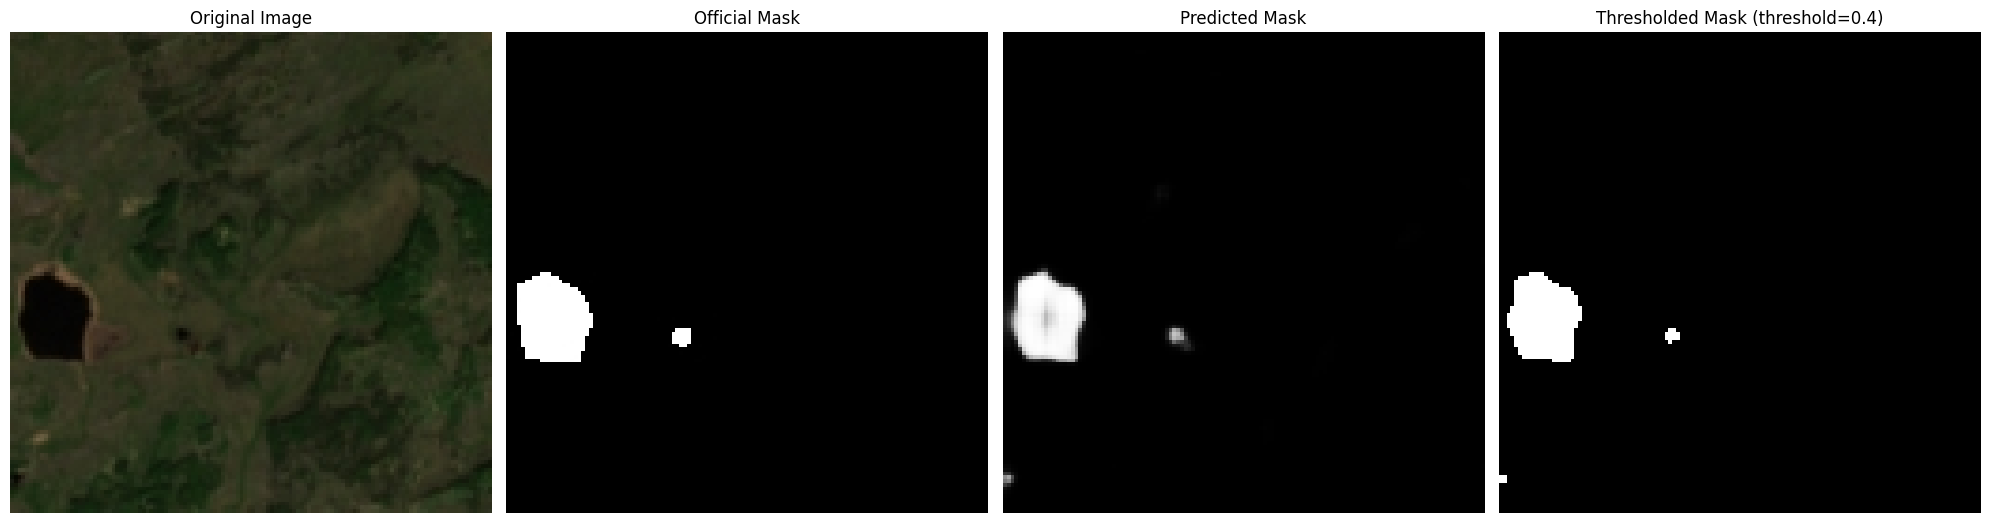

1015_10240_1408.jpg


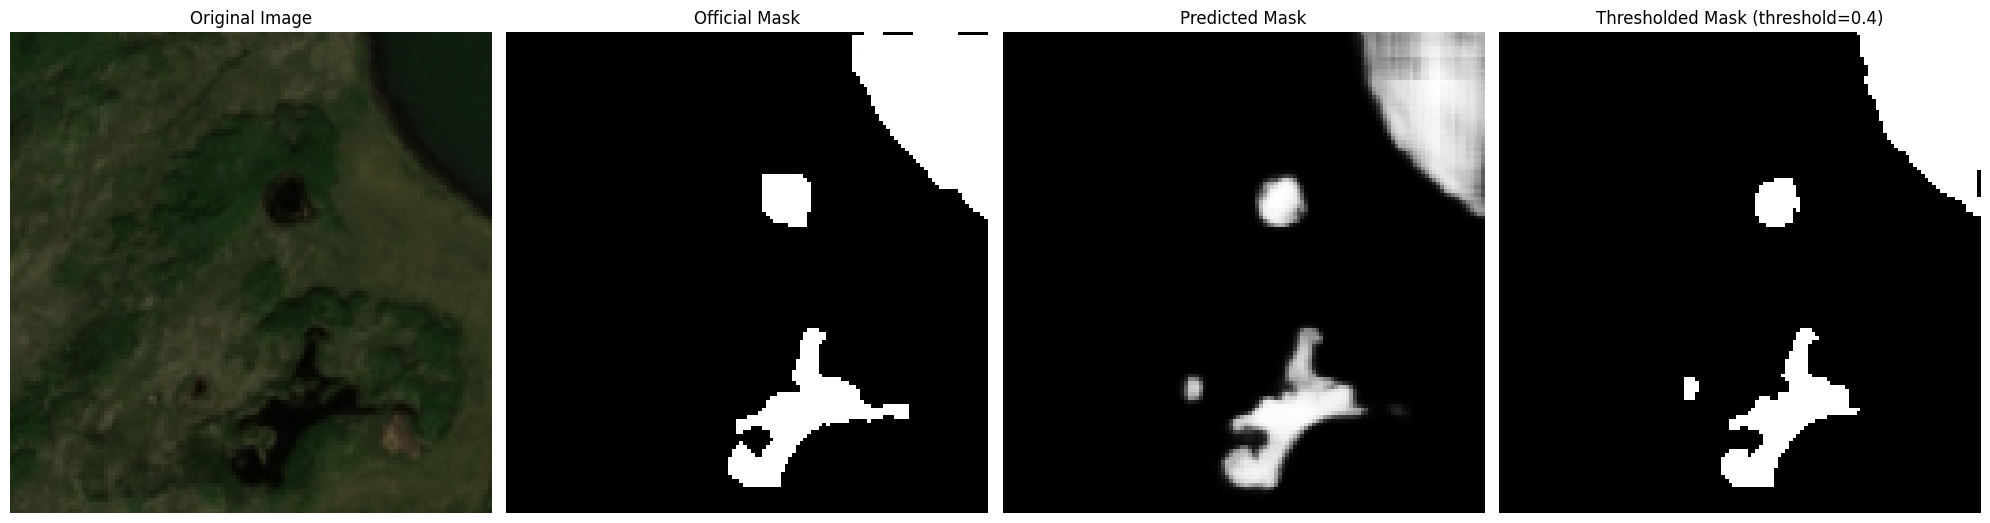

1026_768_1536.jpg


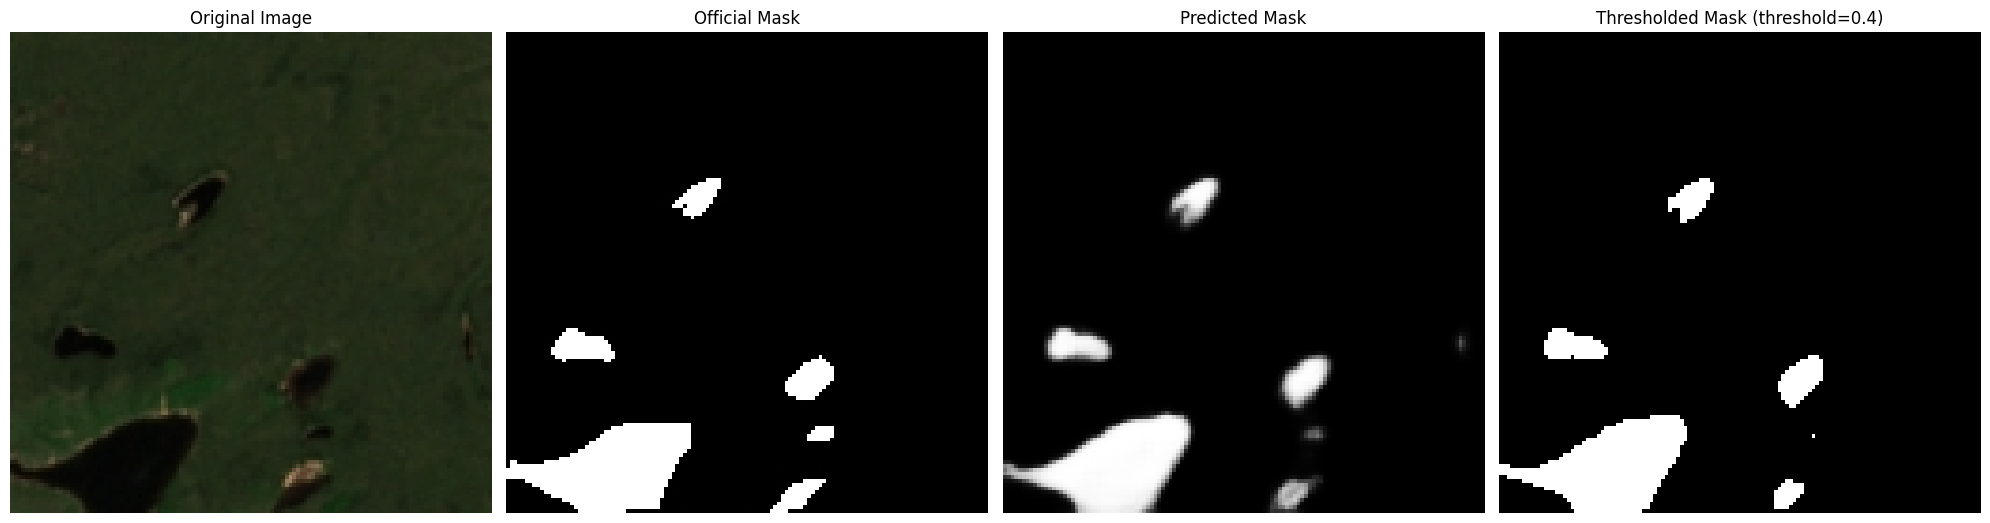

1030_1280_1536.jpg


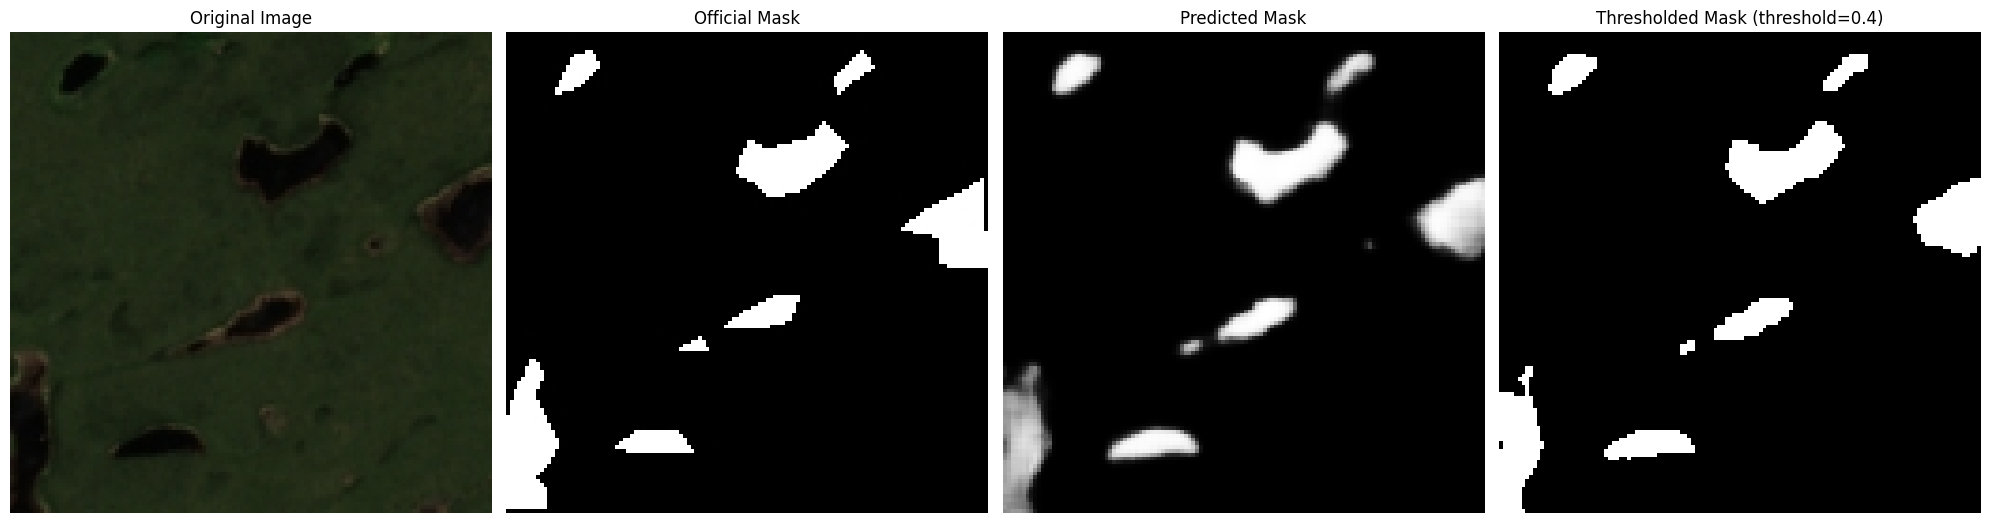

1033_1664_1536.jpg


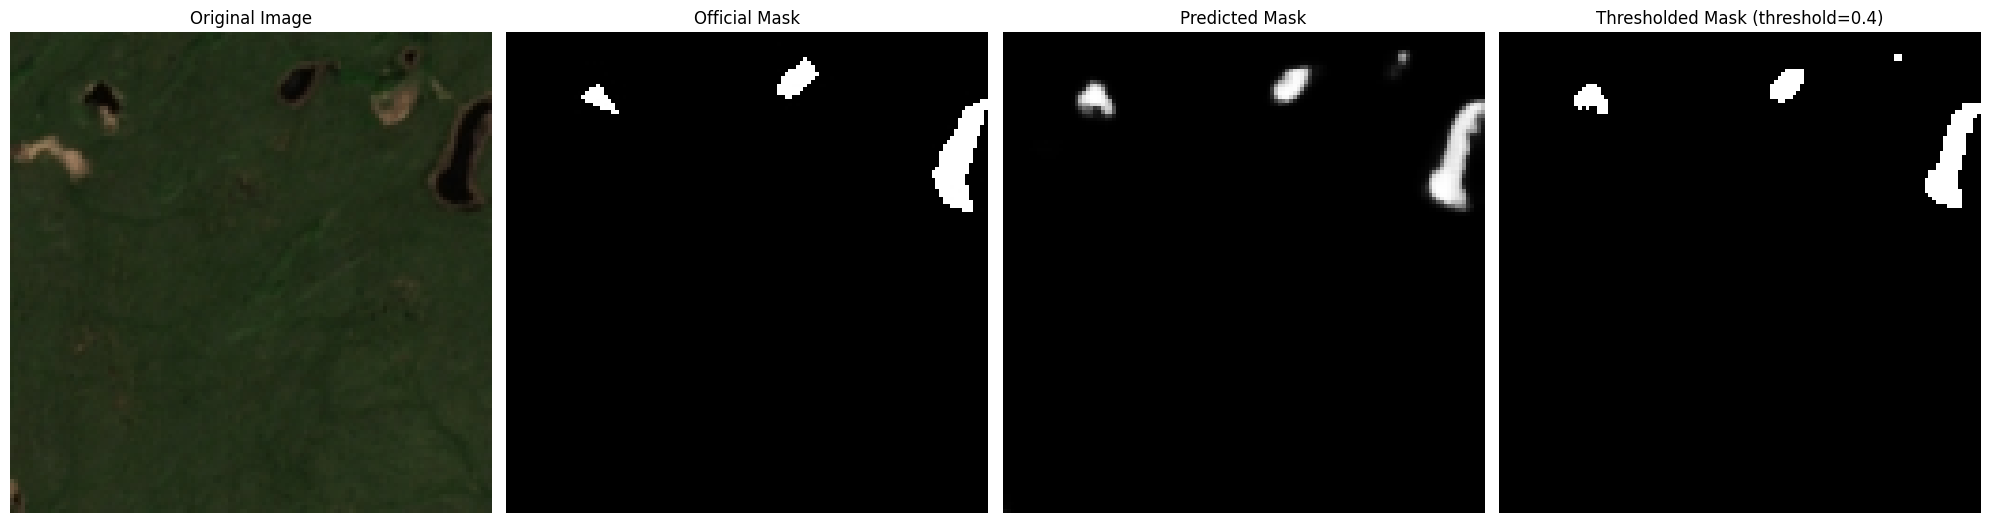

1036_2048_1536.jpg


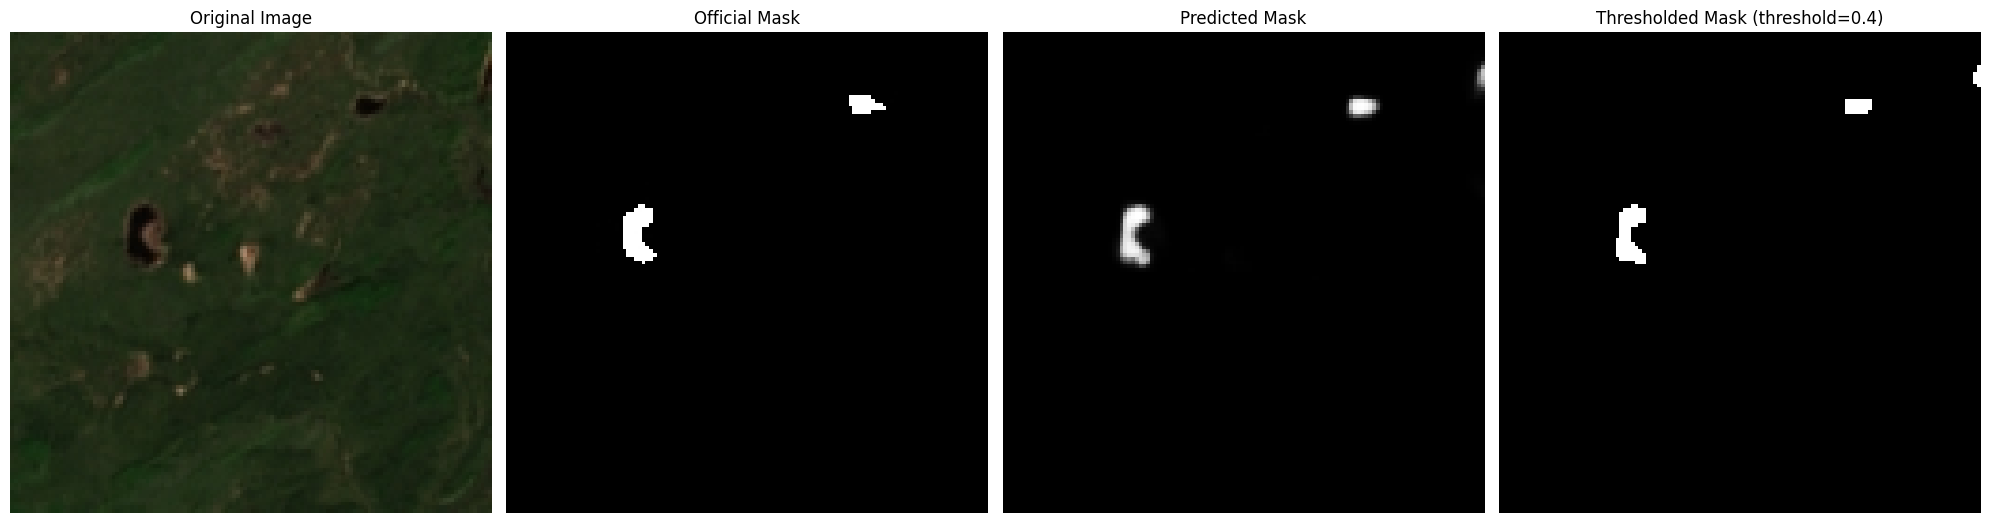

1043_2944_1536.jpg


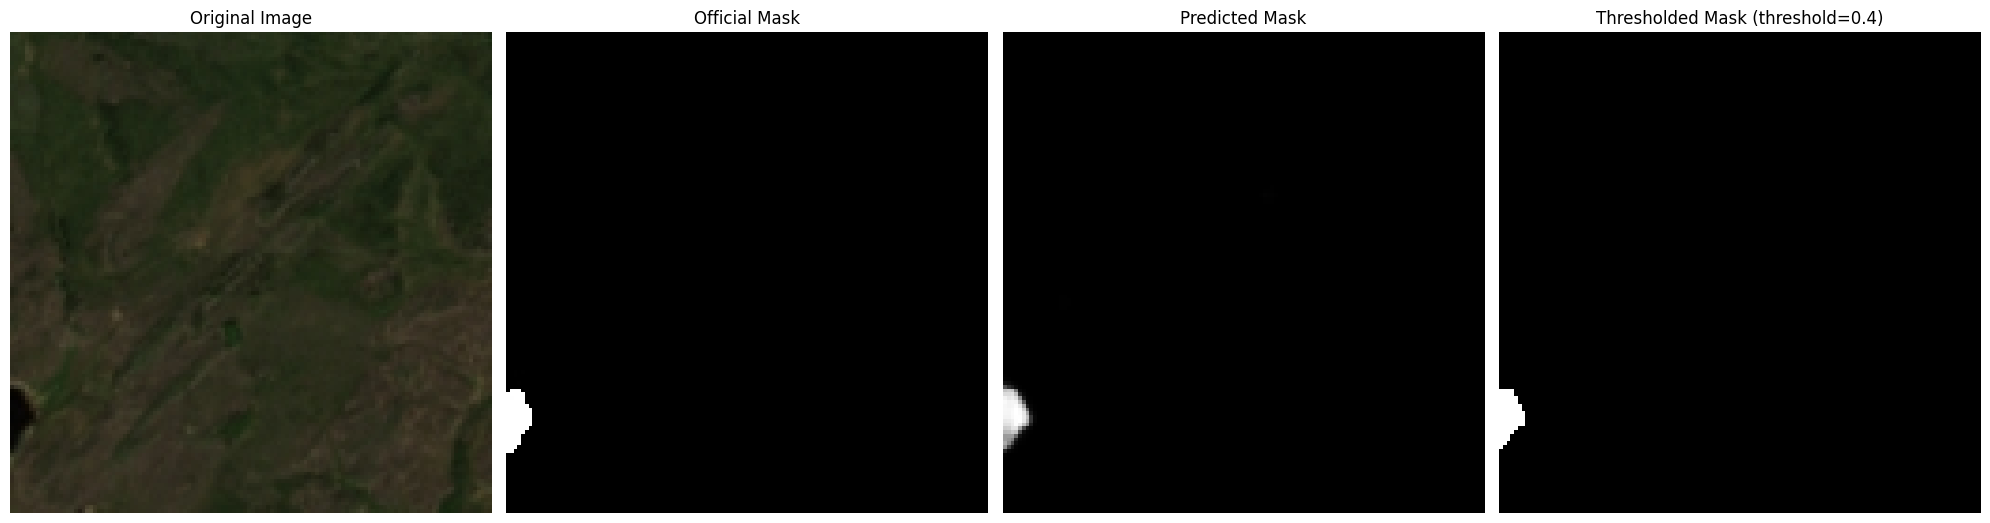

1048_3584_1536.jpg


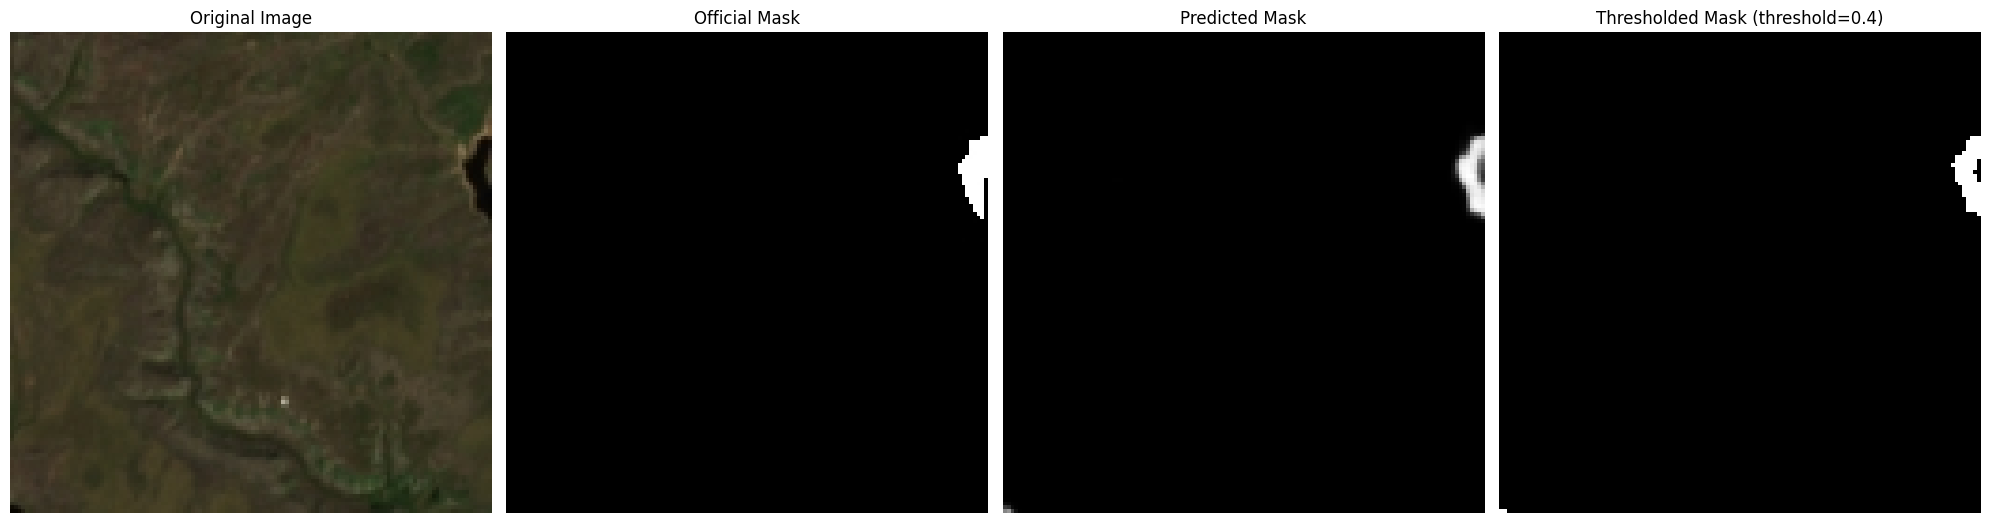

106_2688_128.jpg


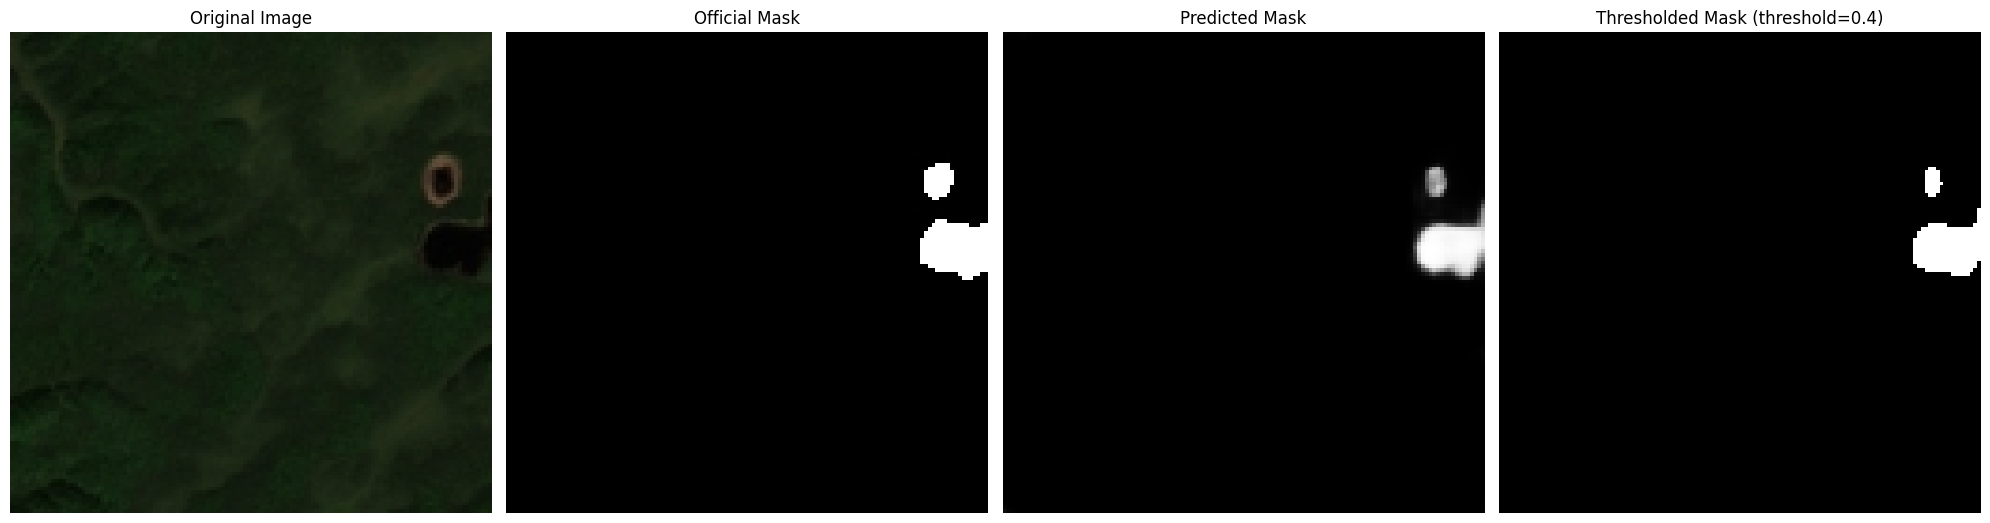

1073_6784_1536.jpg


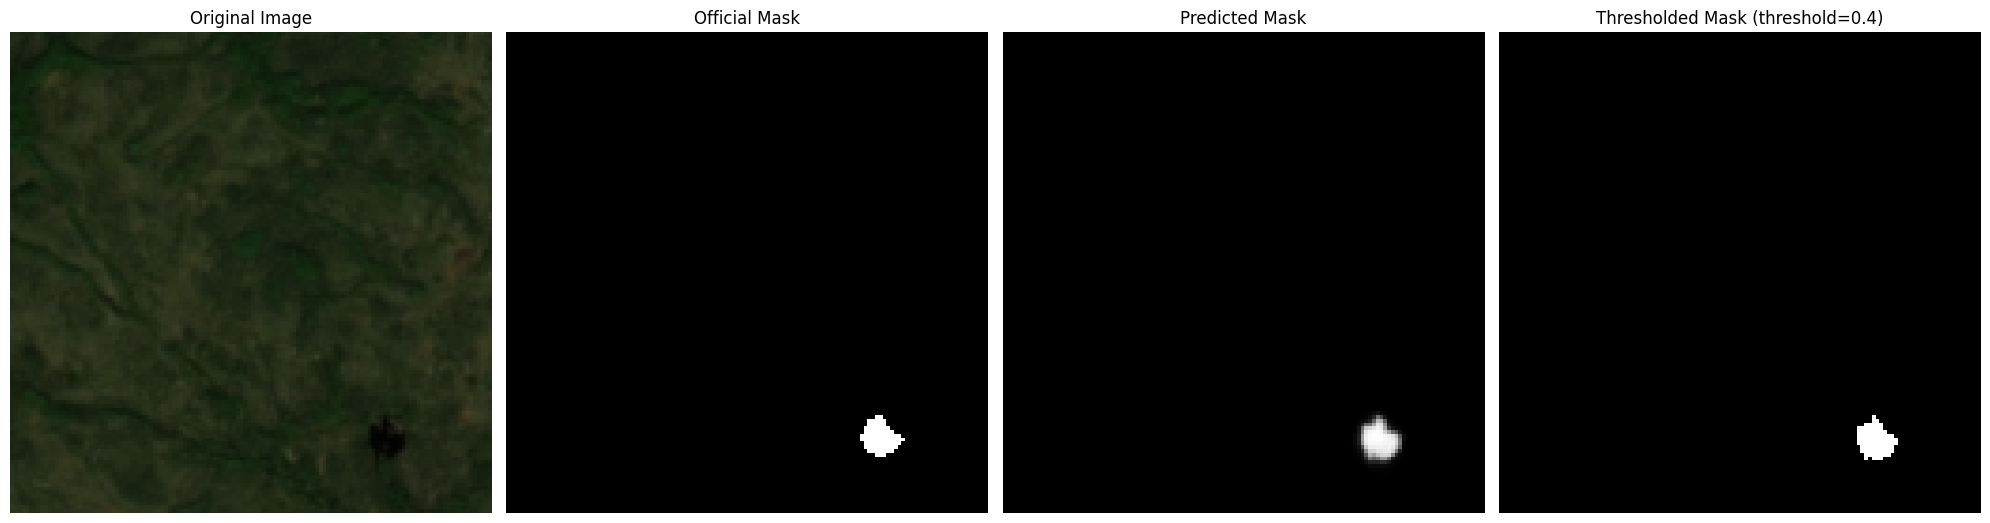

107_2816_128.jpg


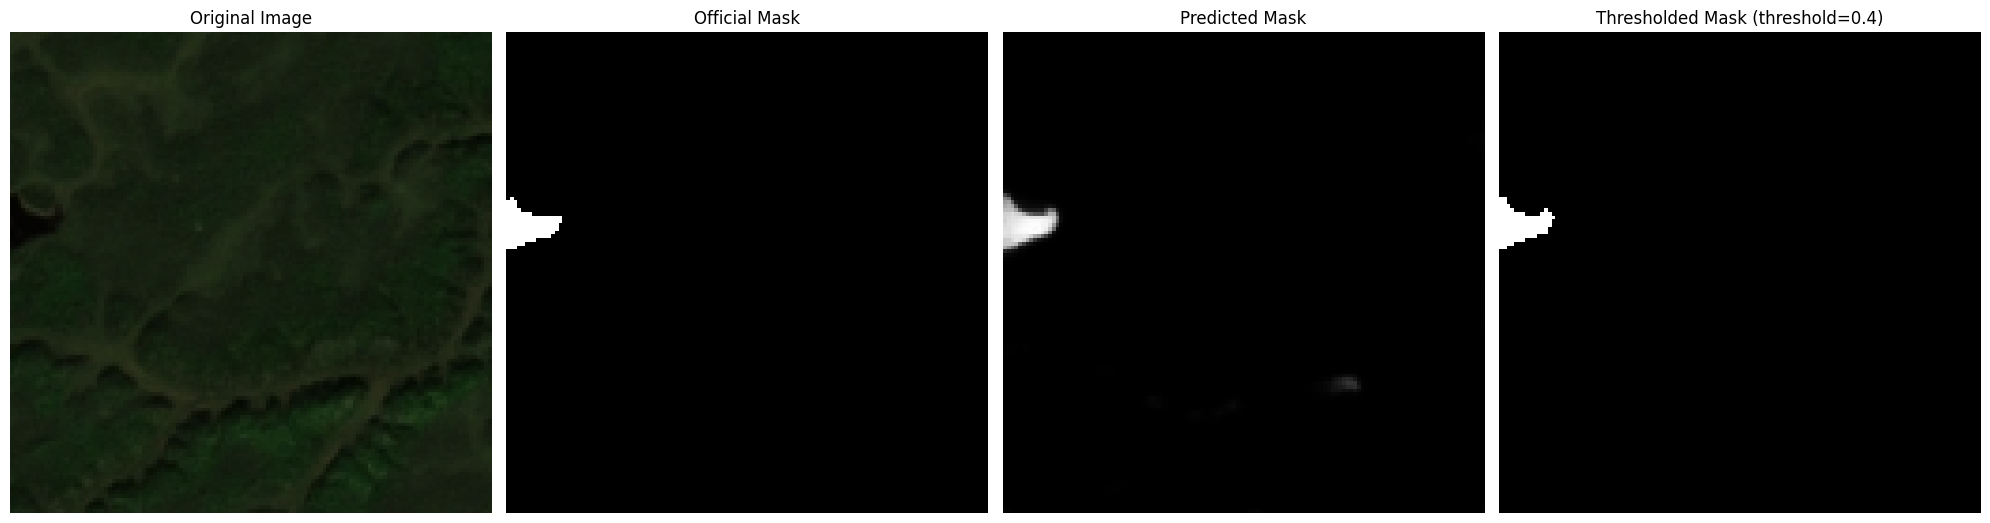

1133_3584_1664.jpg


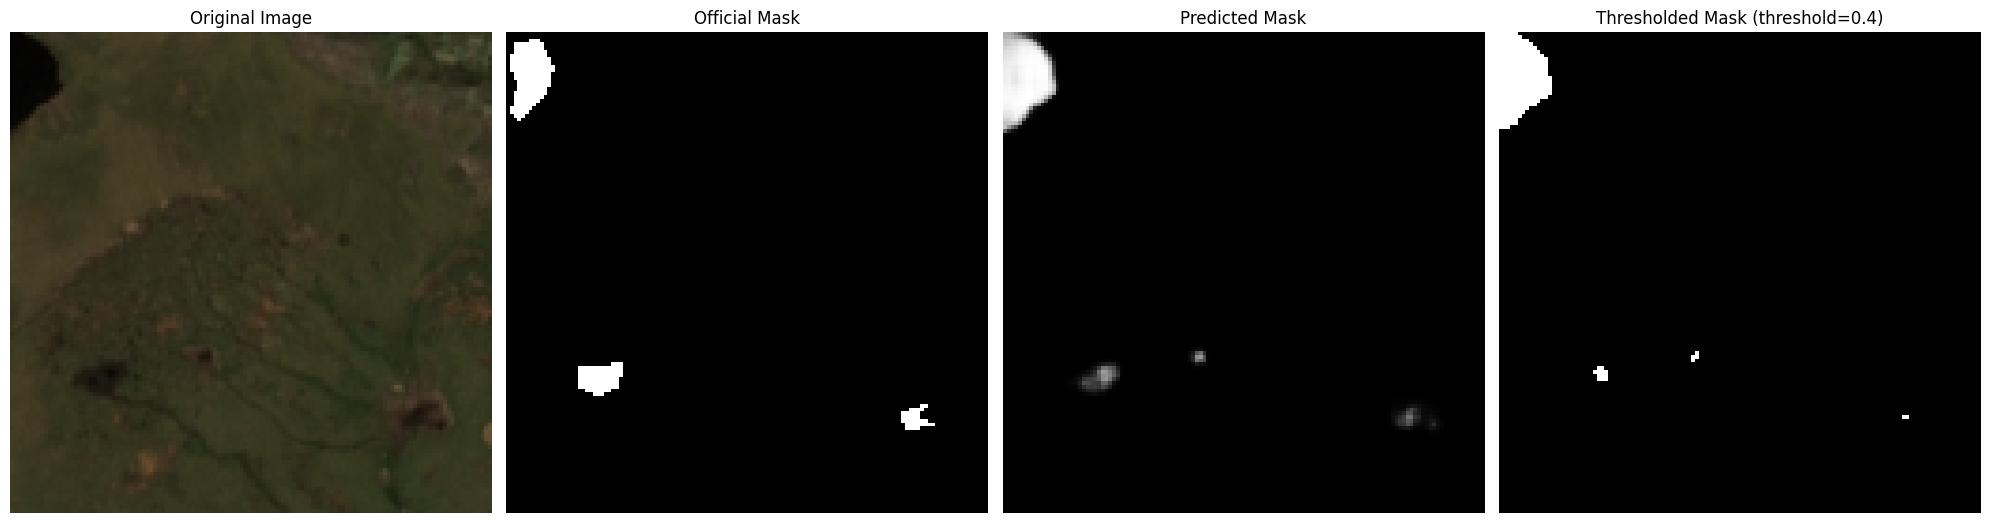

1157_6656_1664.jpg


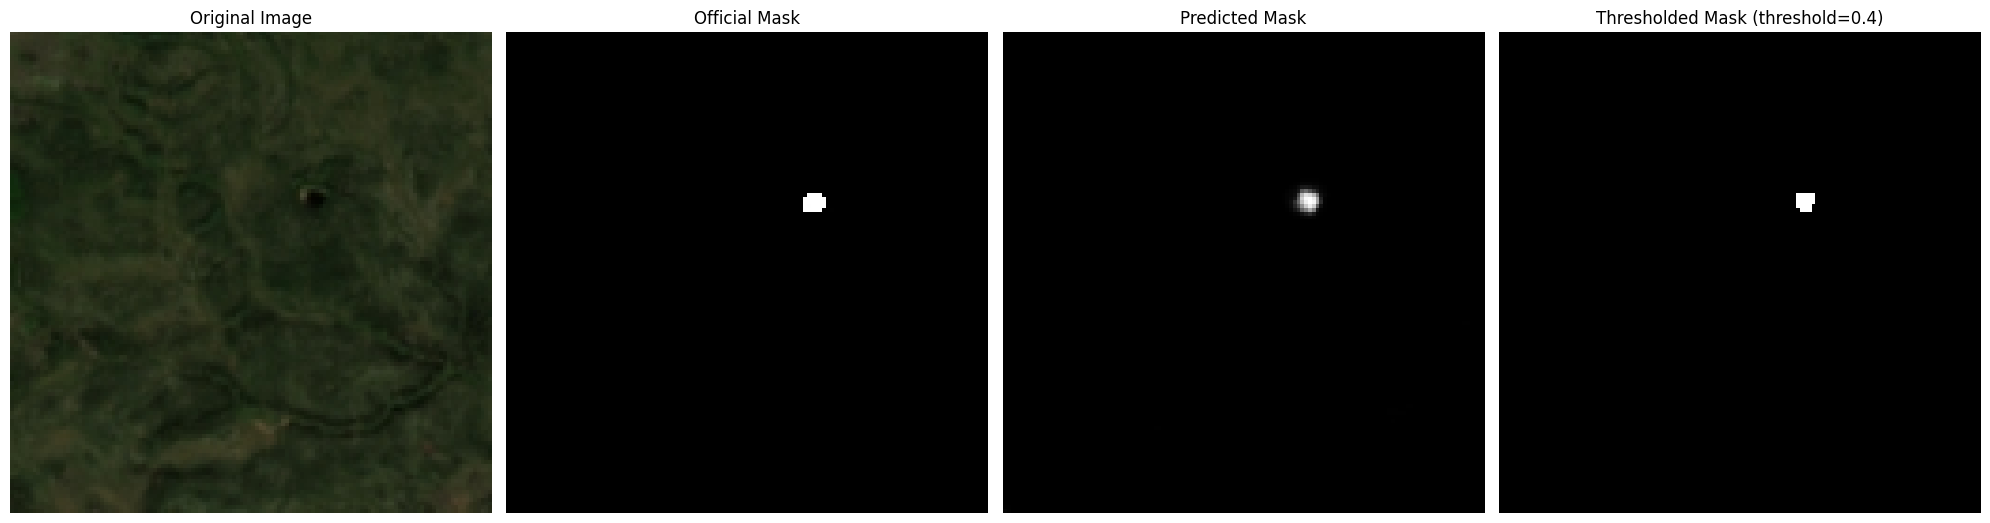

1196_768_1792.jpg


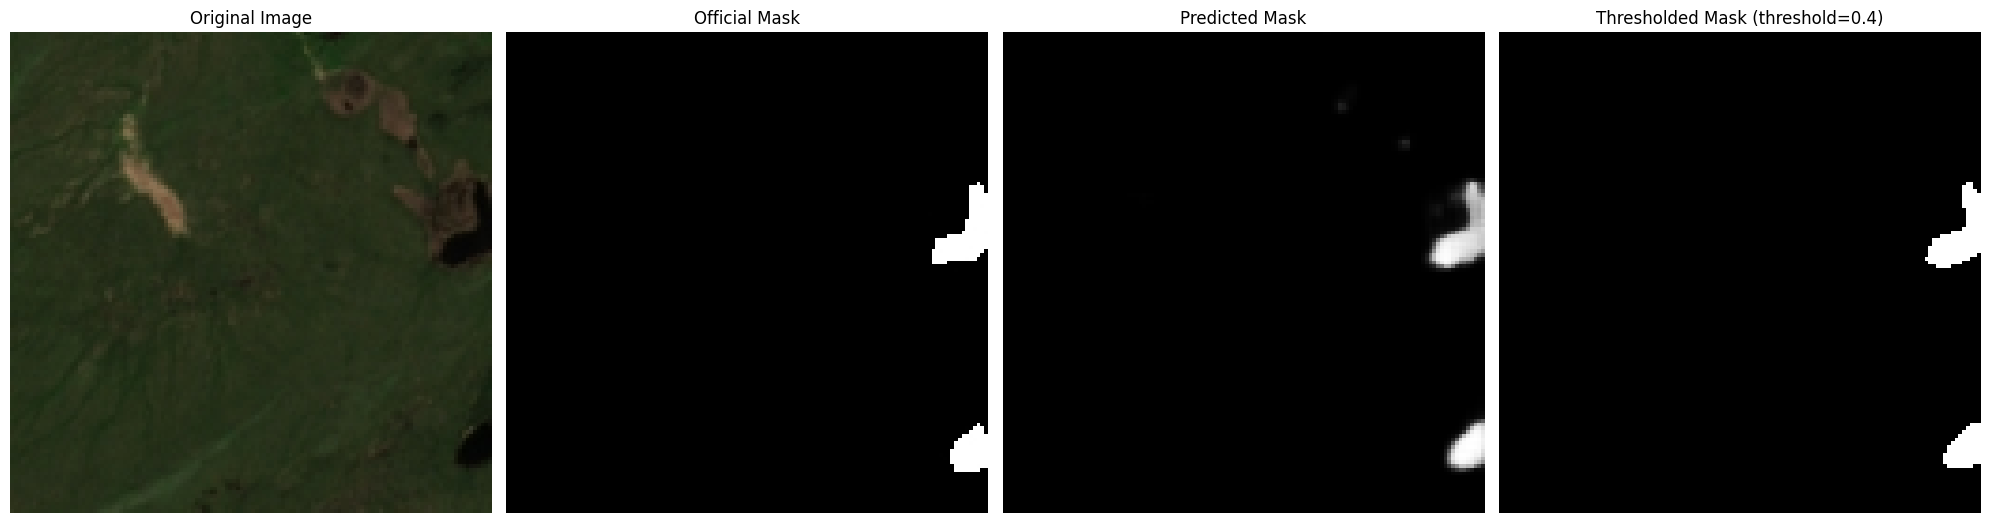

1239_6272_1792.jpg


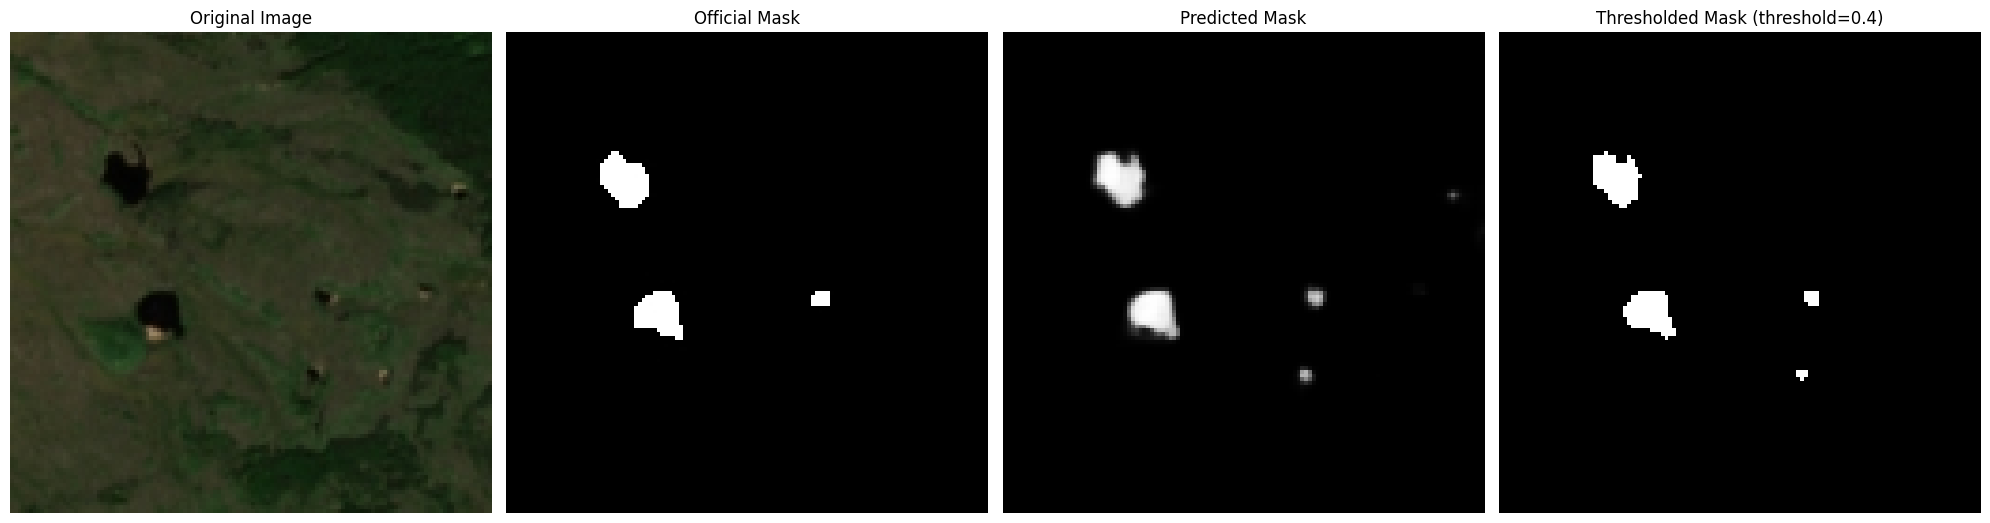

1240_6400_1792.jpg


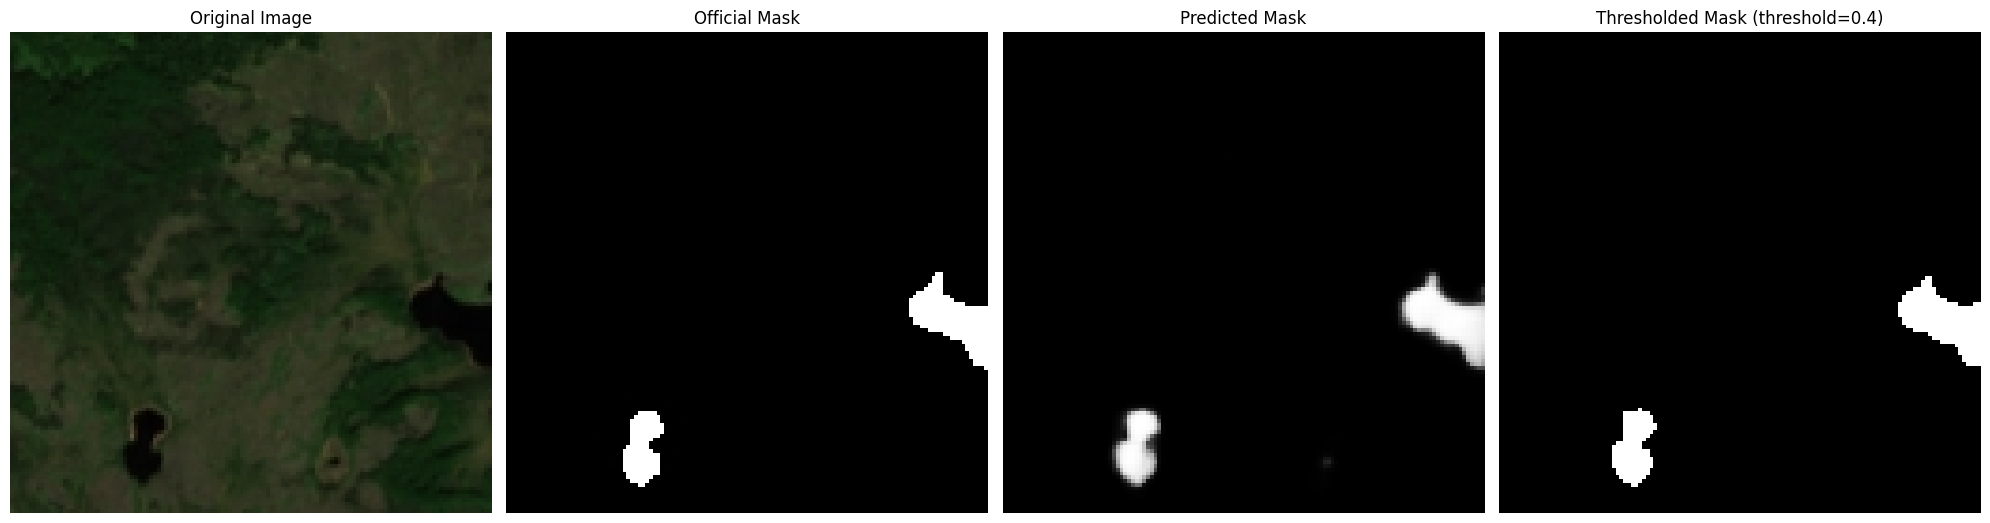

1252_7936_1792.jpg


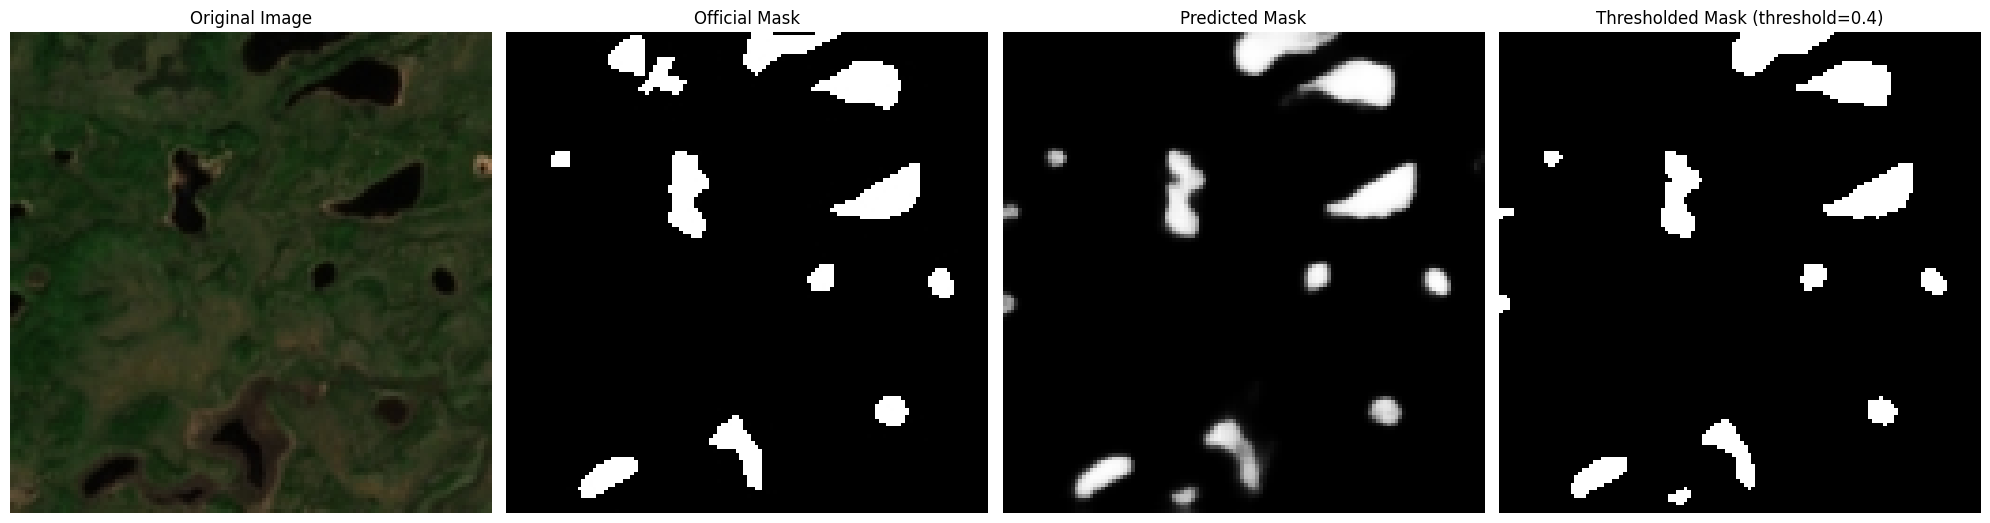

432_896_640.jpg


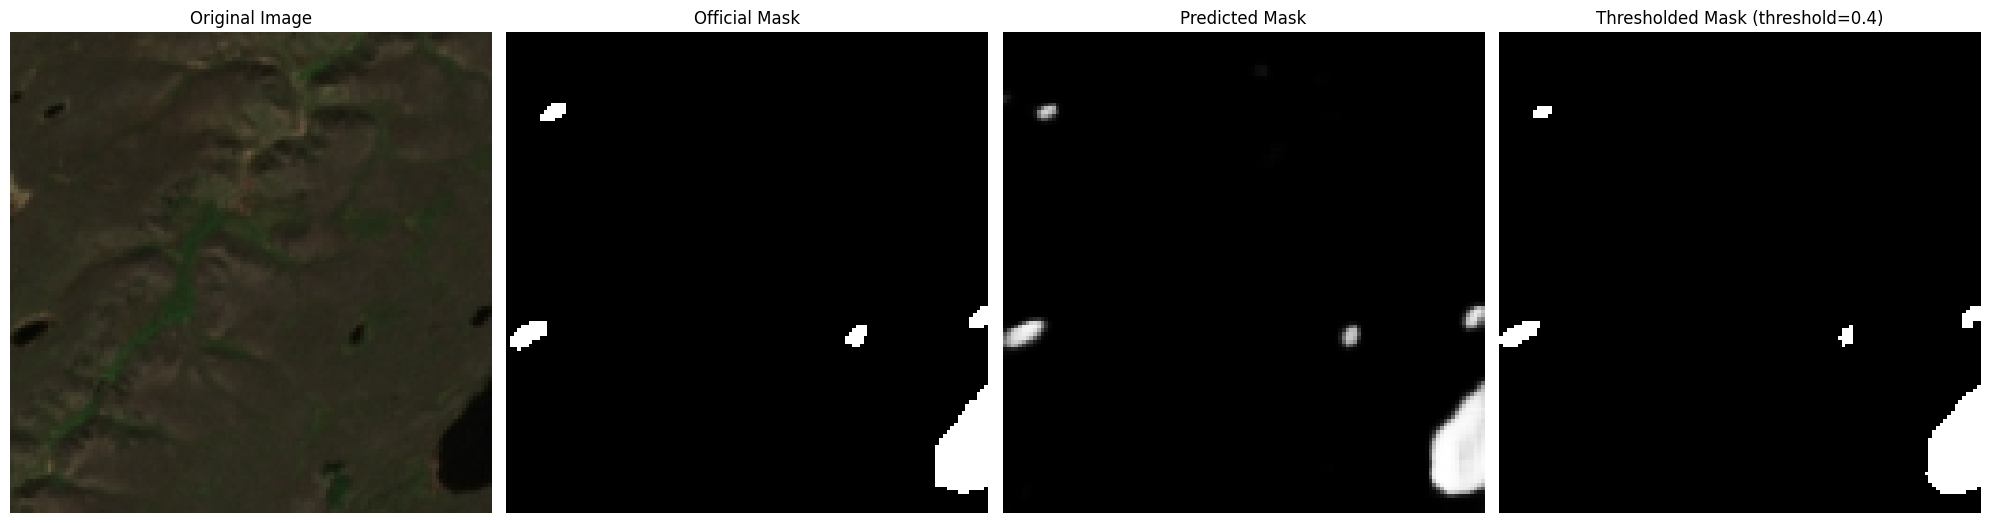

436_1408_640.jpg


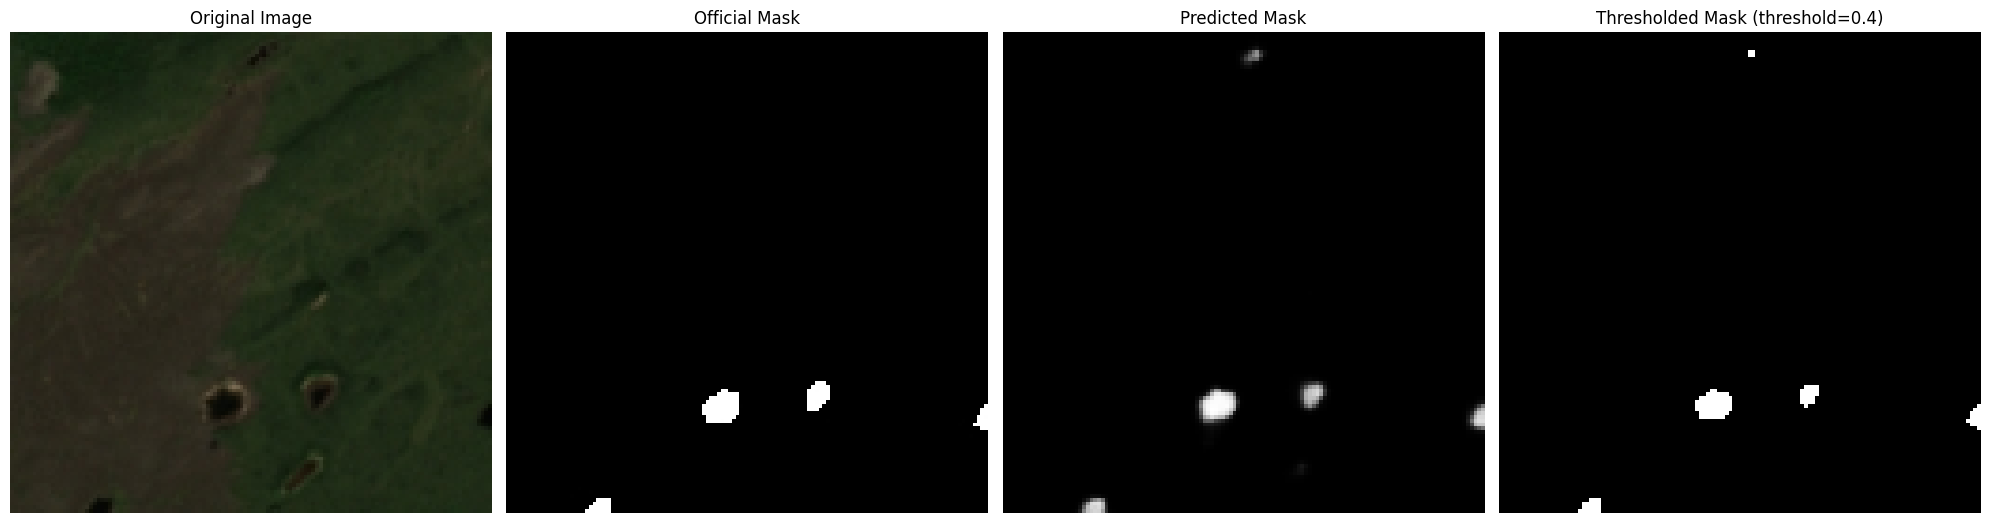

445_2560_640.jpg


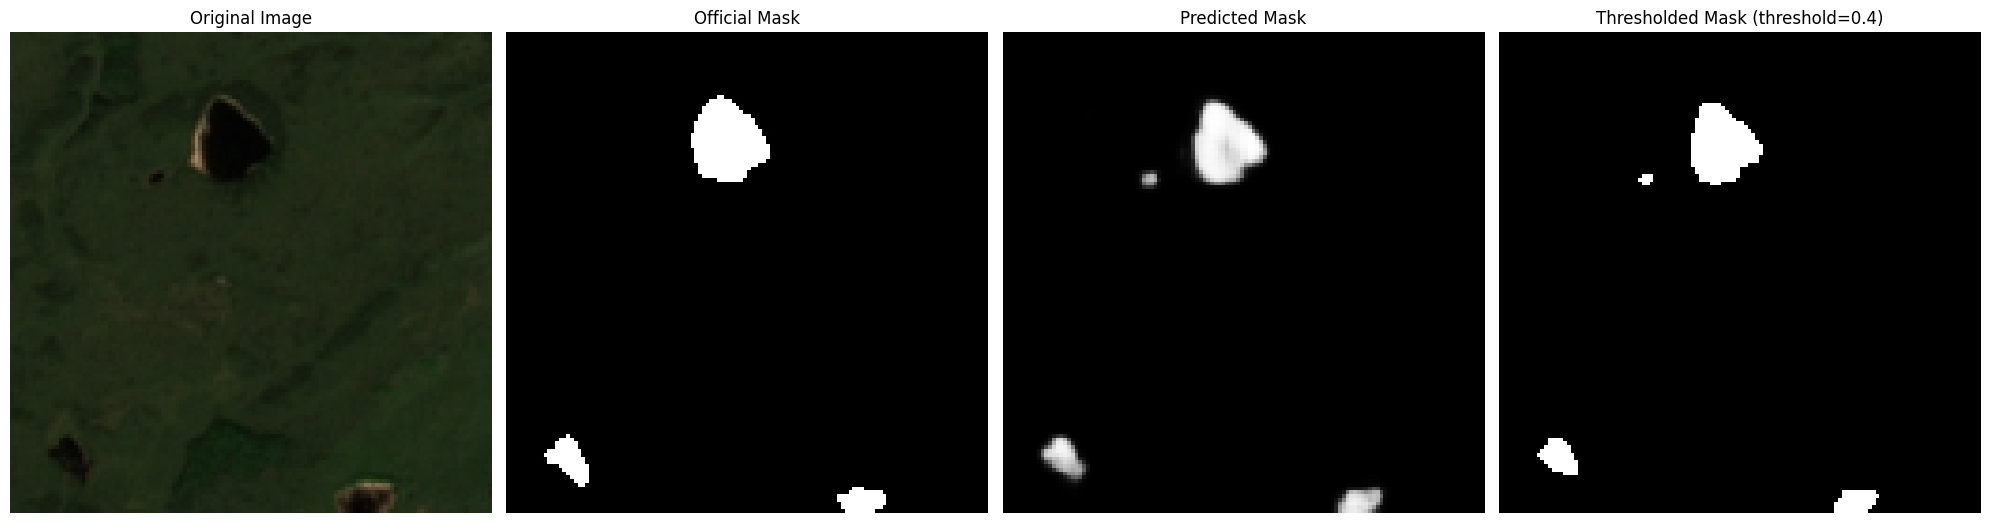

450_3200_640.jpg


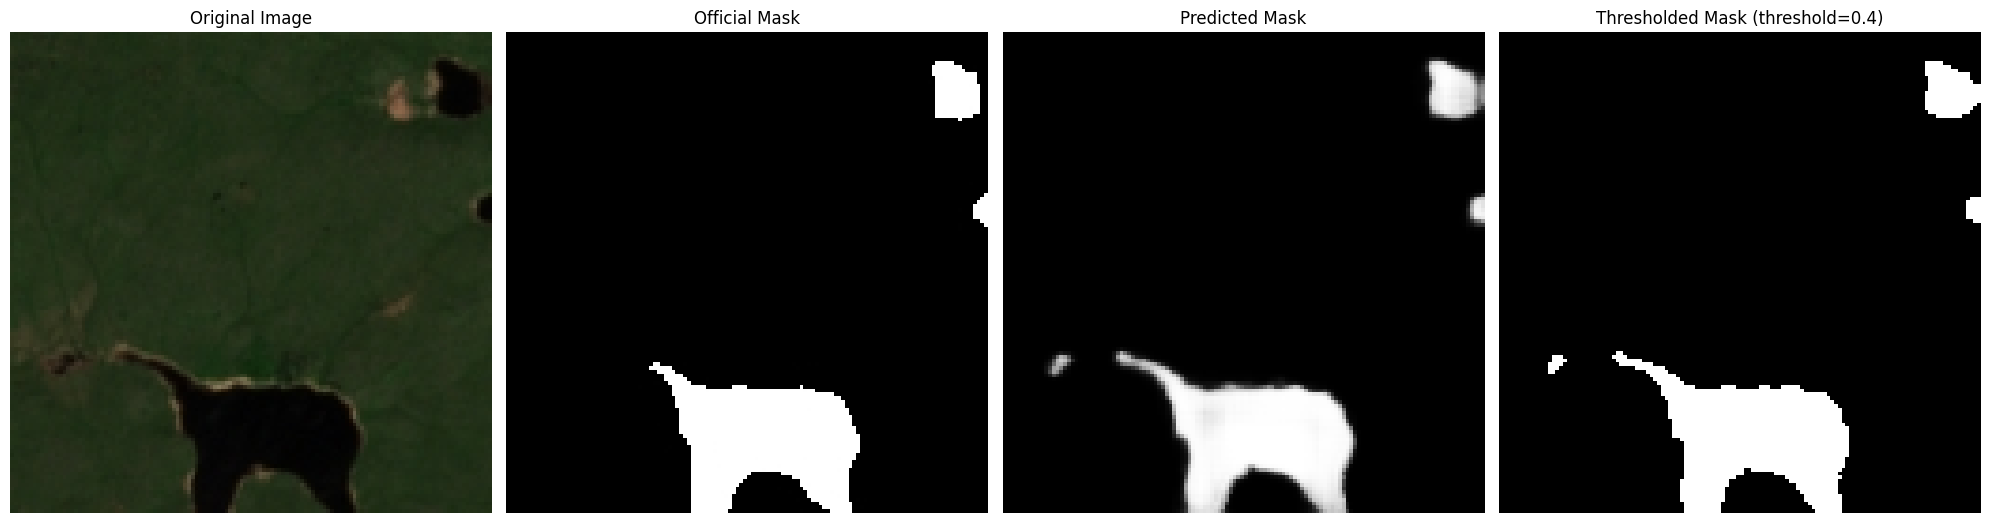

452_3456_640.jpg


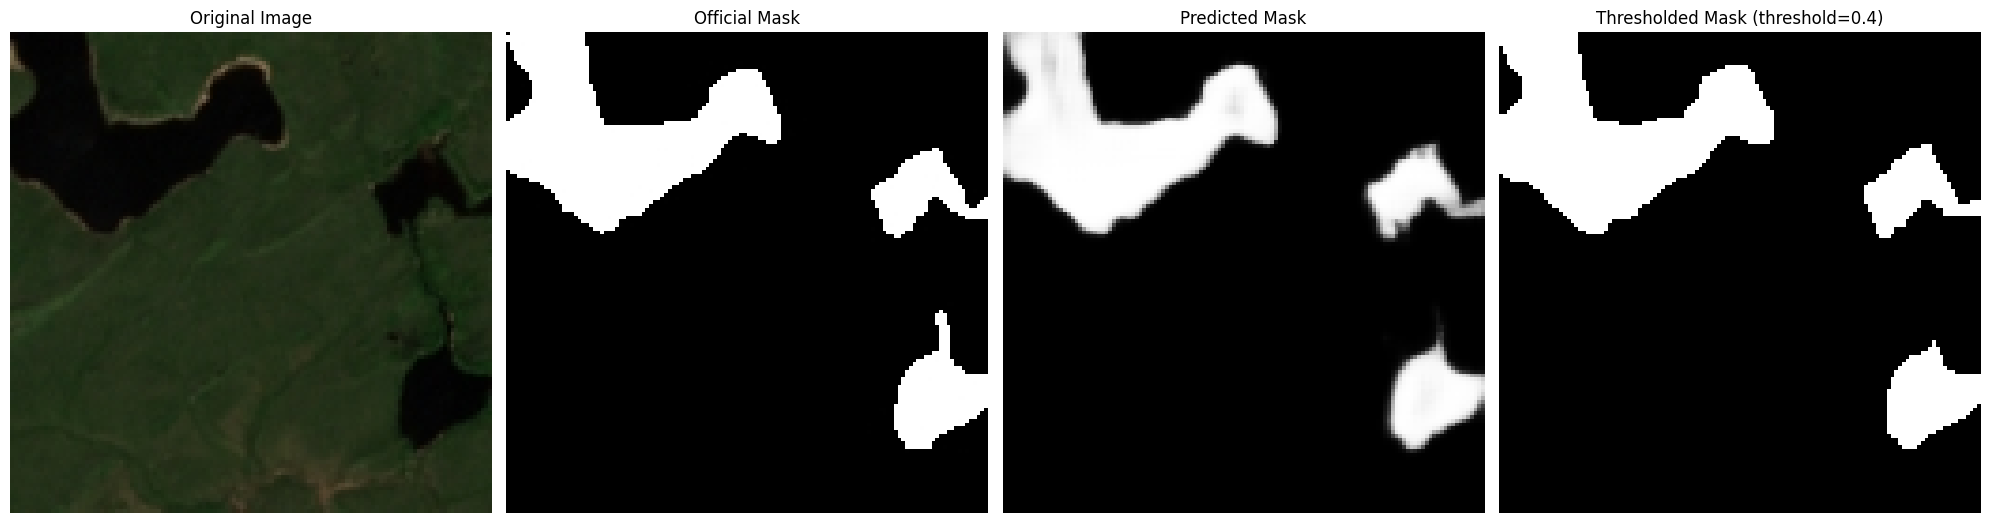

457_4096_640.jpg


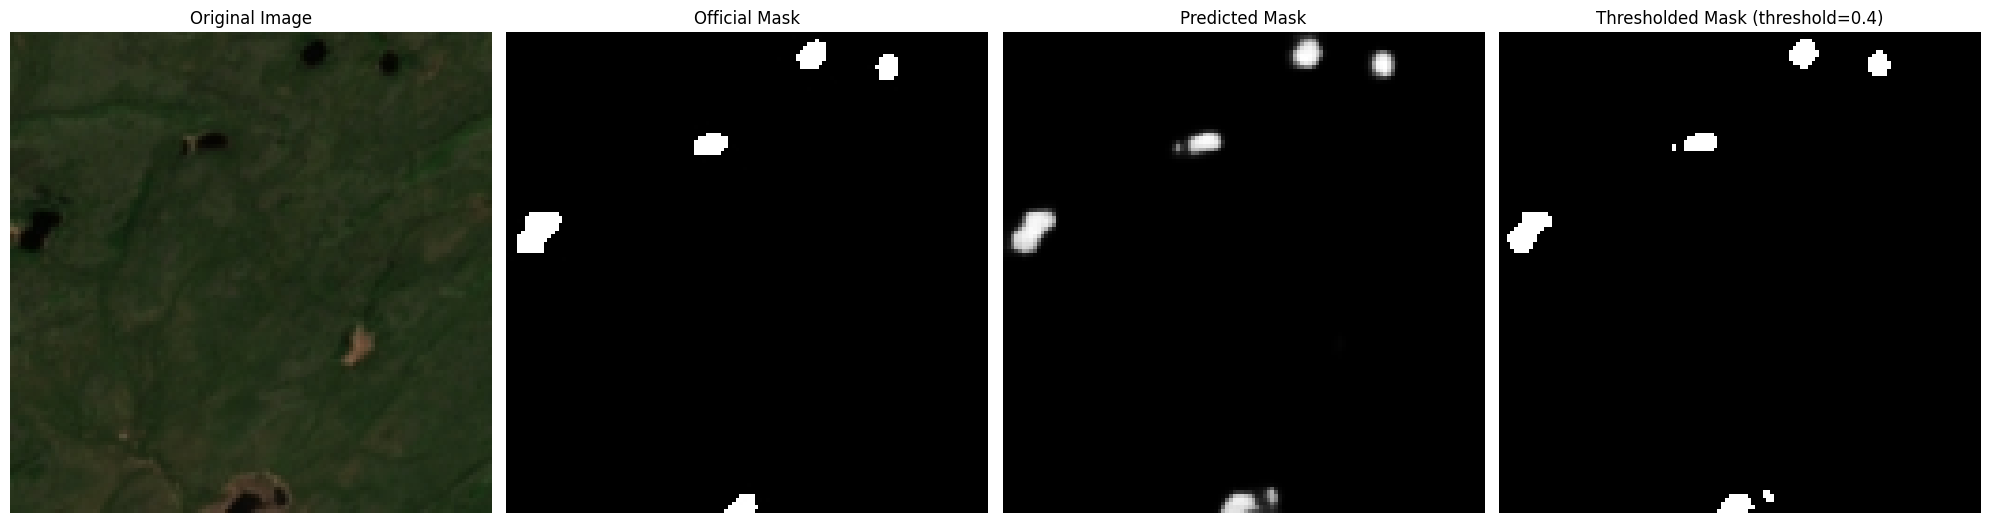

460_4480_640.jpg


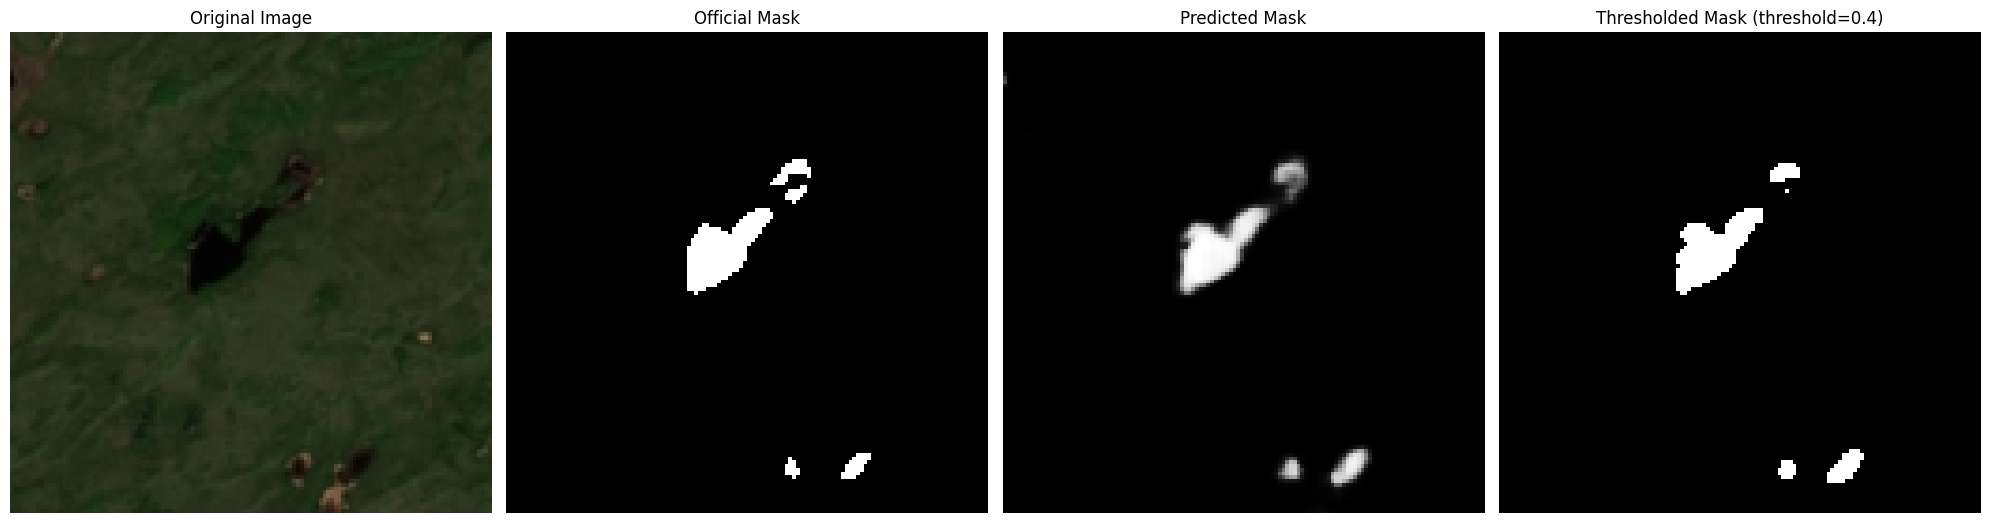

4_512_0.jpg


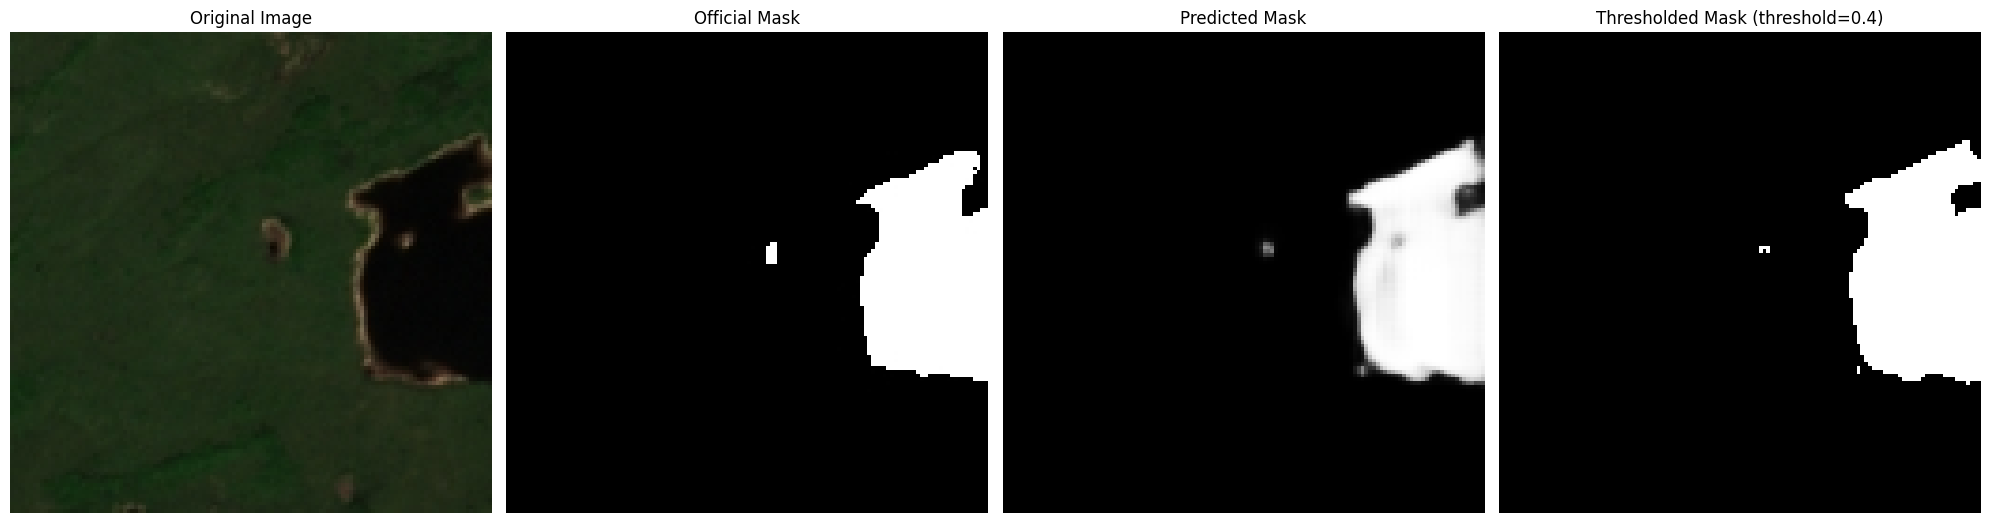

500_9600_640.jpg


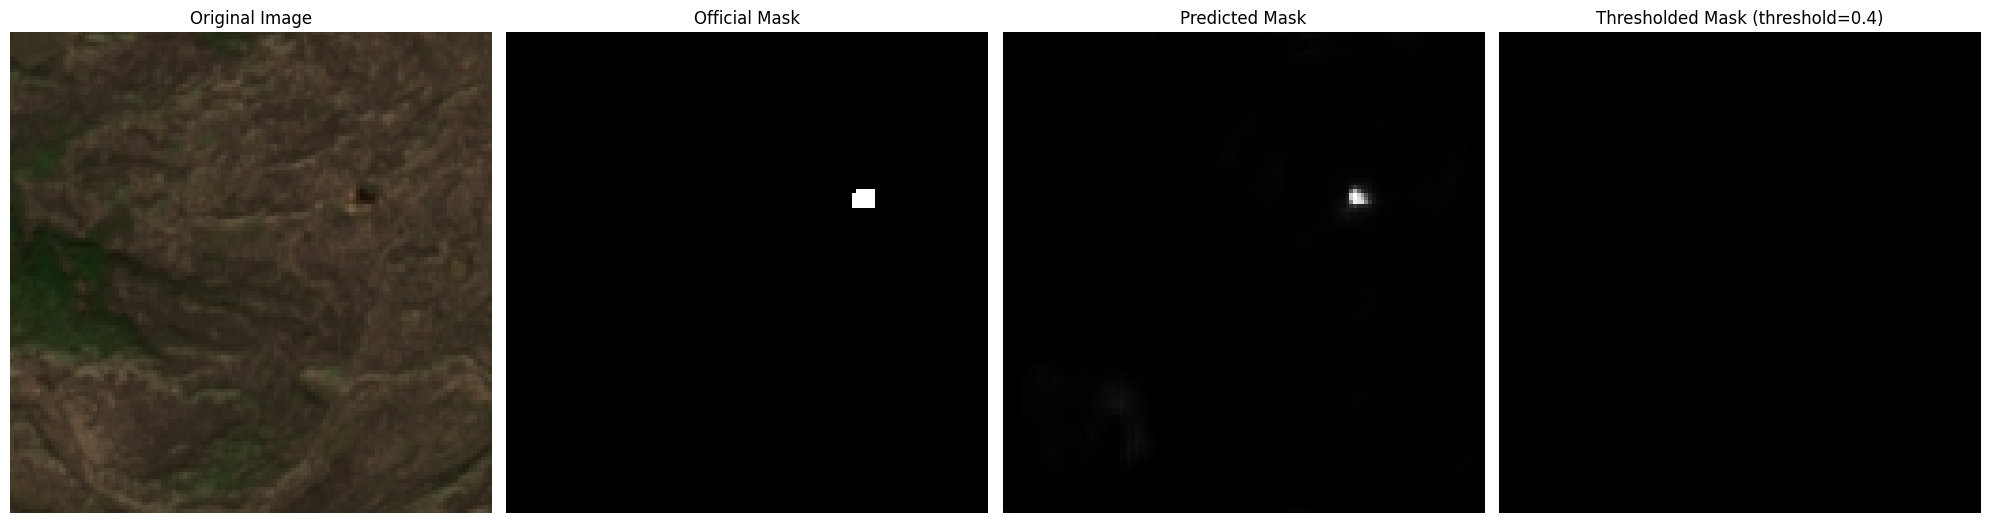

515_640_768.jpg


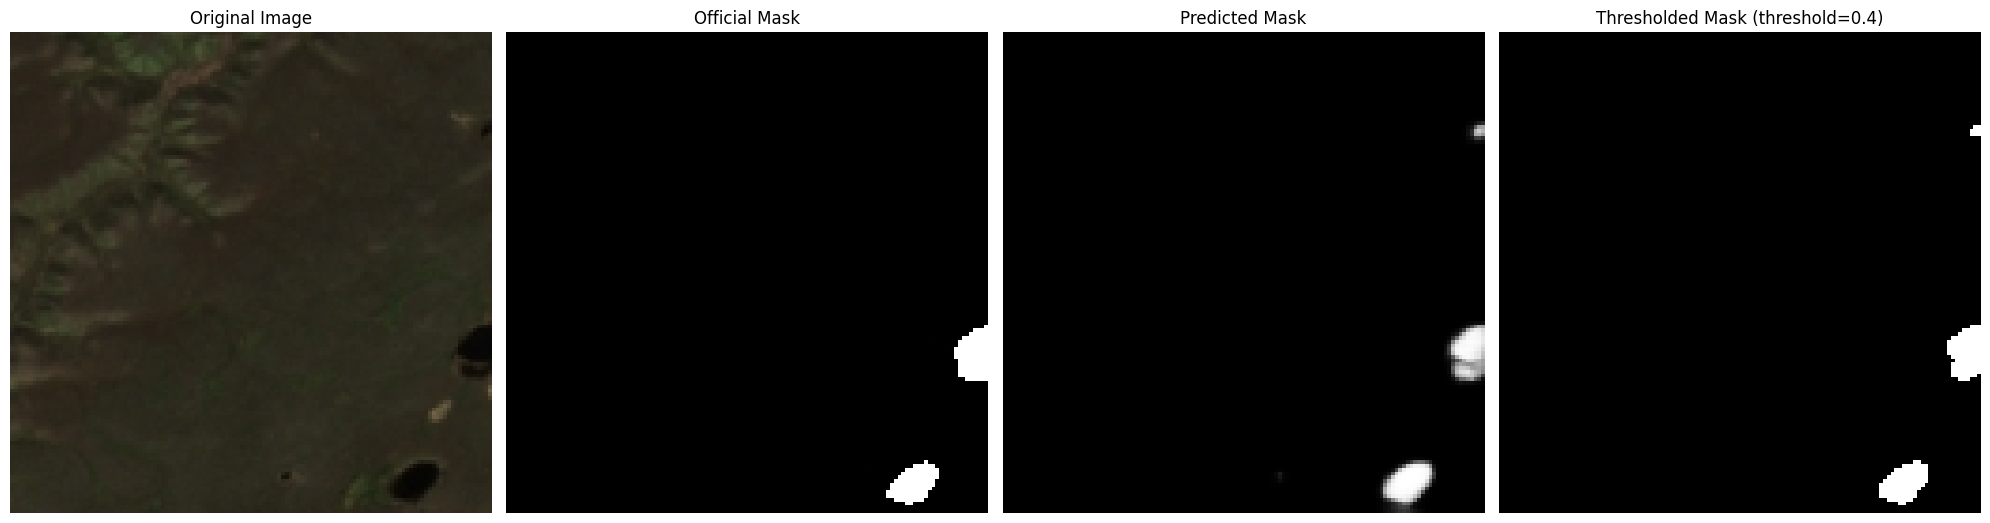

530_2560_768.jpg


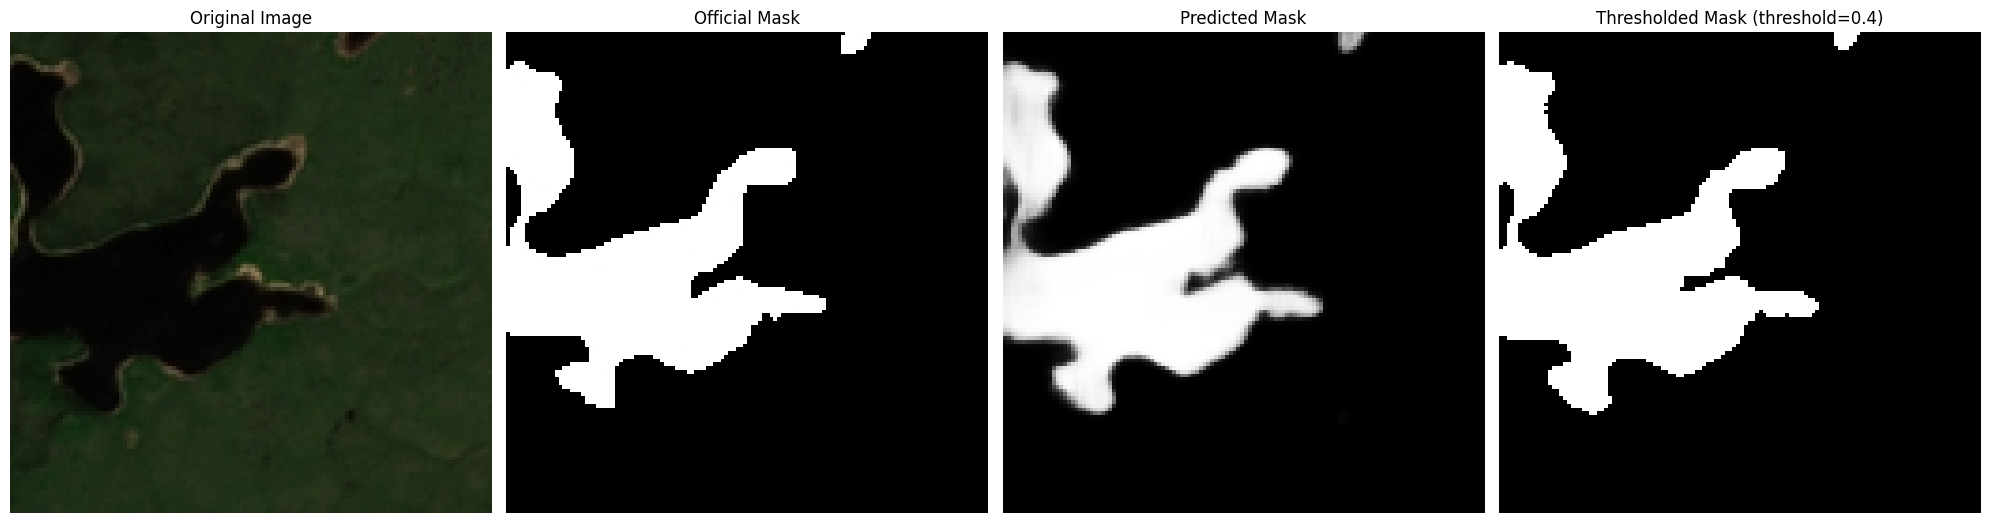

535_3200_768.jpg


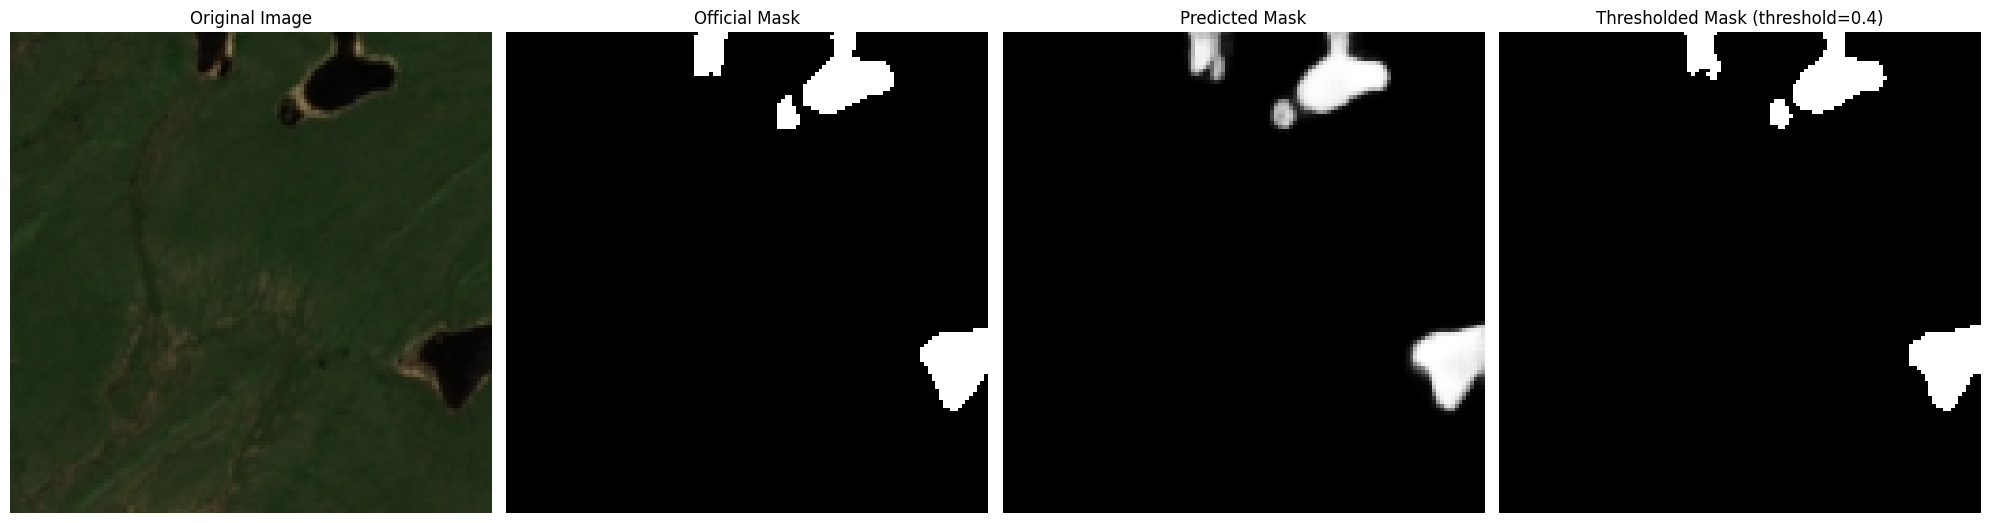

536_3328_768.jpg


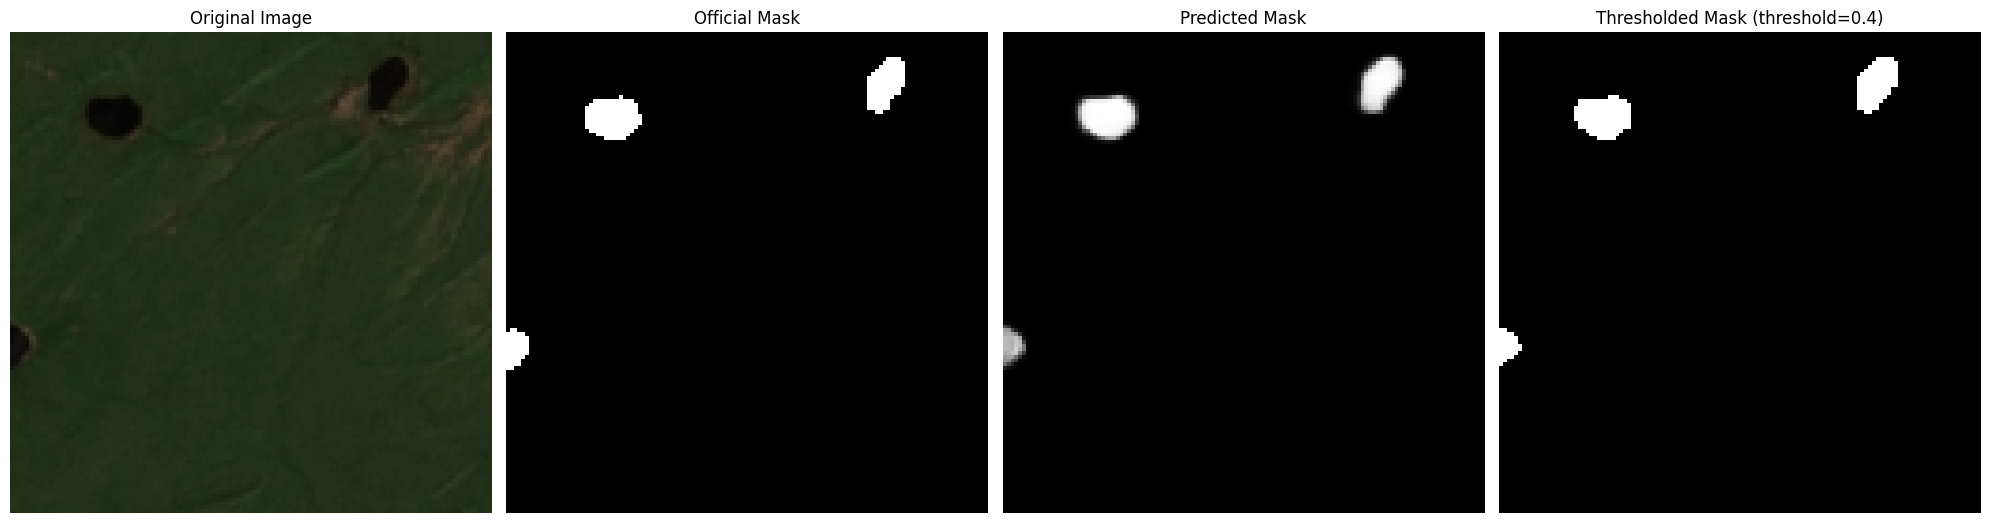

539_3712_768.jpg


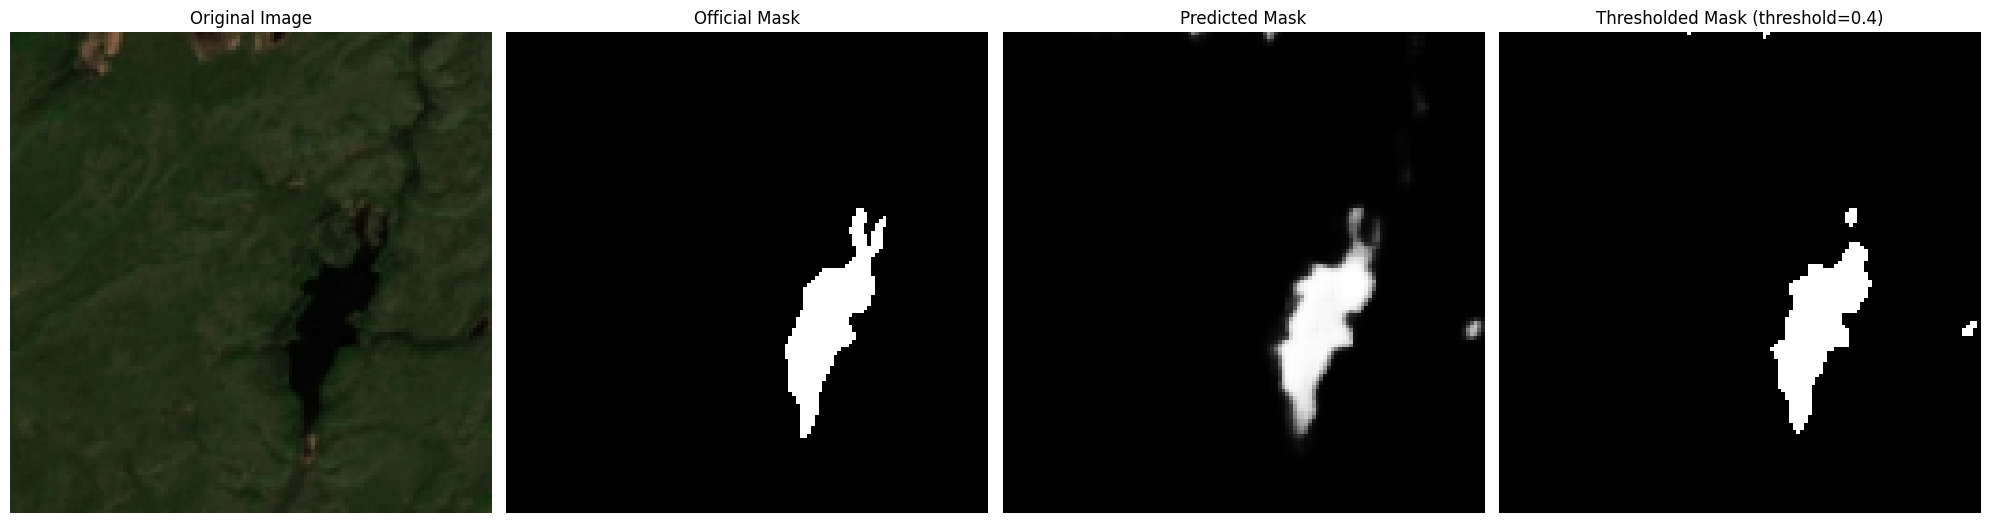

562_6656_768.jpg


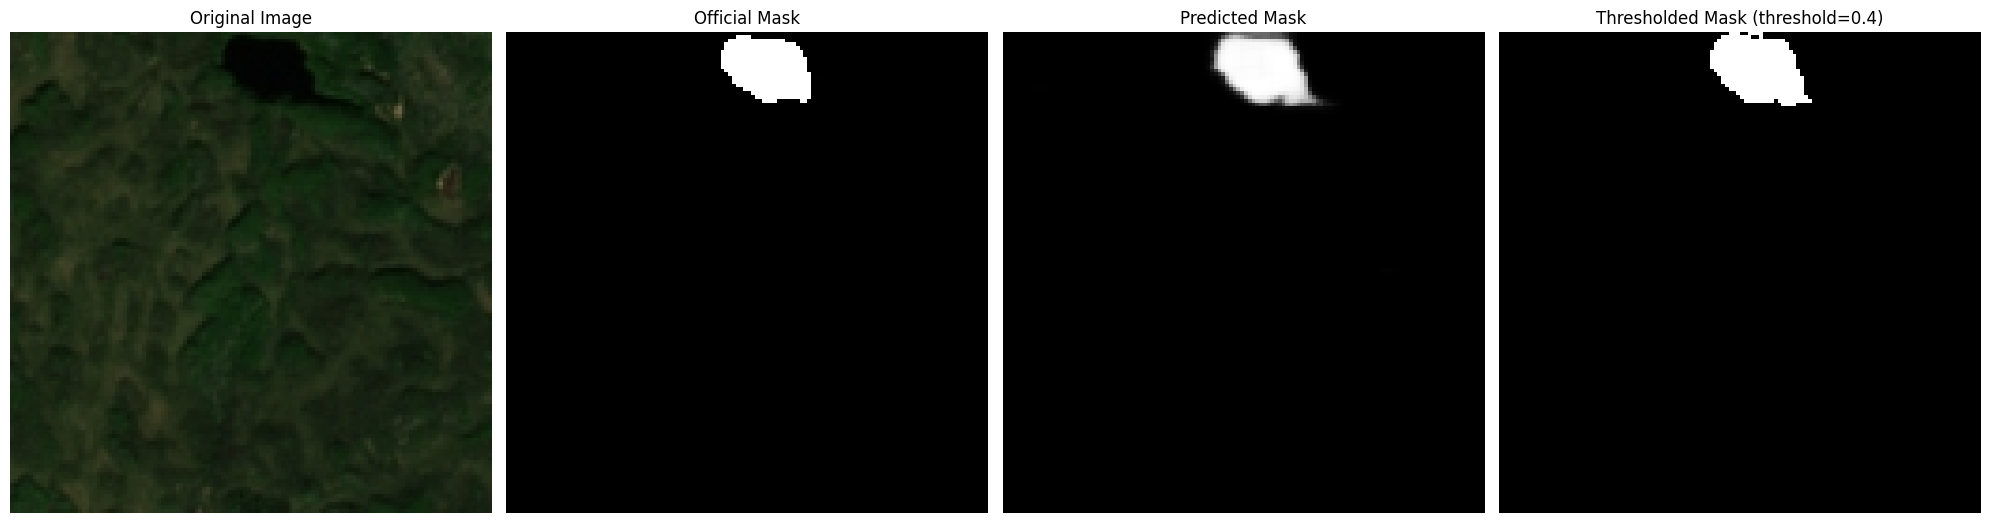

598_384_896.jpg


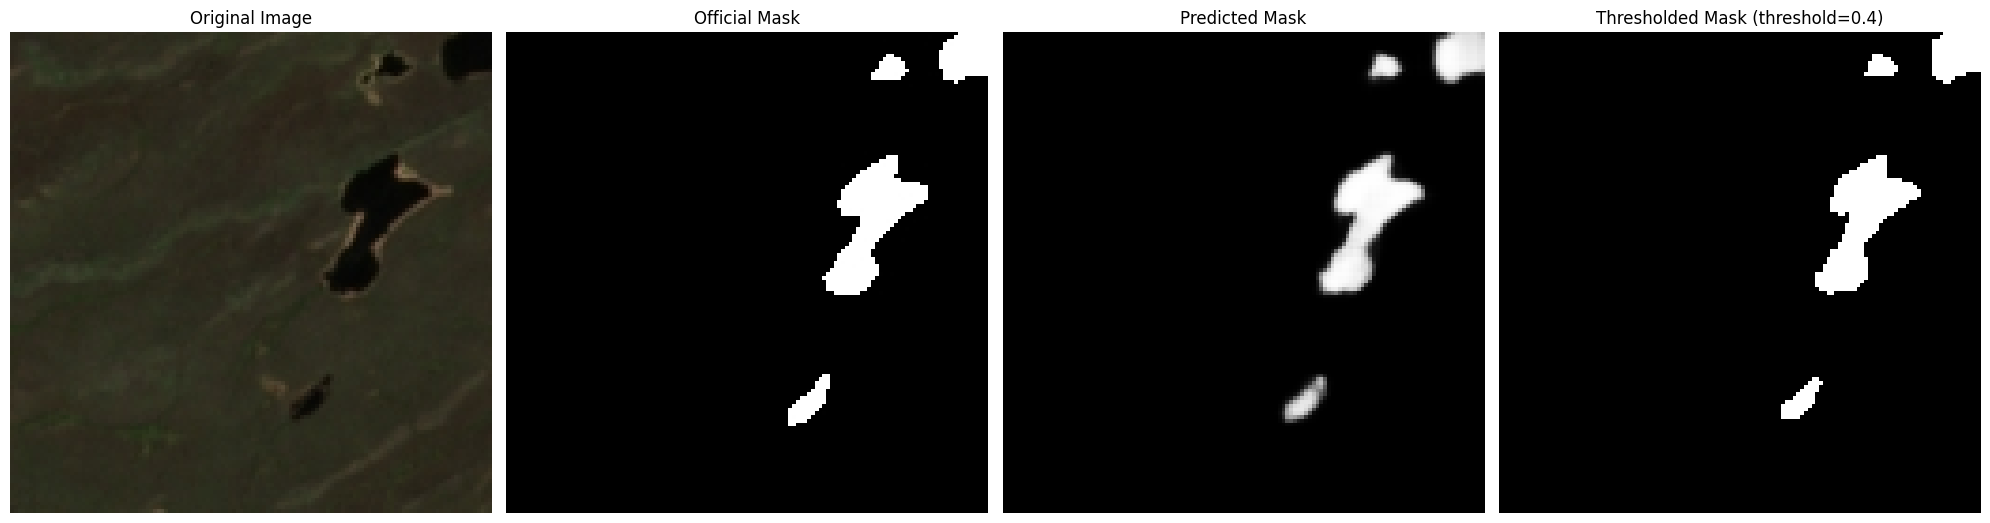

607_1536_896.jpg


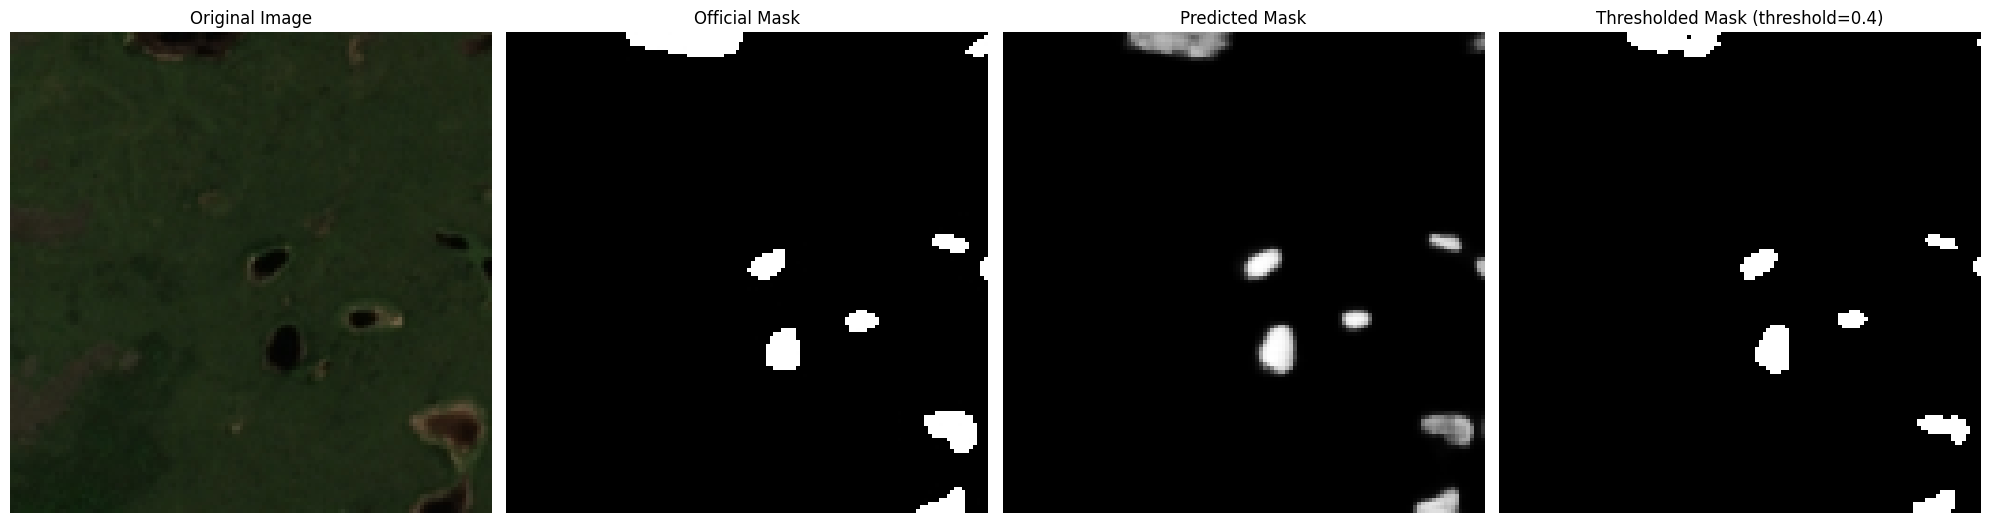

610_1920_896.jpg


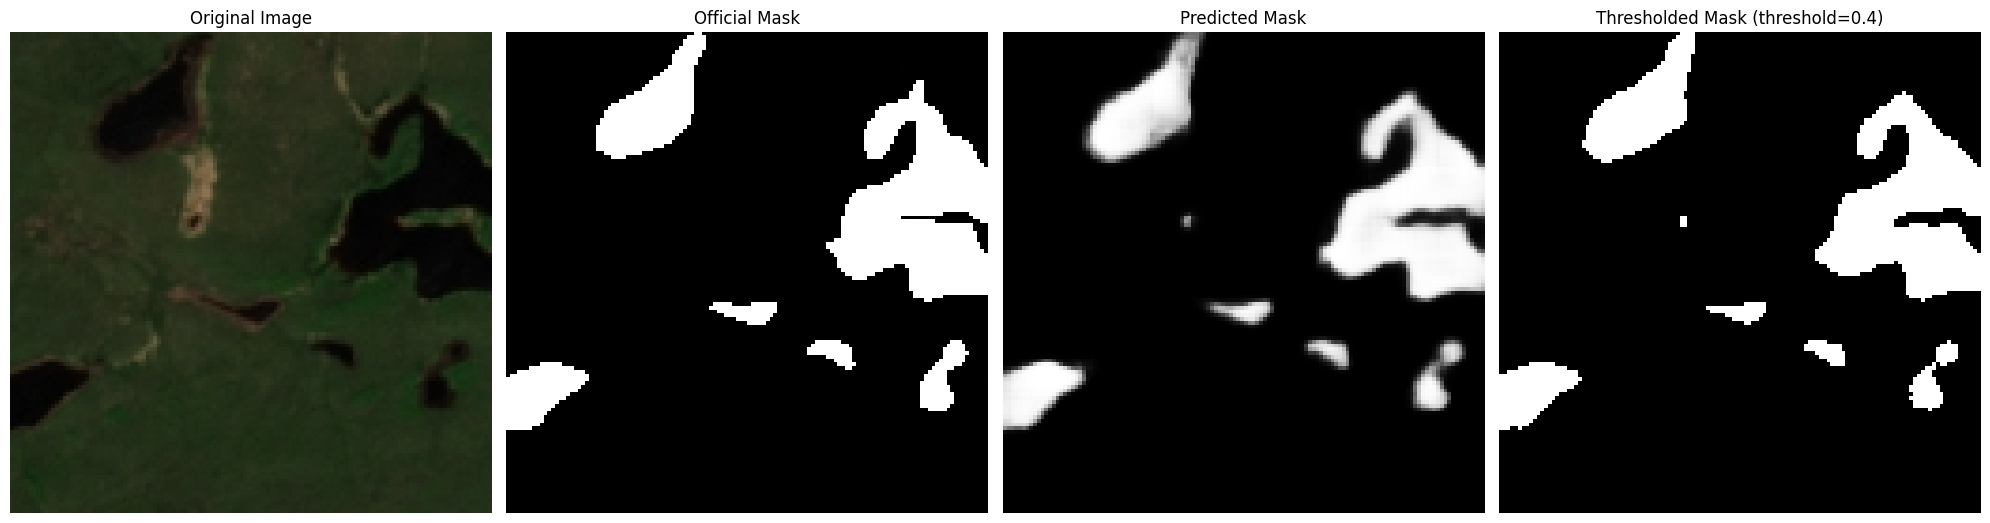

614_2432_896.jpg


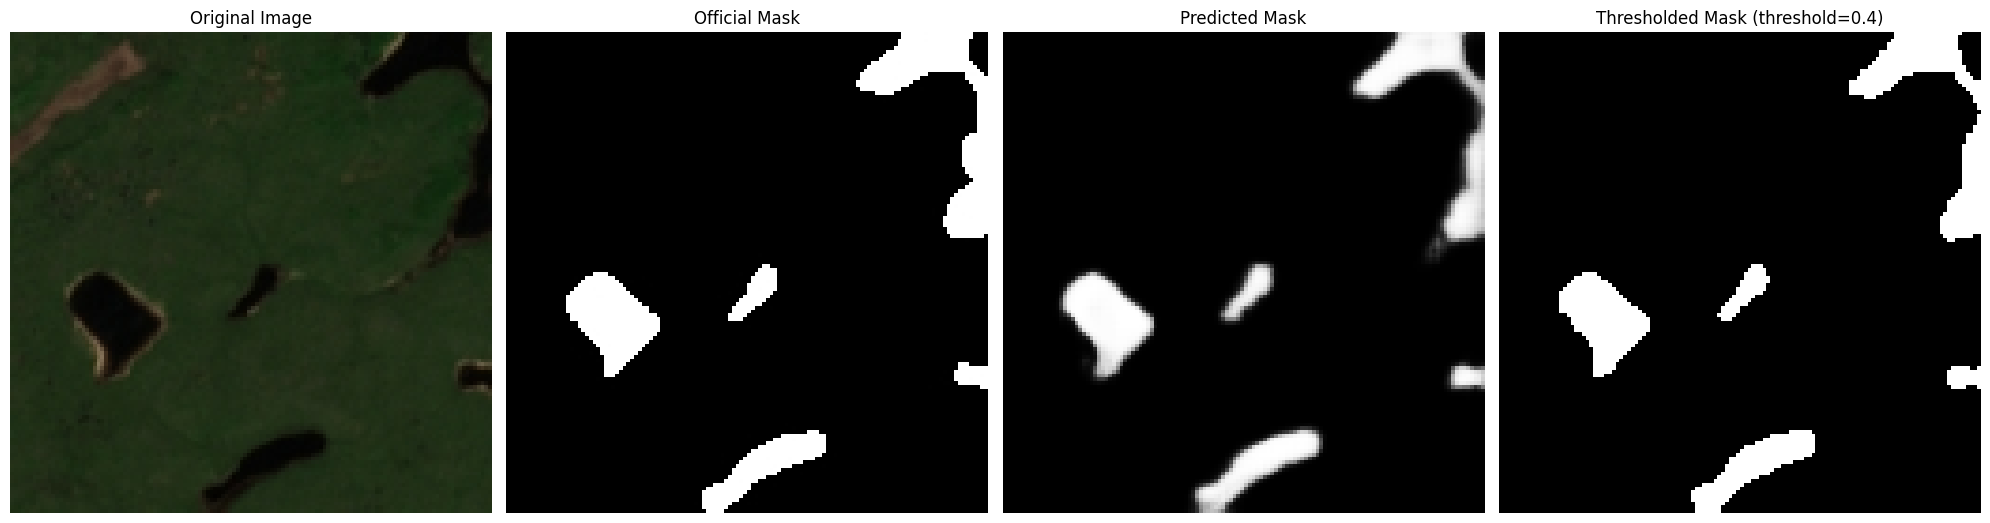

625_3840_896.jpg


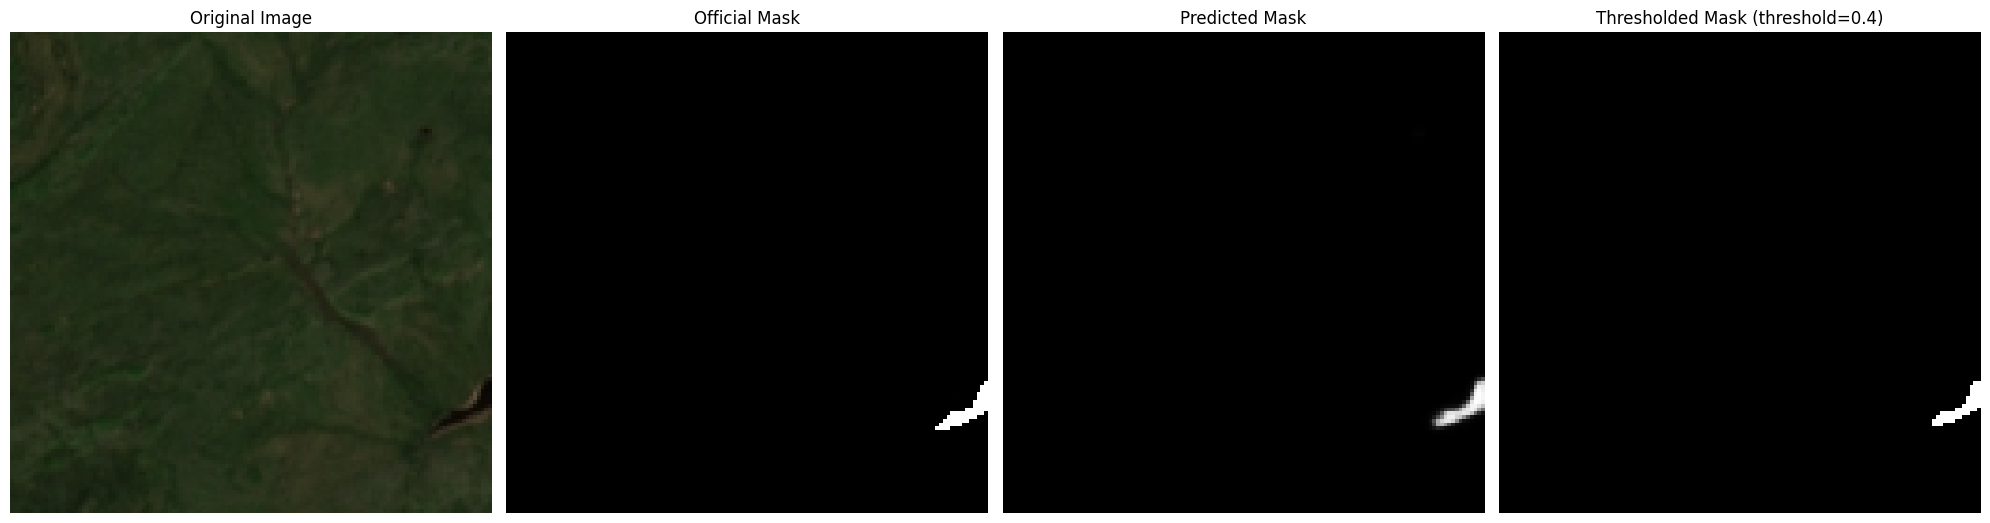

668_9344_896.jpg


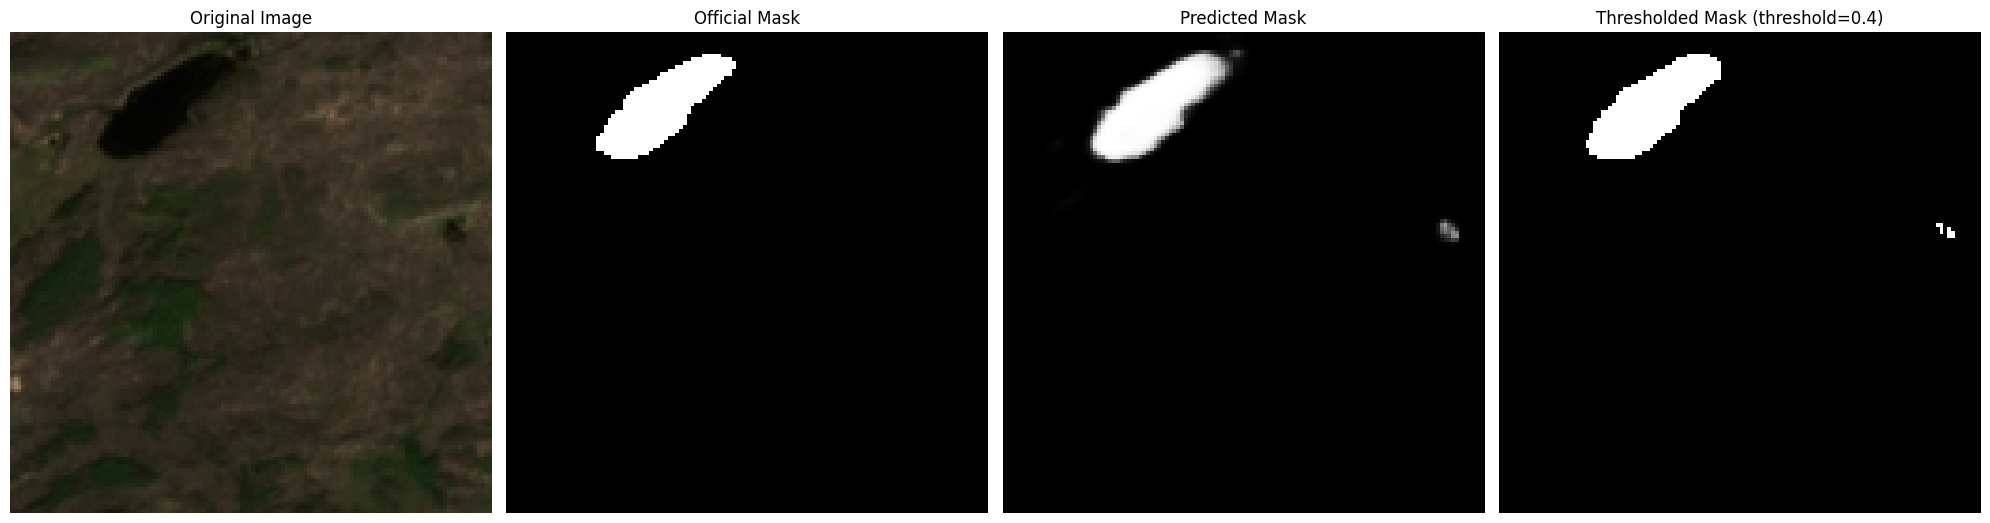

682_256_1024.jpg


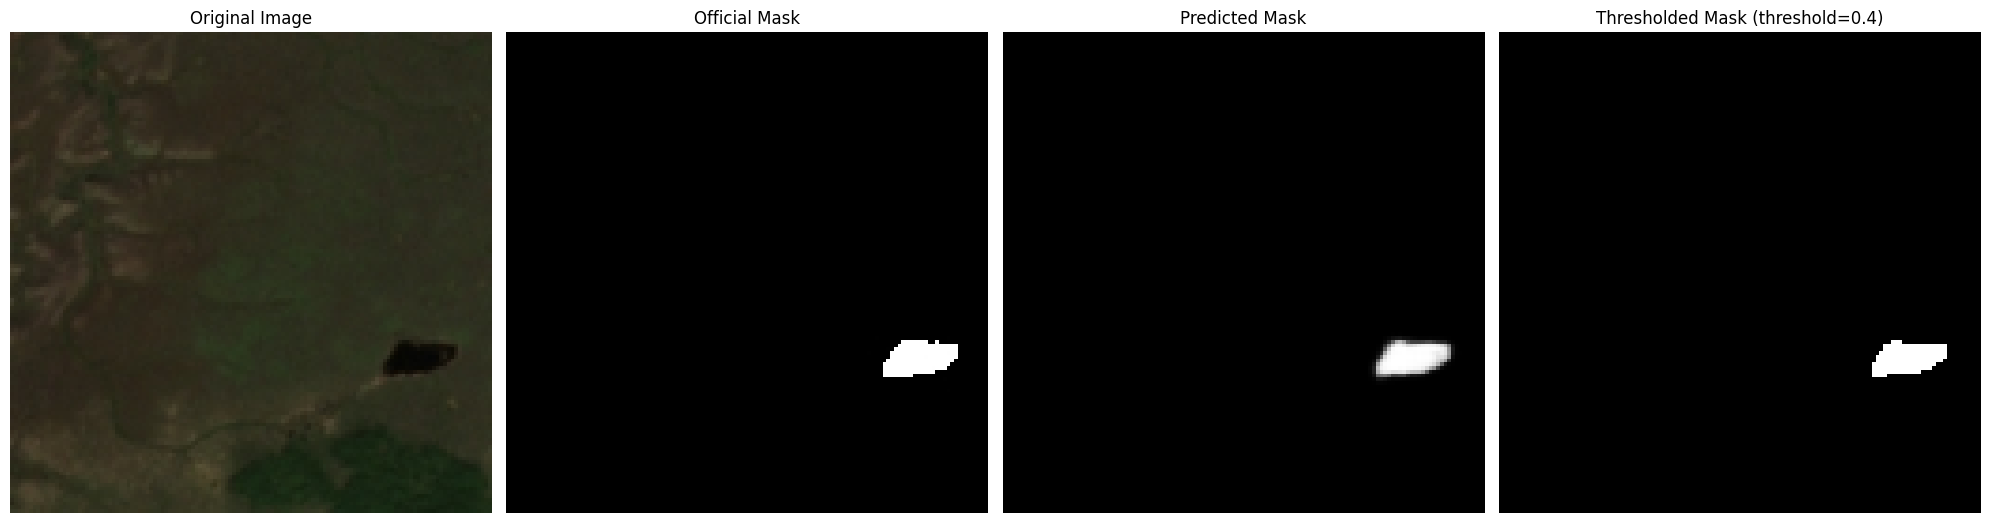

689_1152_1024.jpg


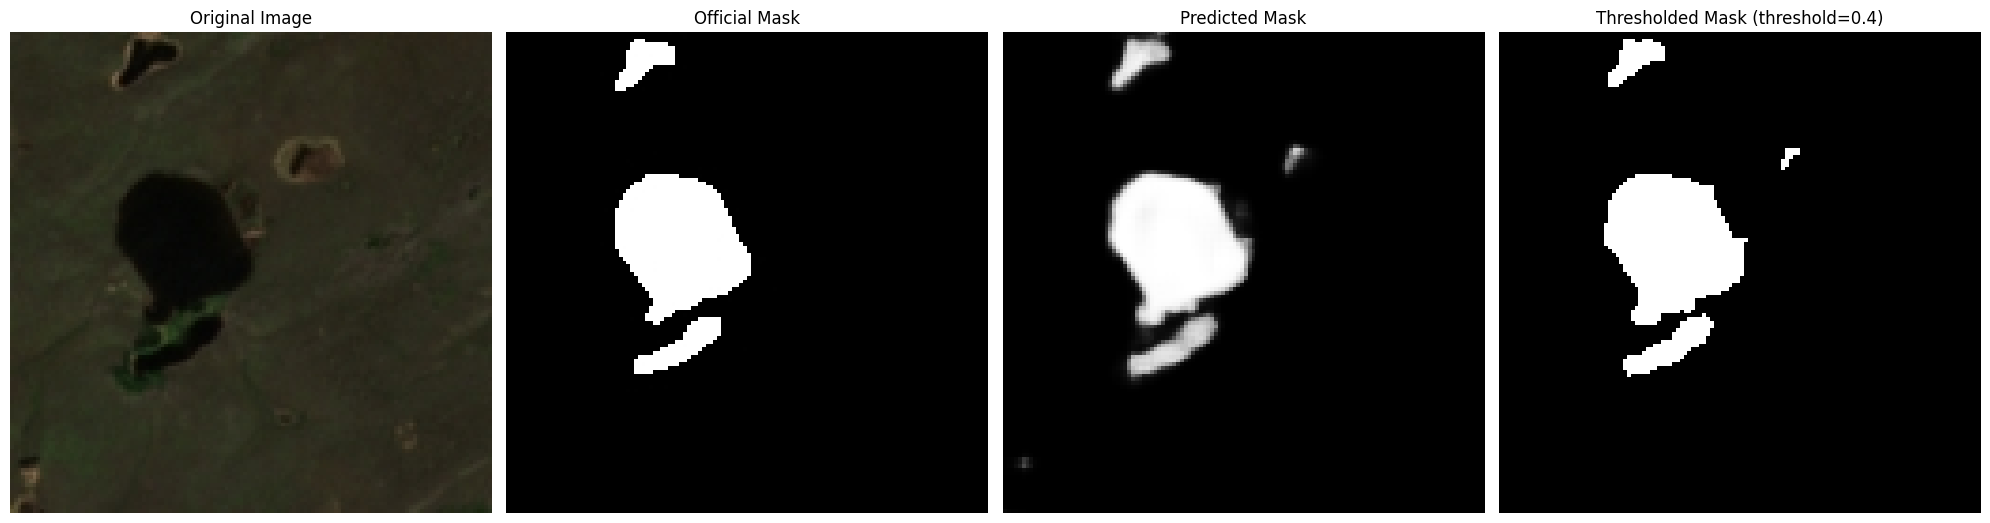

691_1408_1024.jpg


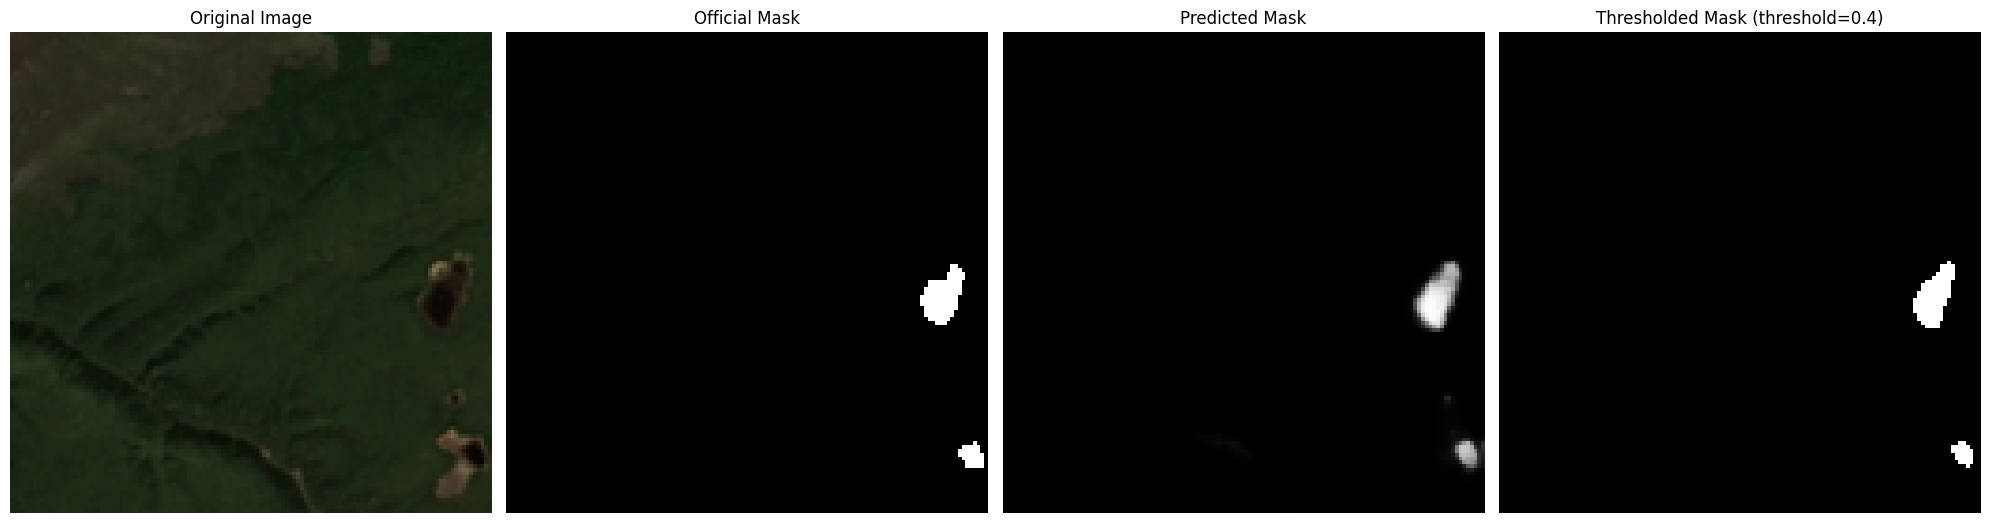

697_2176_1024.jpg


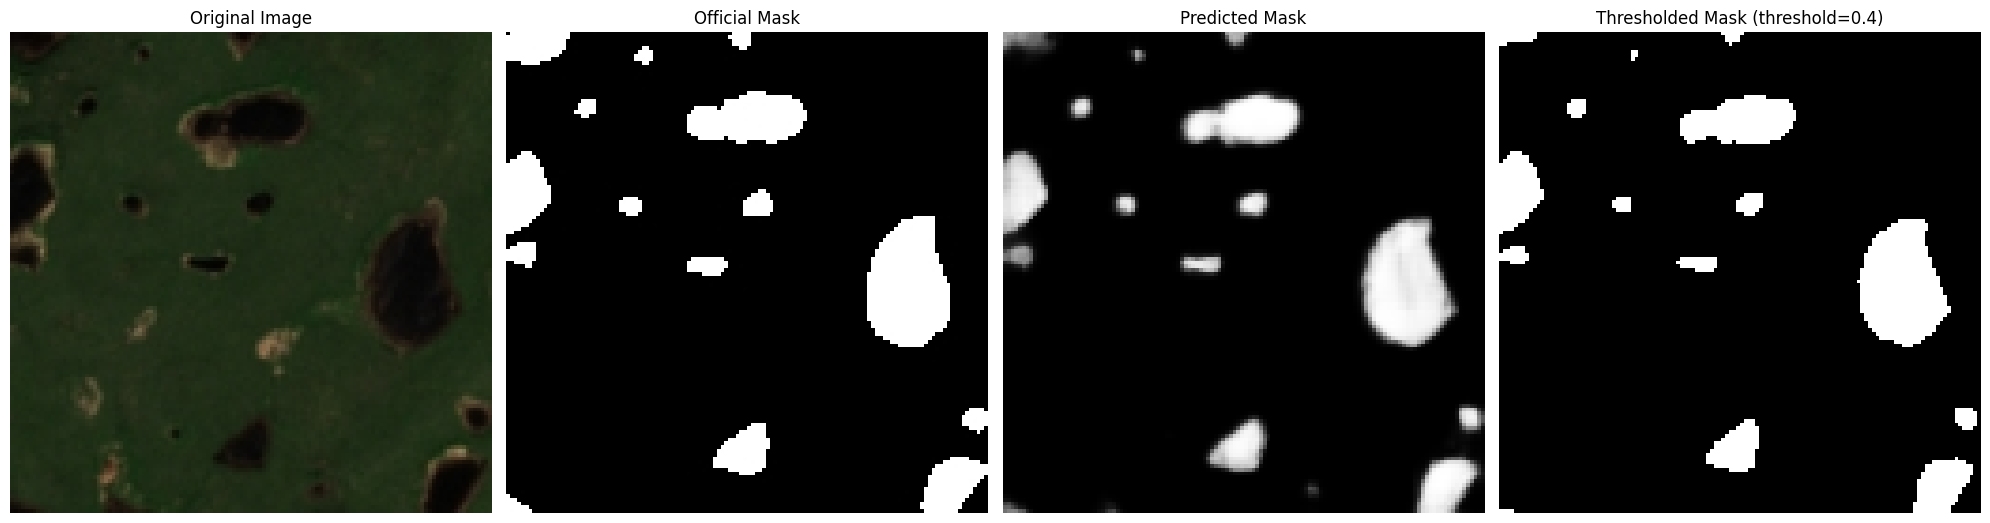

69_8832_0.jpg


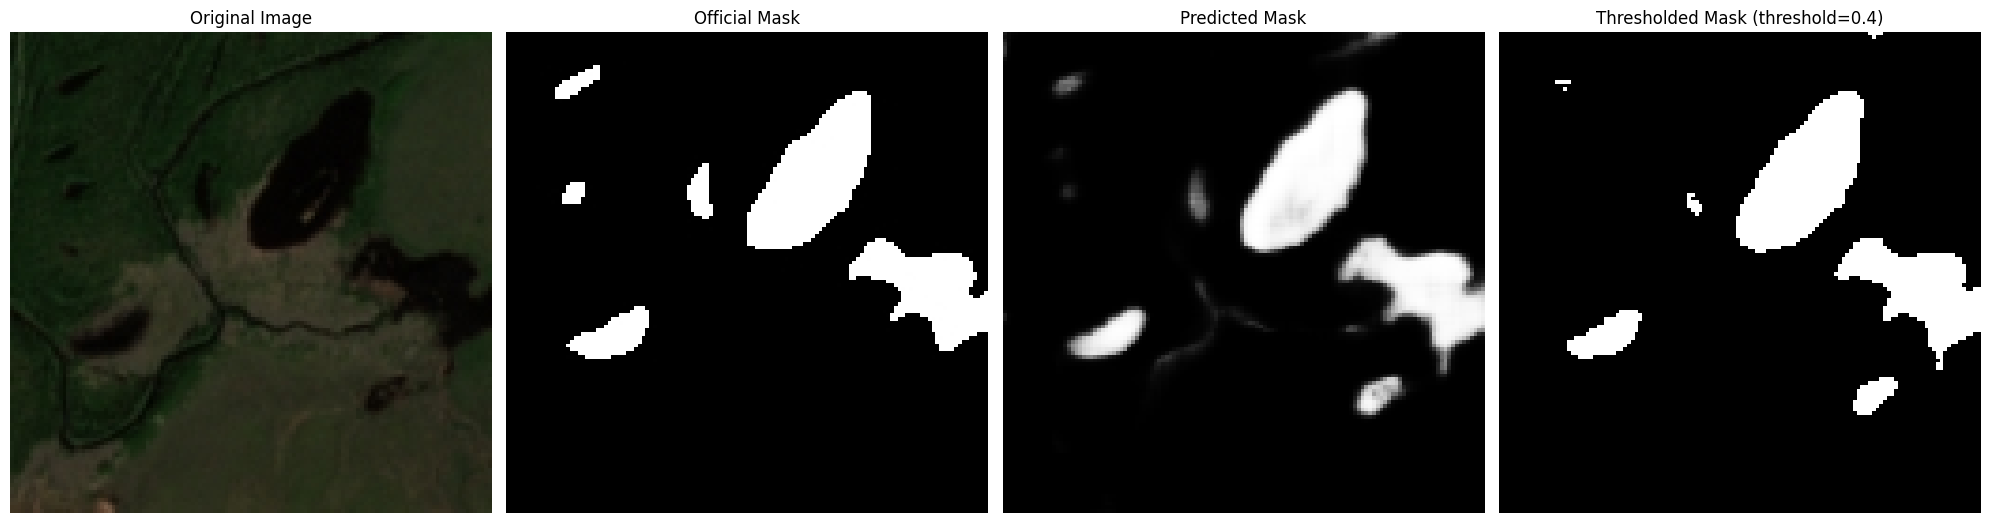

705_3200_1024.jpg


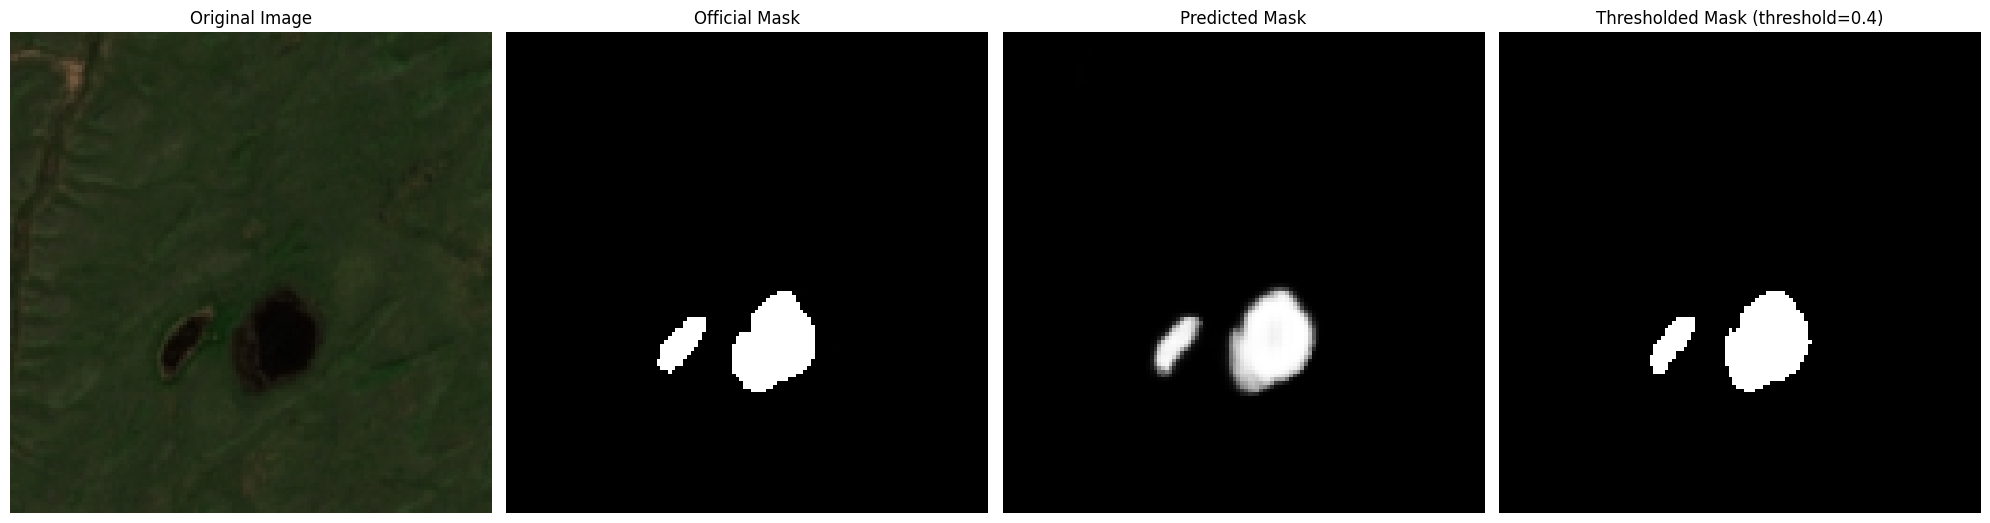

711_3968_1024.jpg


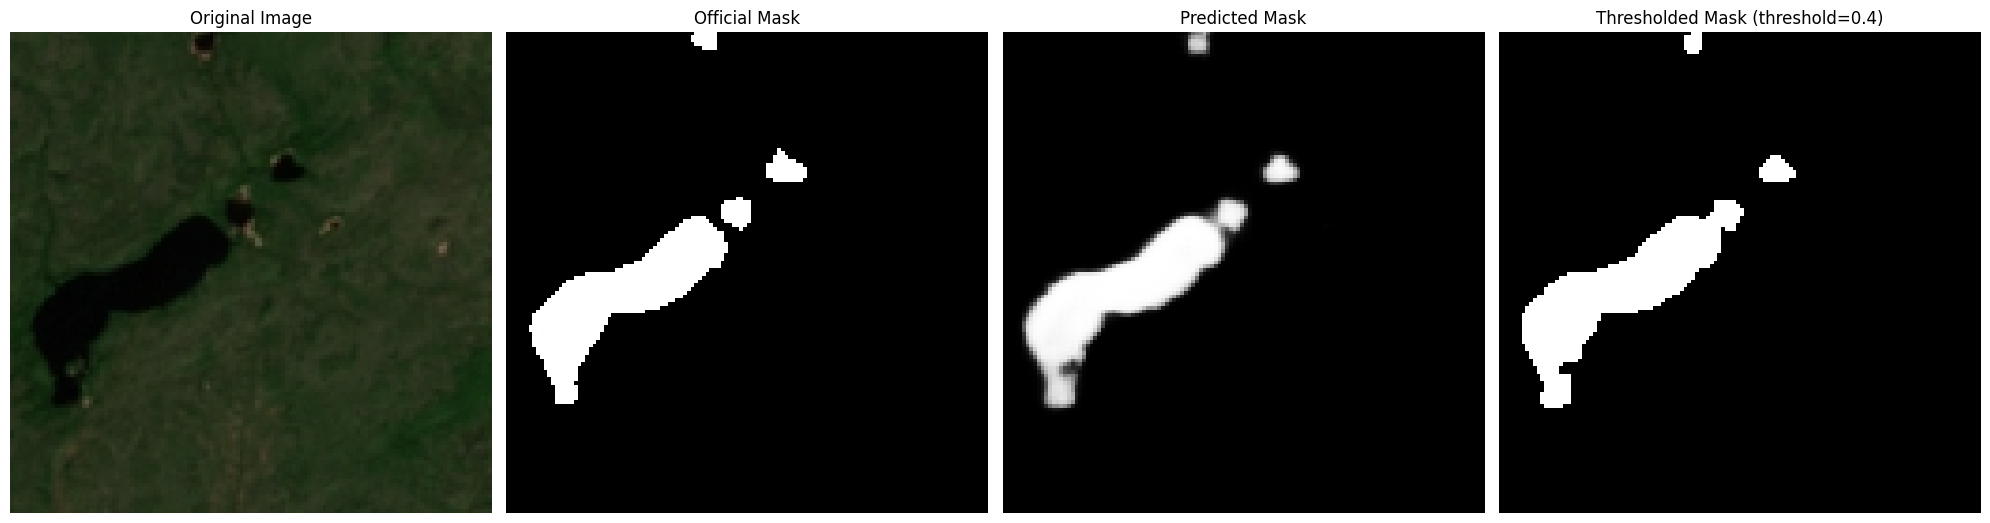

748_8704_1024.jpg


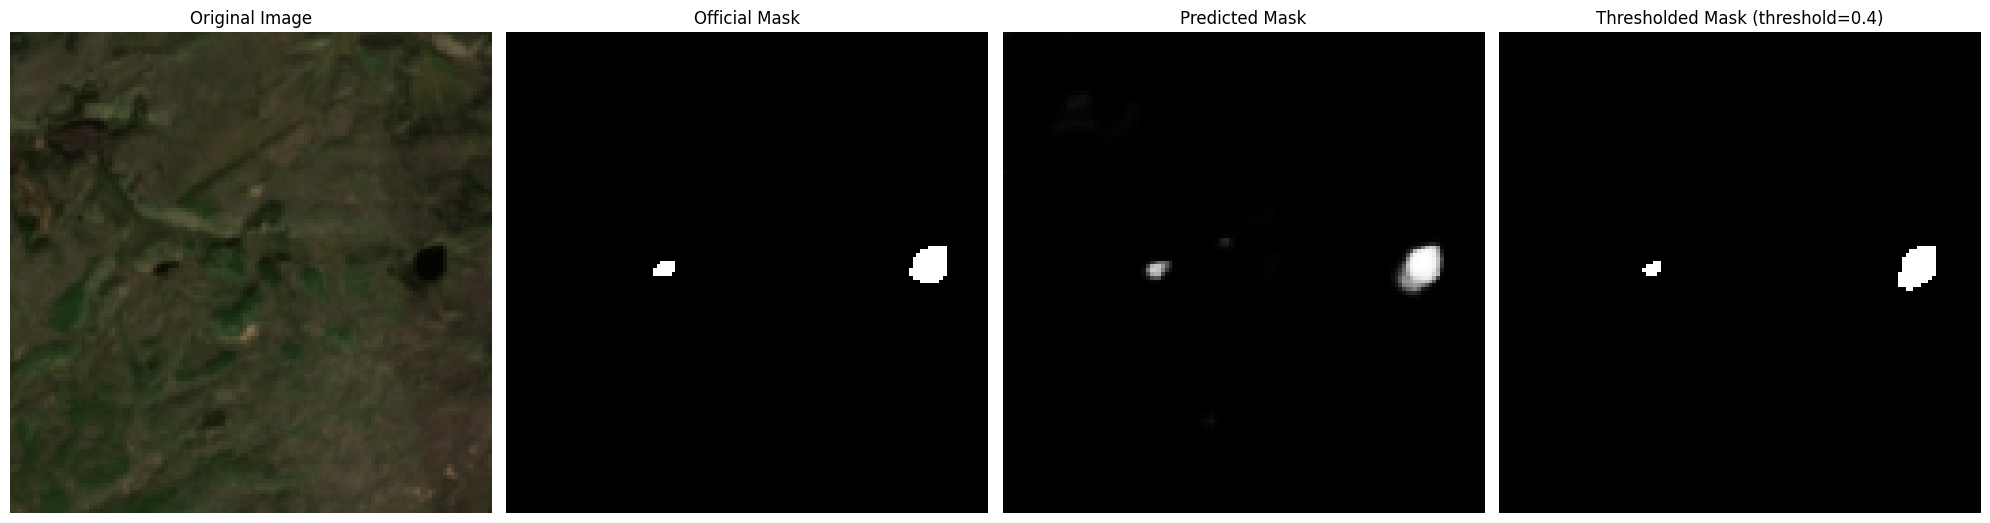

749_8832_1024.jpg


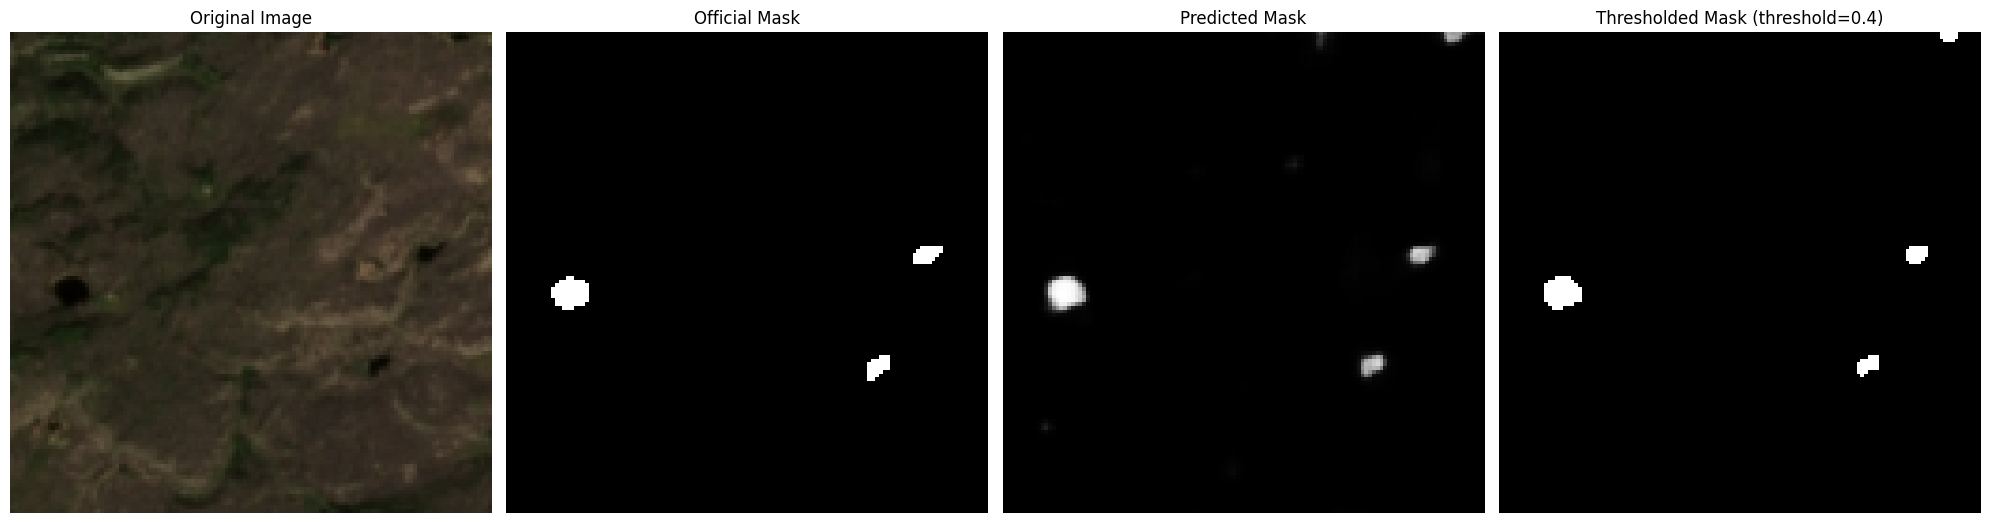

830_8320_1152.jpg


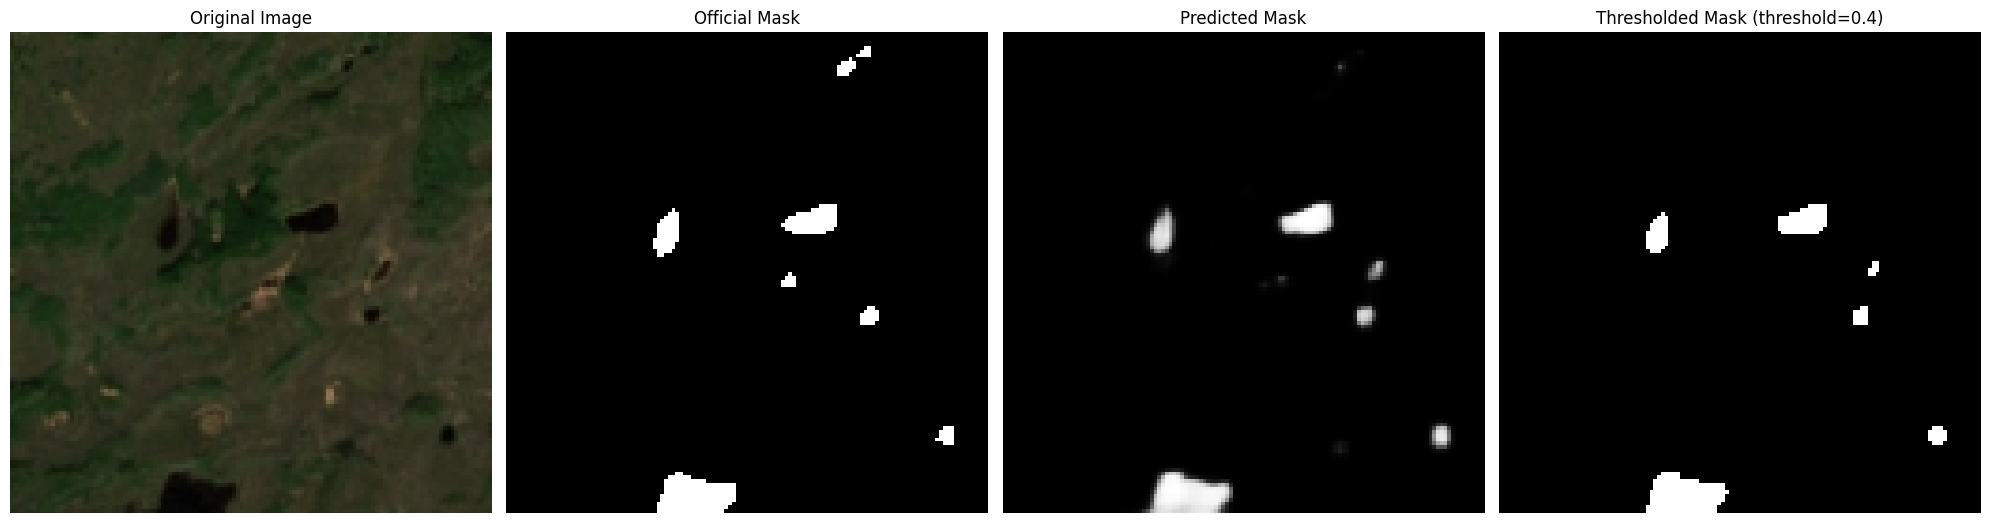

832_8576_1152.jpg


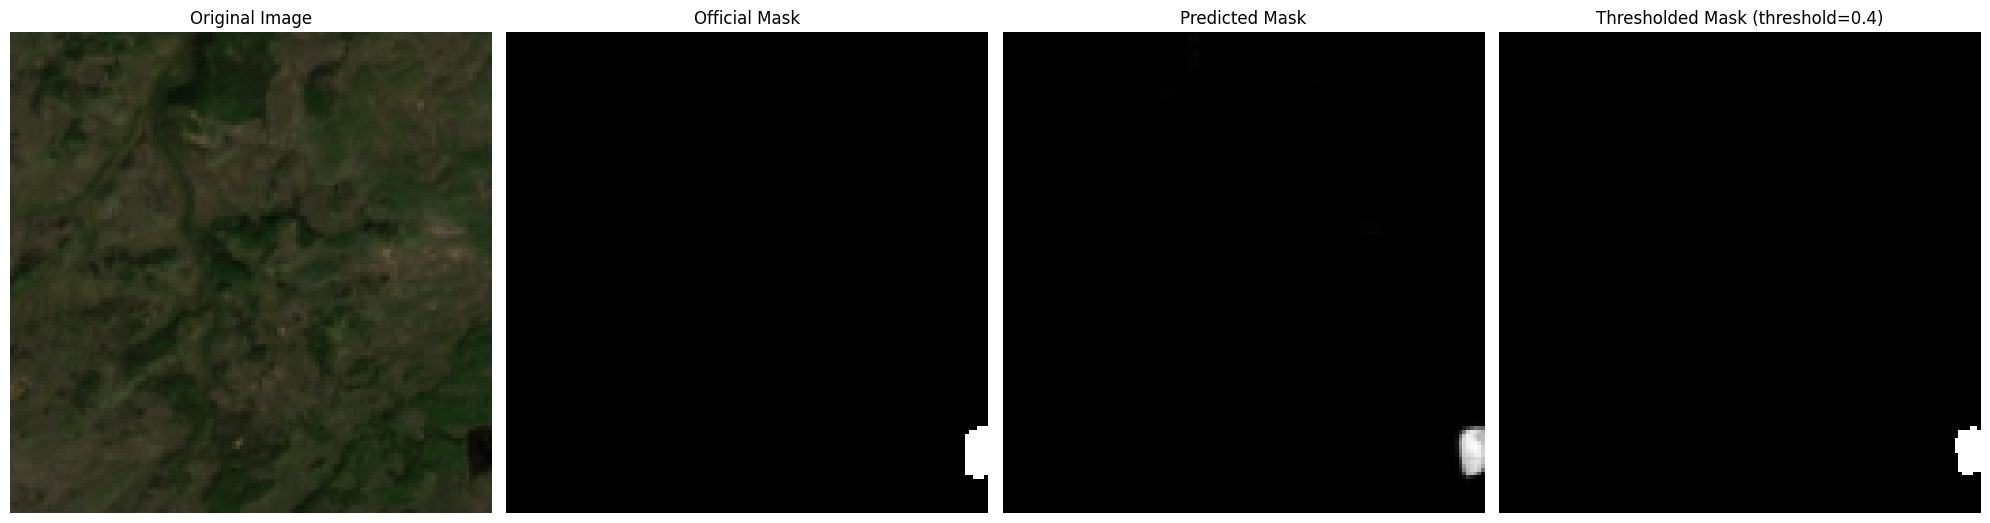

835_8960_1152.jpg


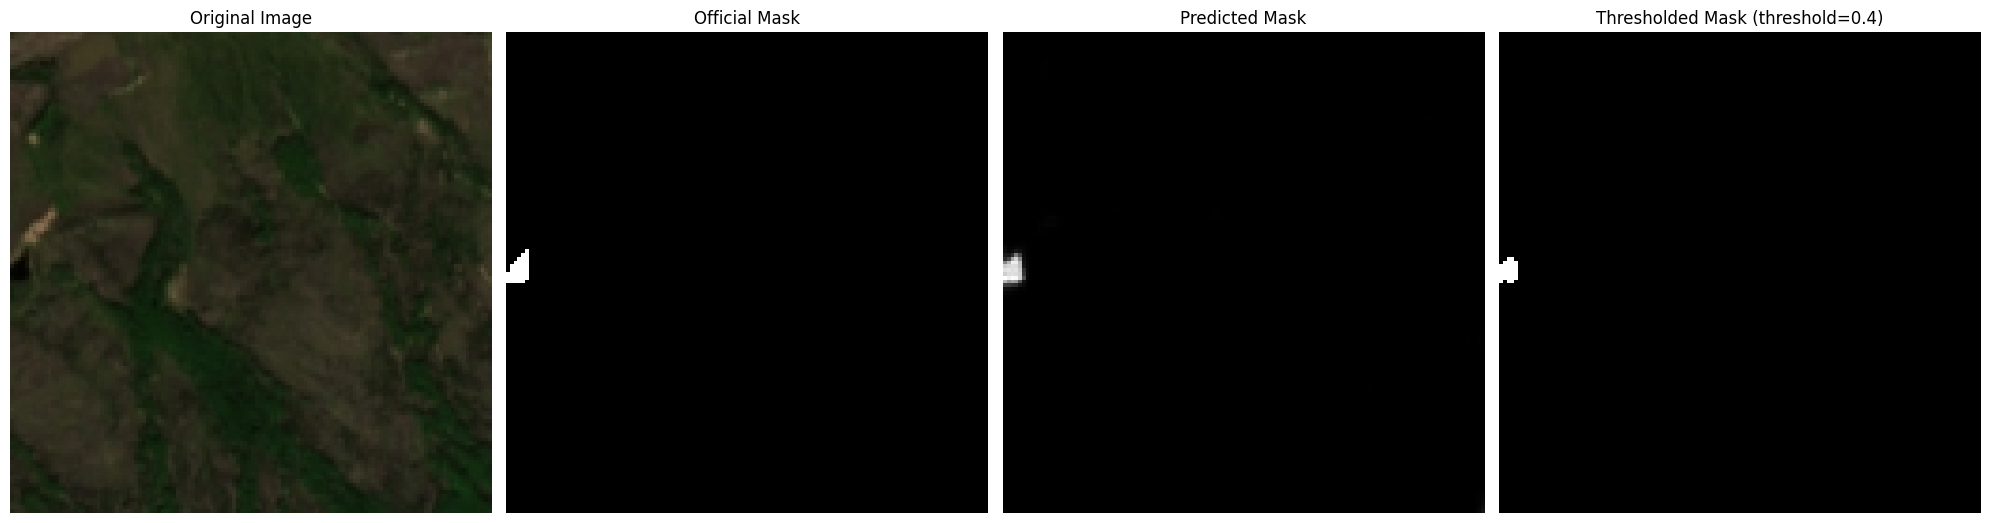

851_128_1280.jpg


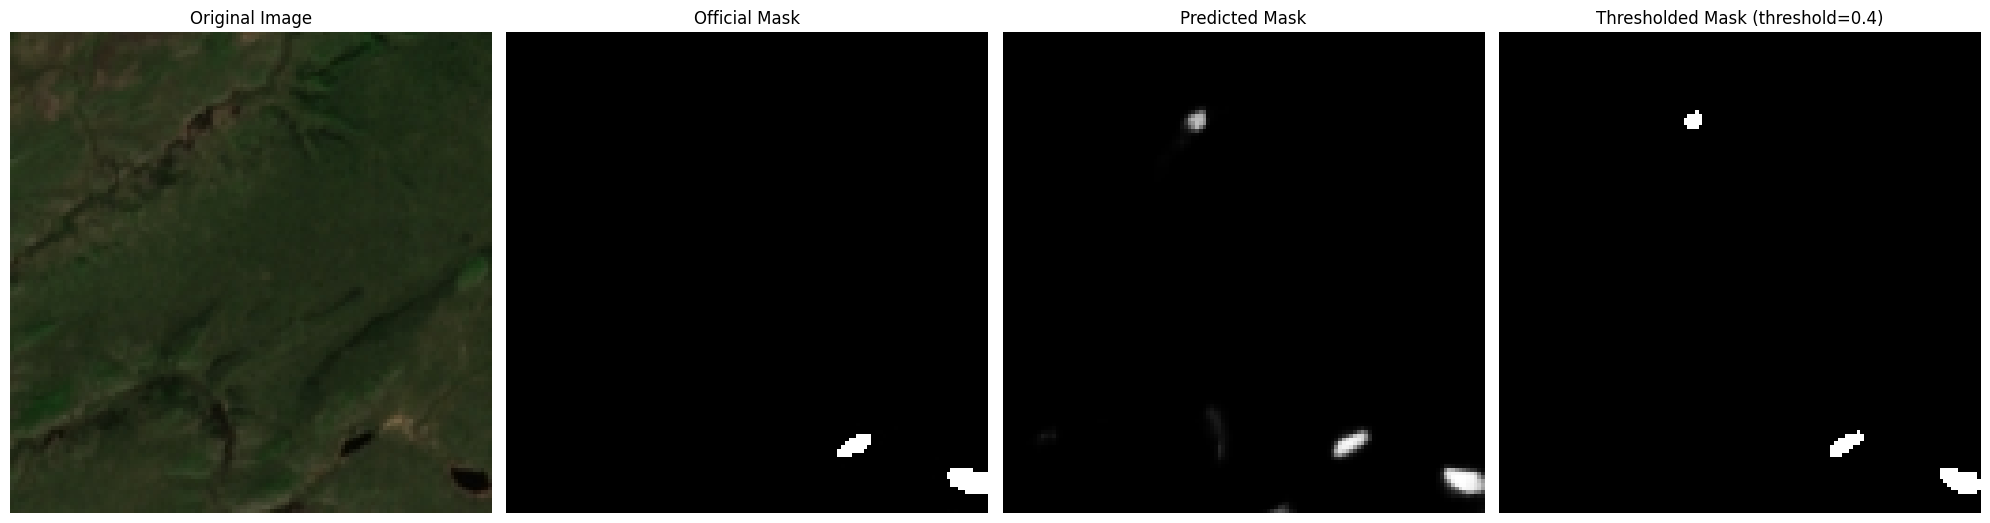

880_3840_1280.jpg


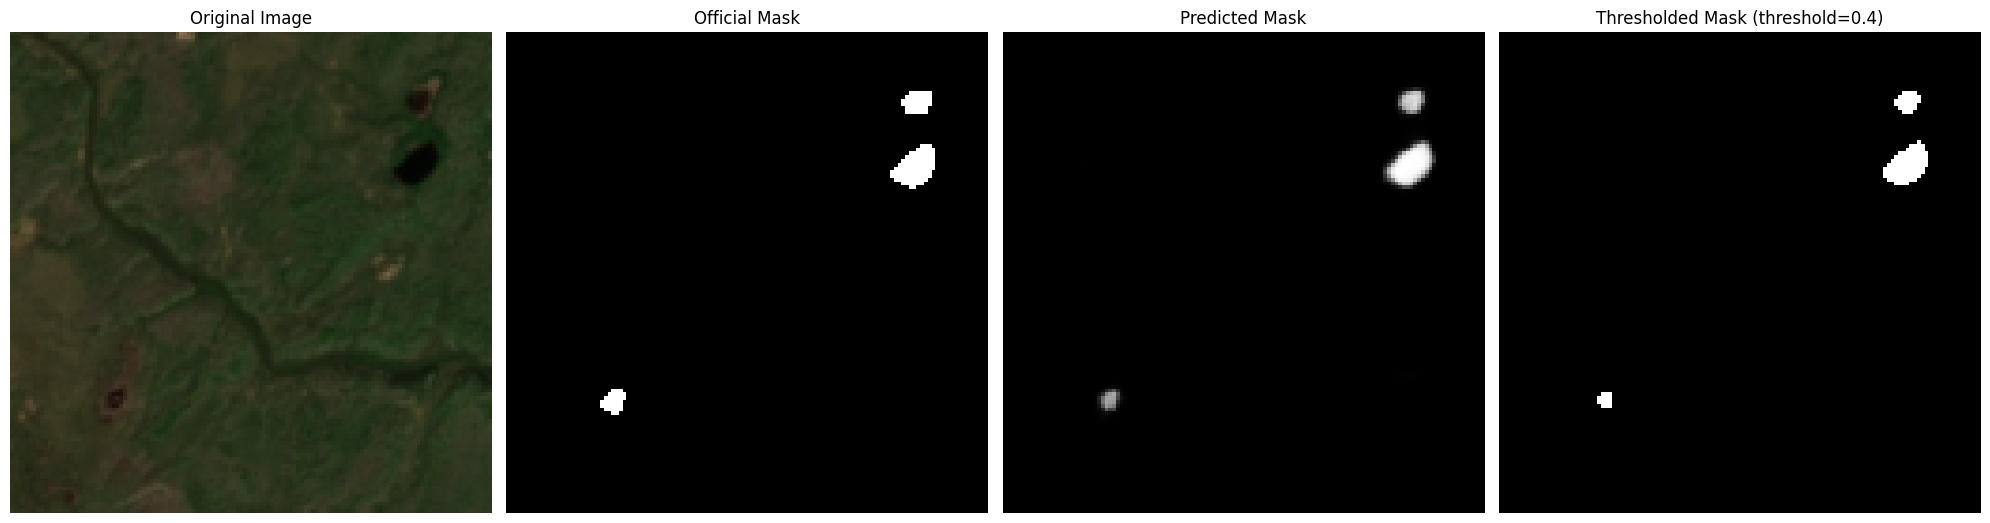

8_1024_0.jpg


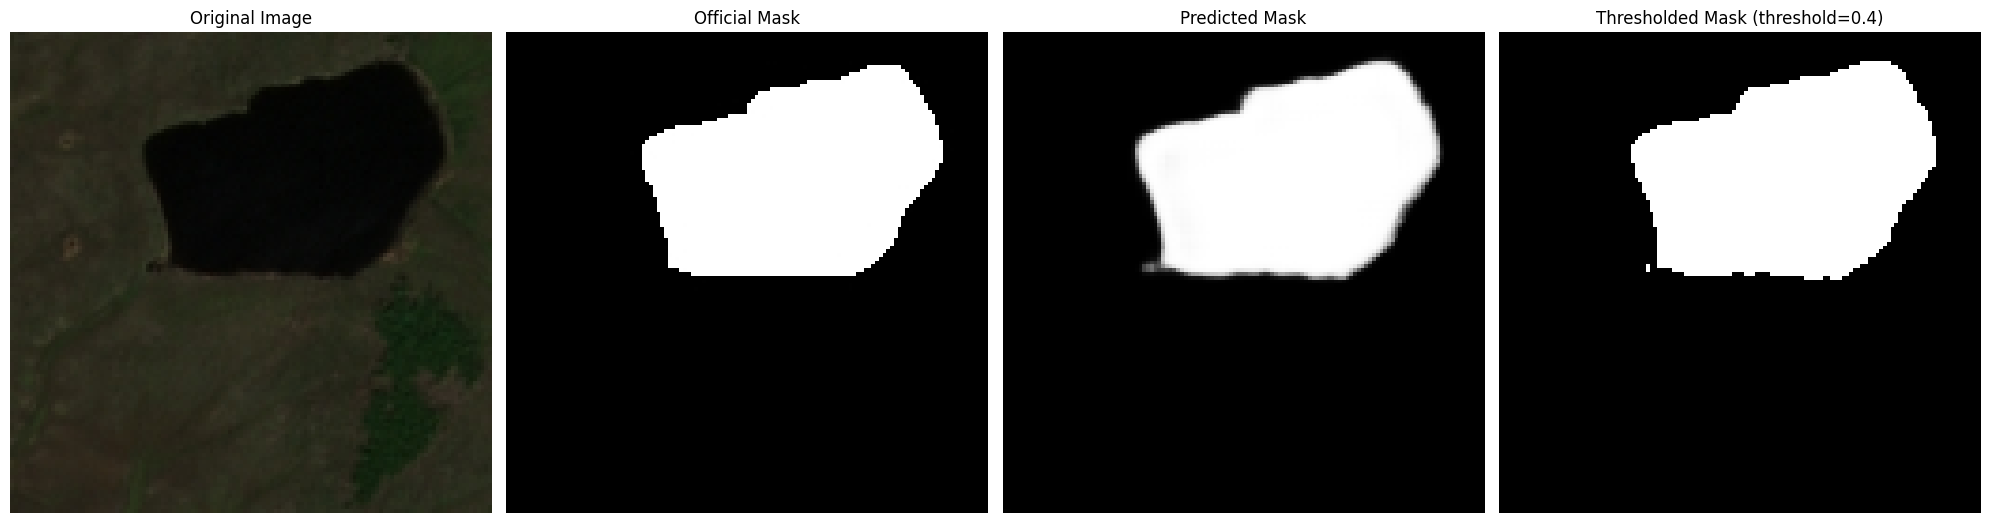

932_10496_1280.jpg


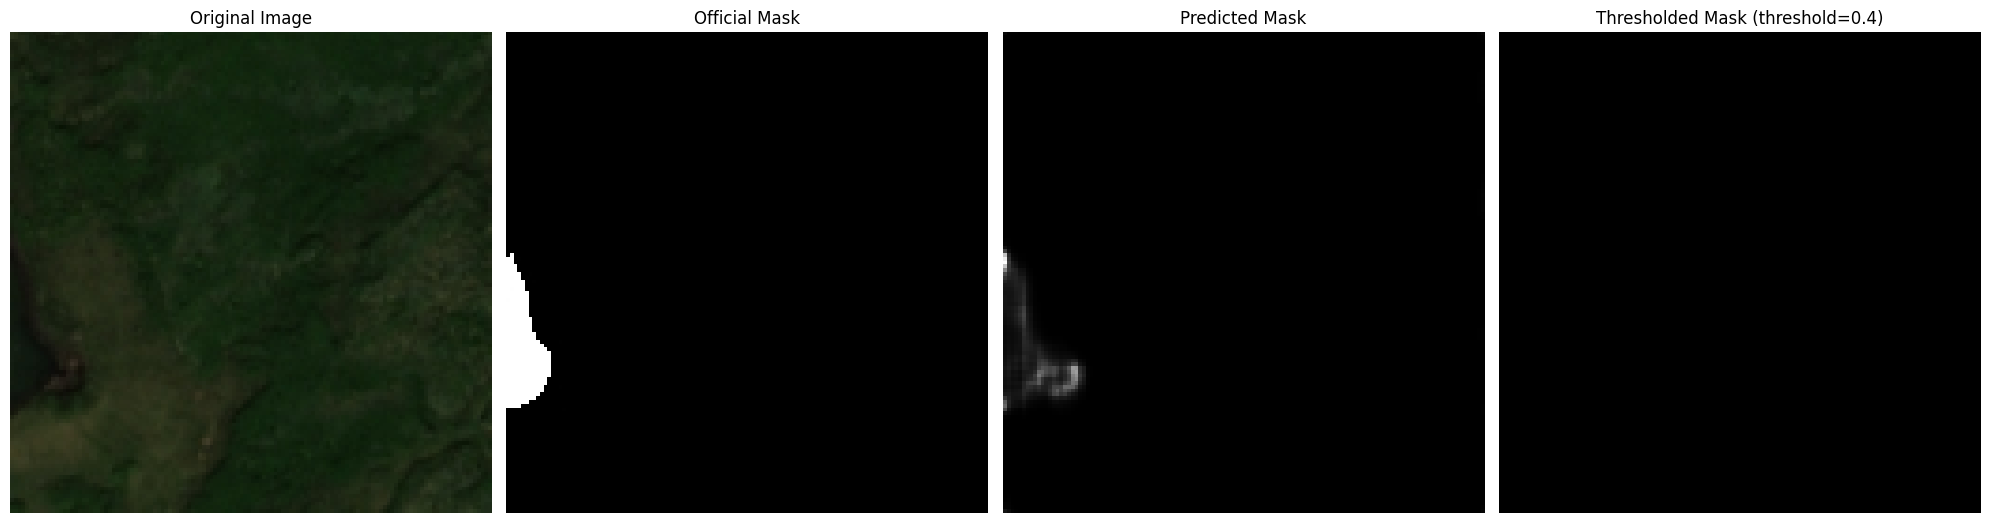

938_384_1408.jpg


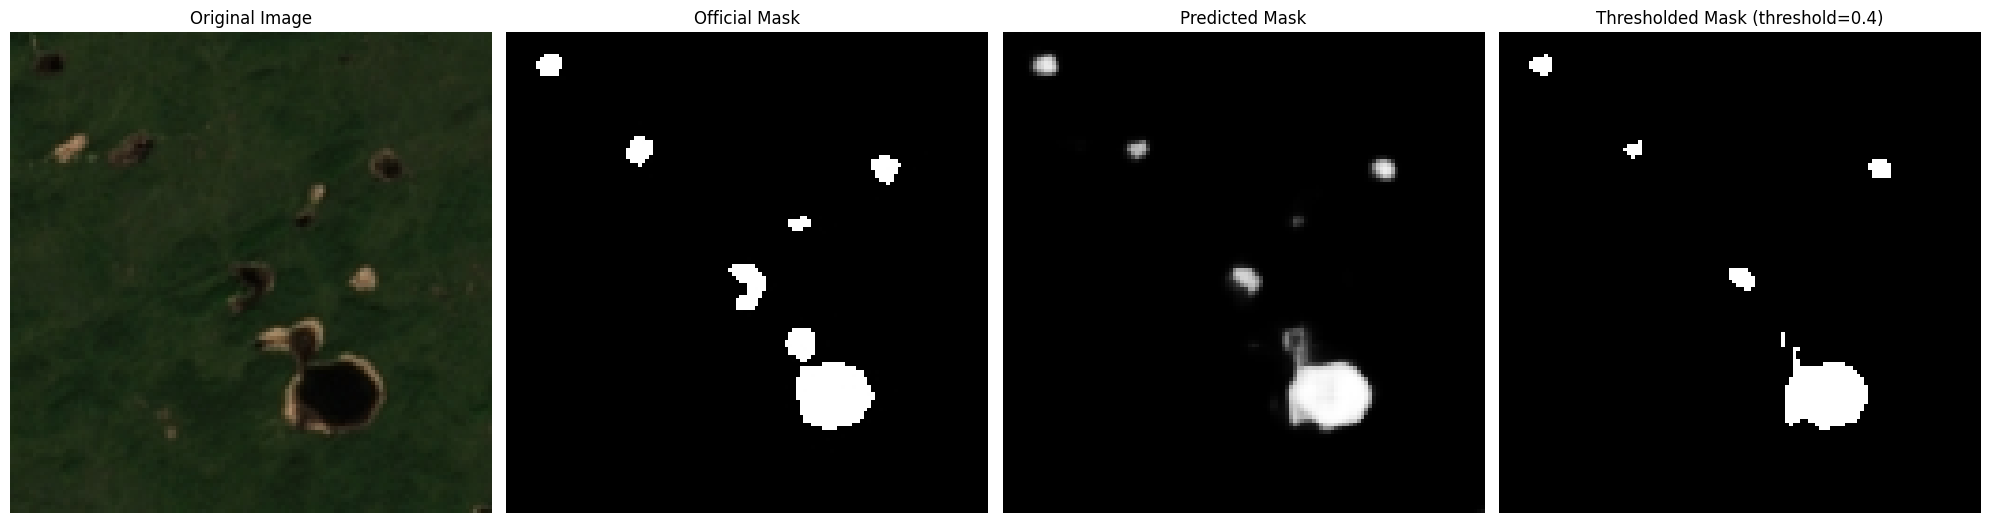

939_512_1408.jpg


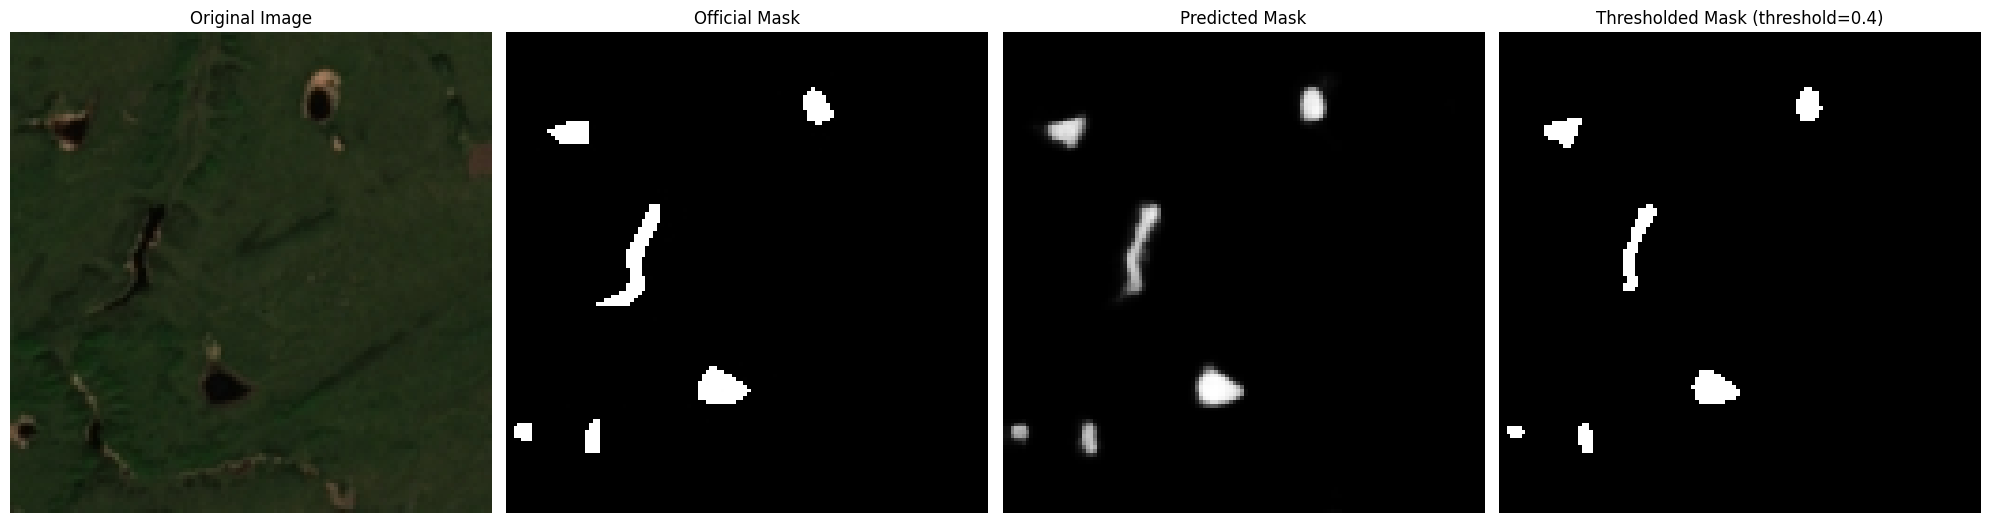

948_1664_1408.jpg


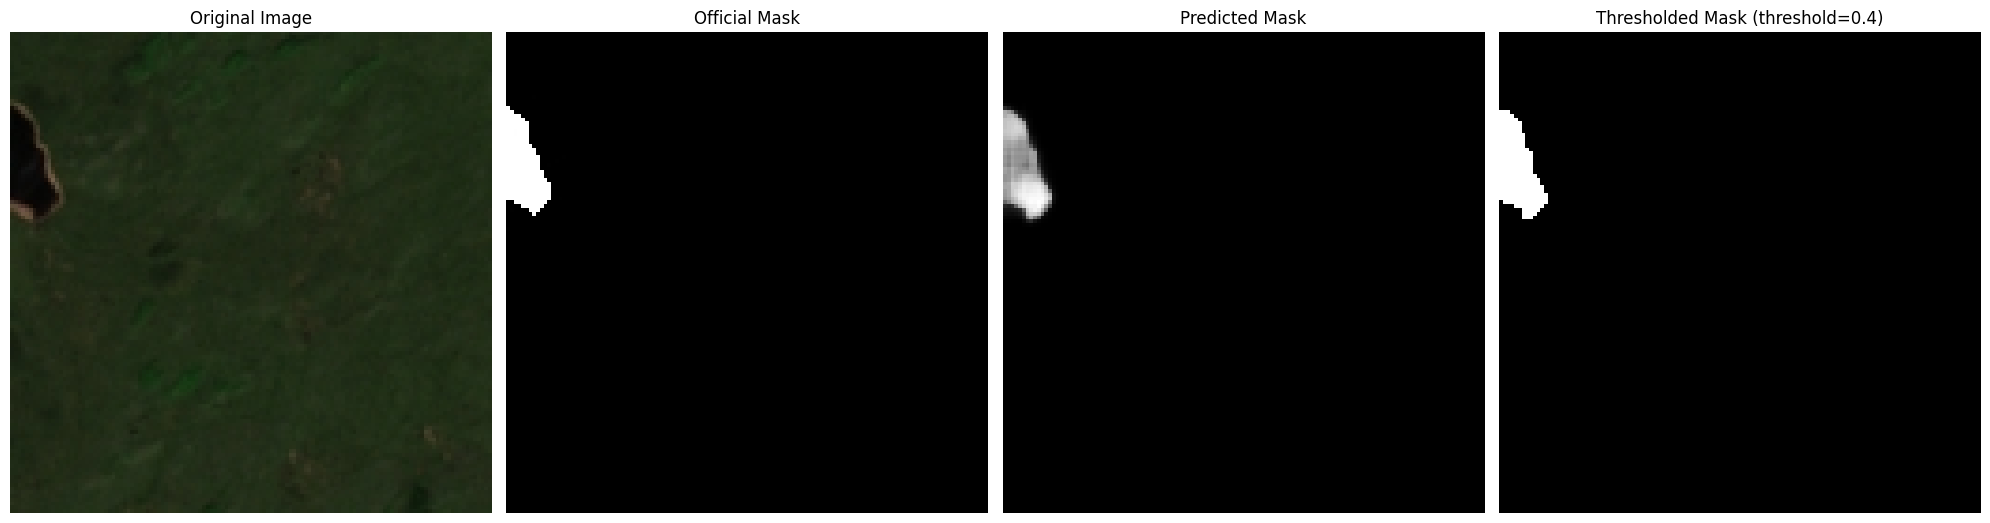

1278_384_1920.jpg


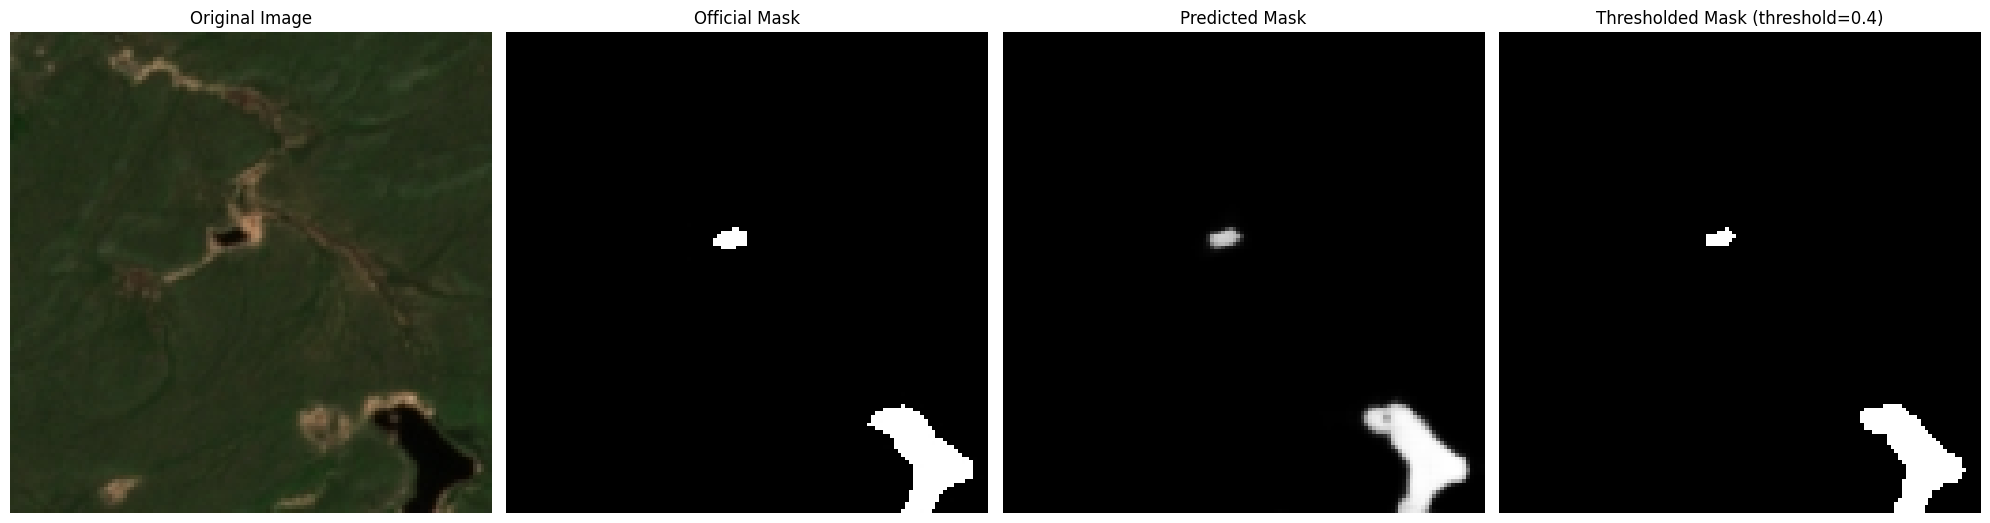

1279_512_1920.jpg


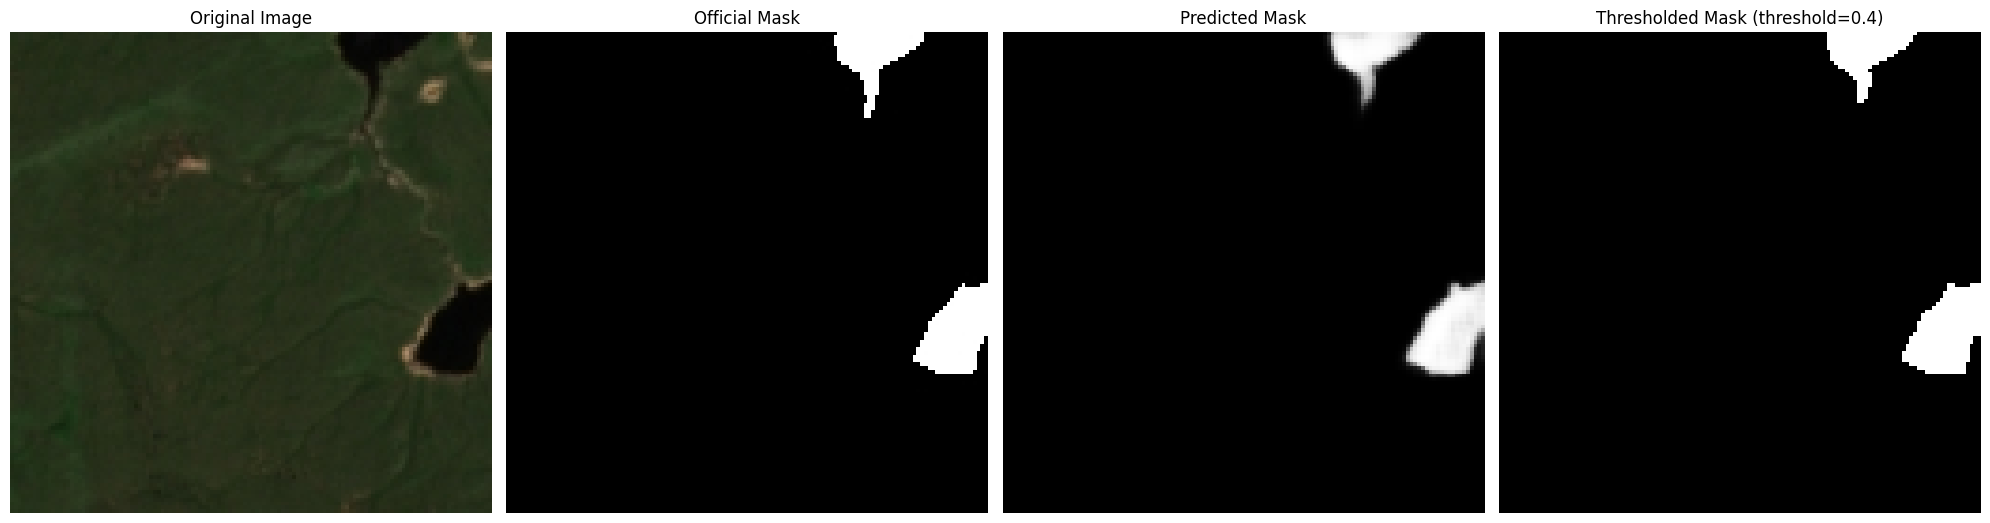

1280_640_1920.jpg


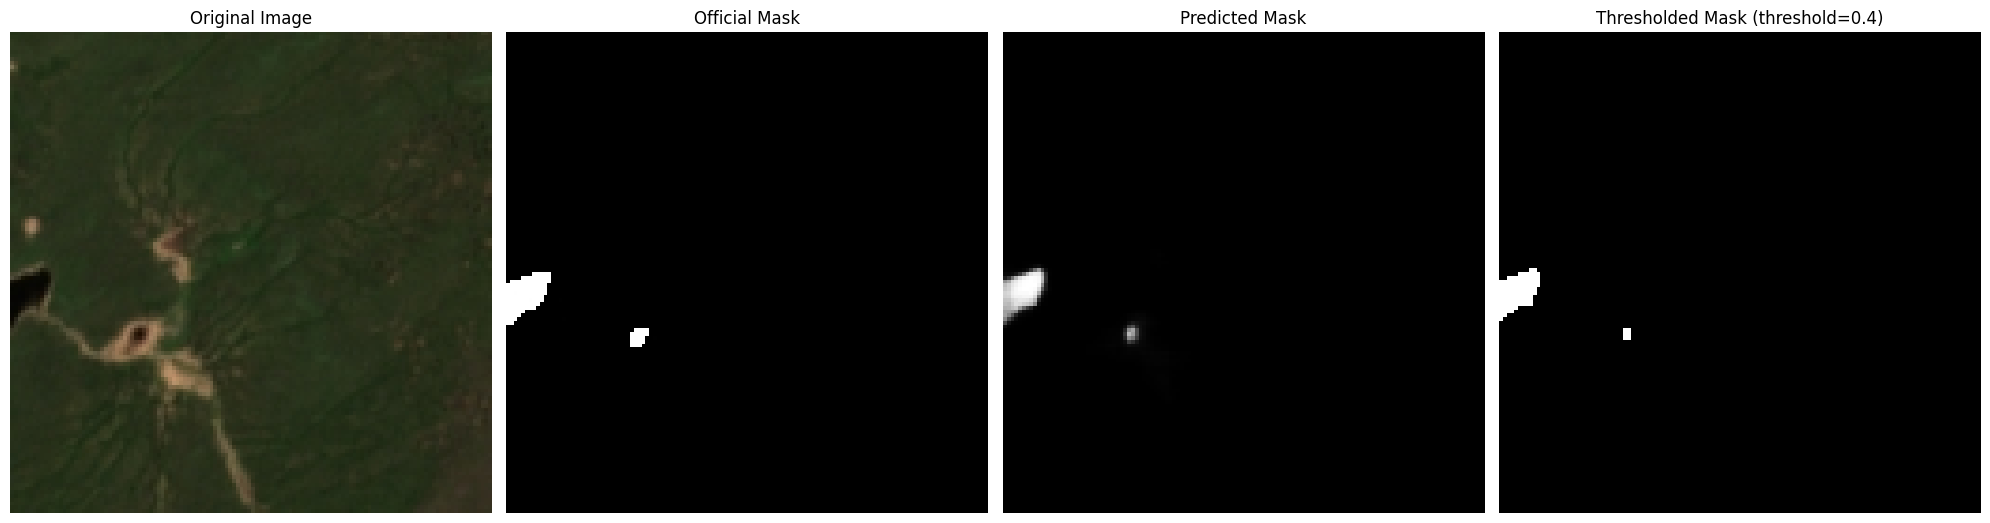

1294_2432_1920.jpg


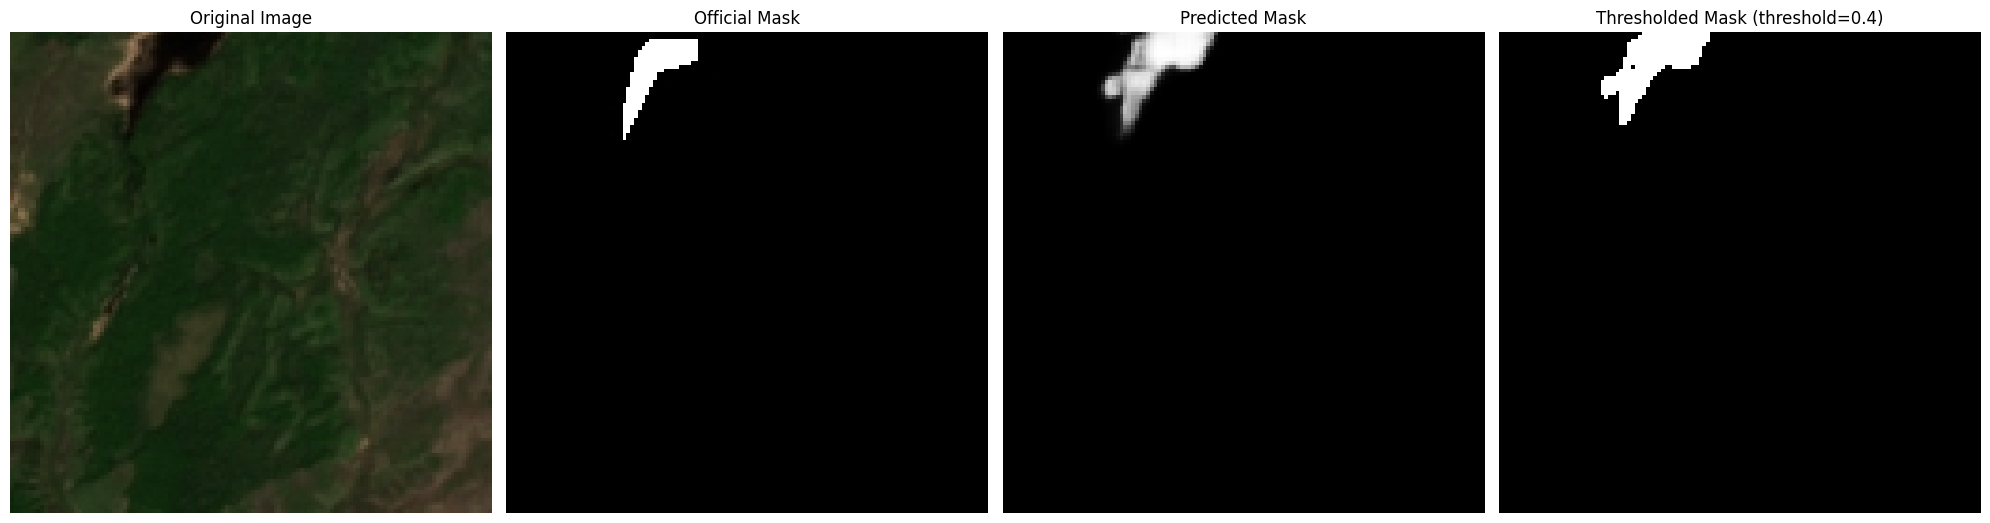

1319_5632_1920.jpg


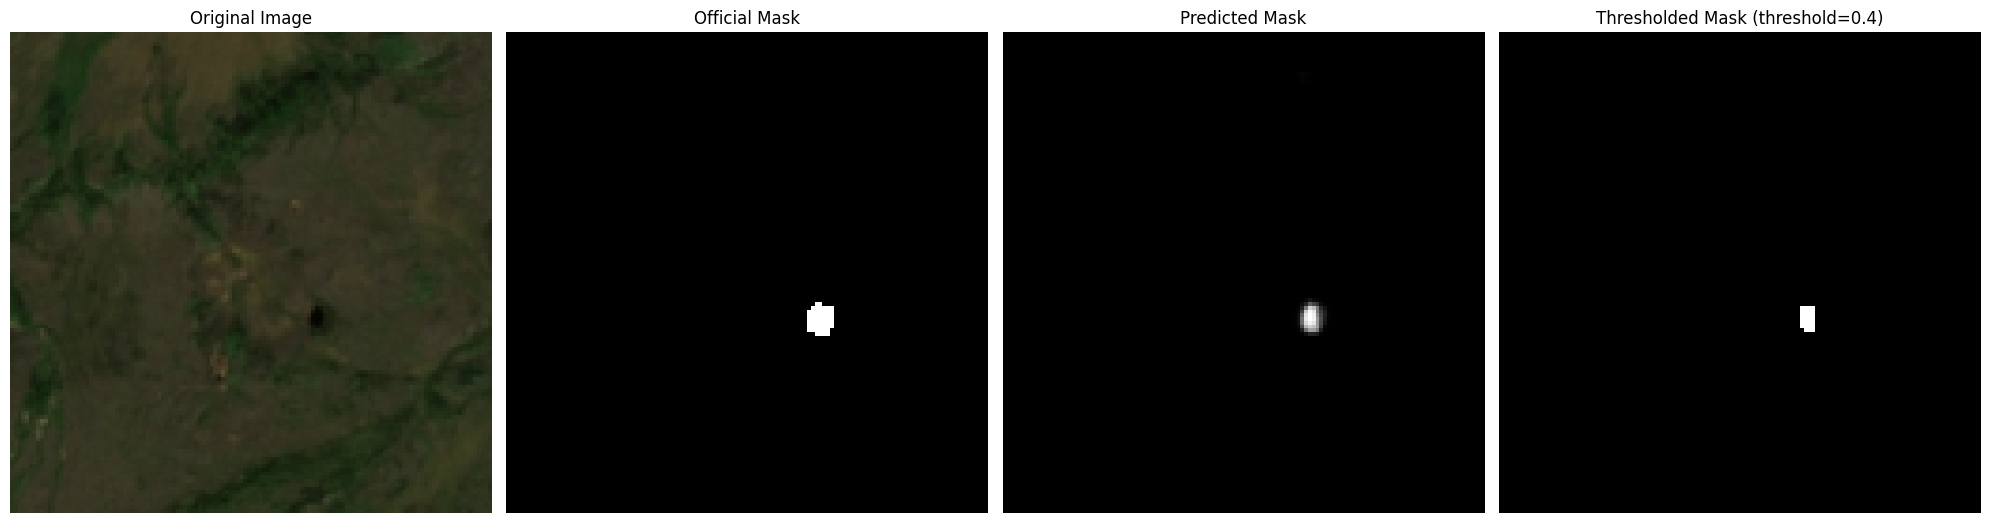

1326_6528_1920.jpg


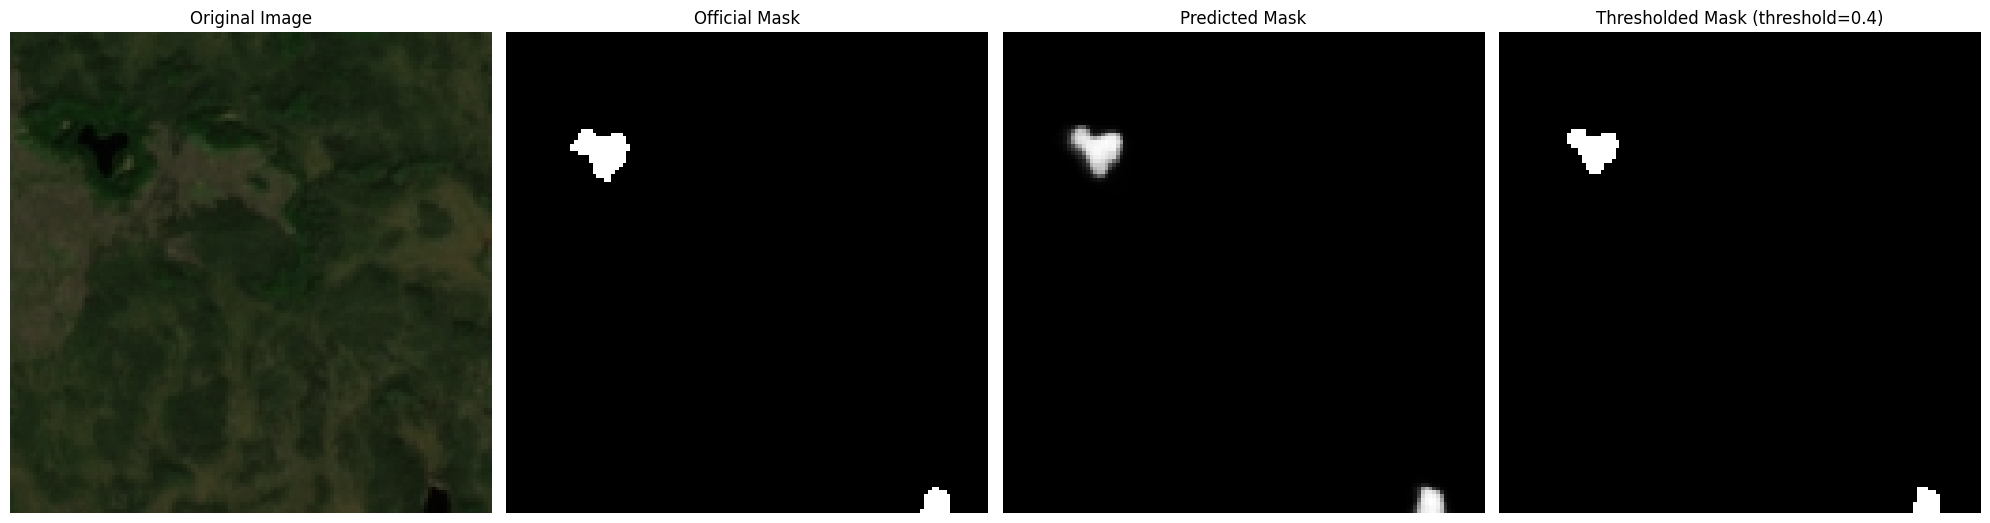

1344_8832_1920.jpg


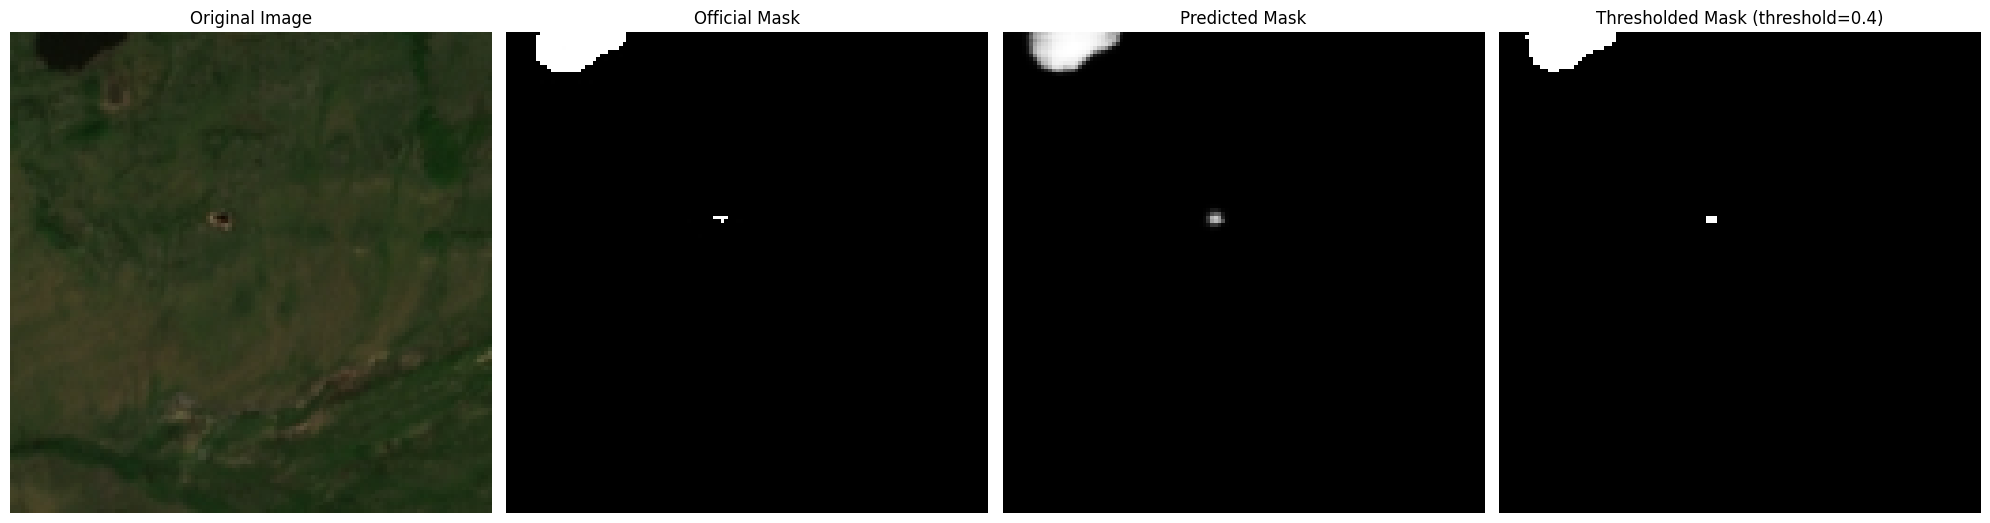

1354_10112_1920.jpg


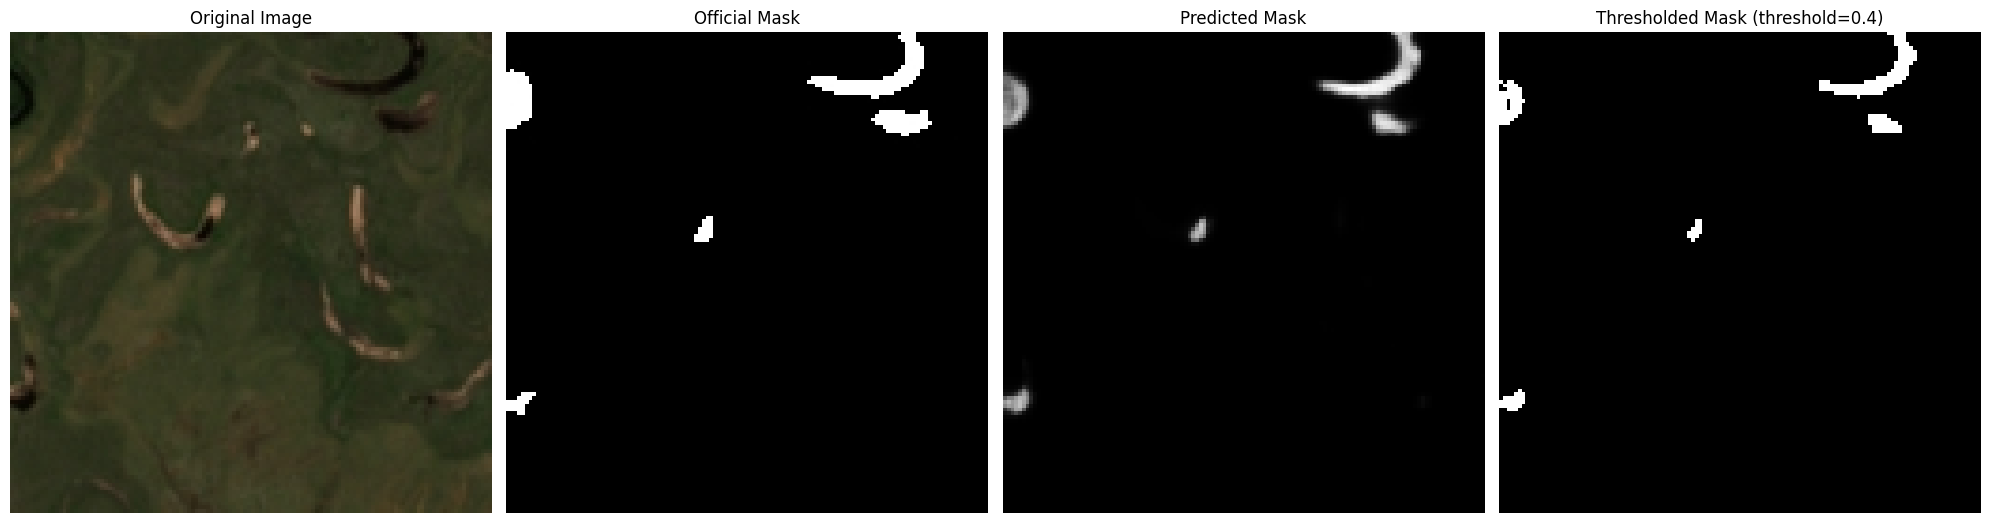

1367_896_2048.jpg


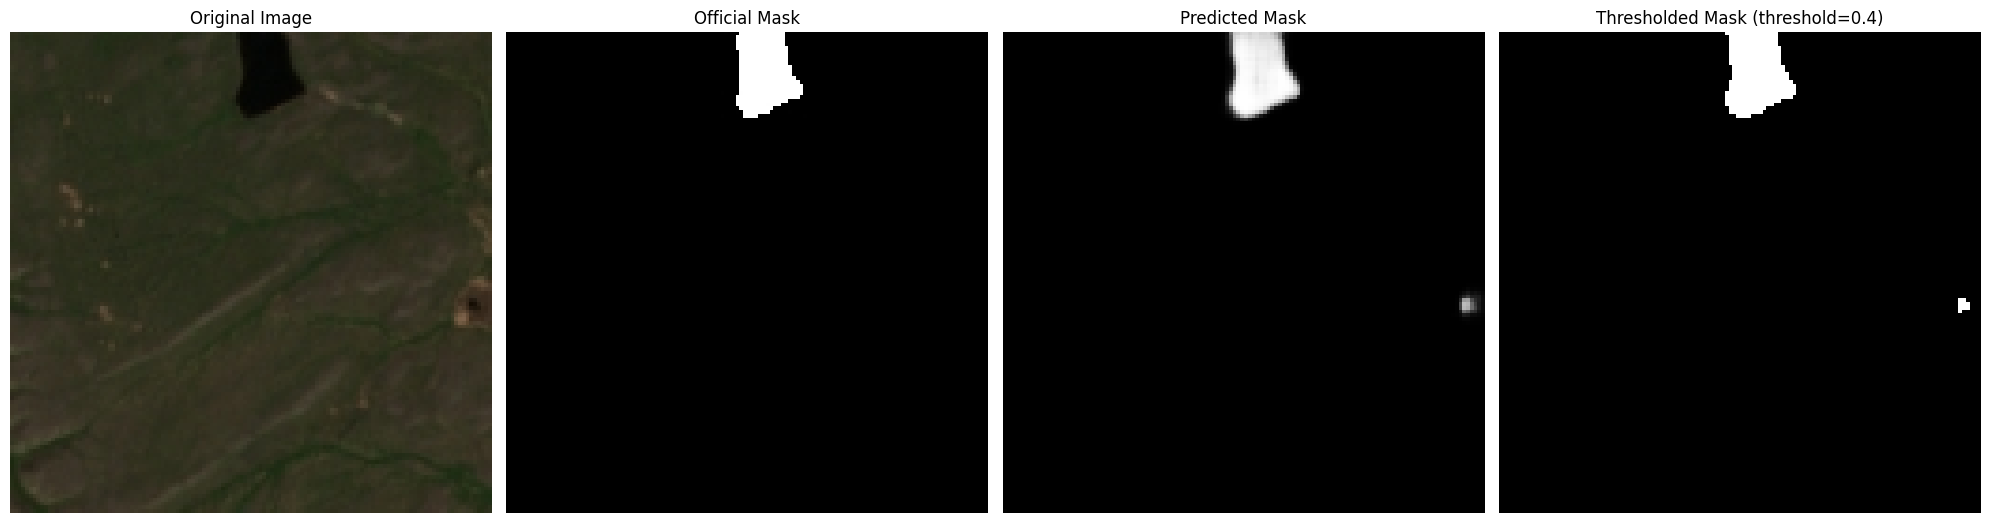

1373_1664_2048.jpg


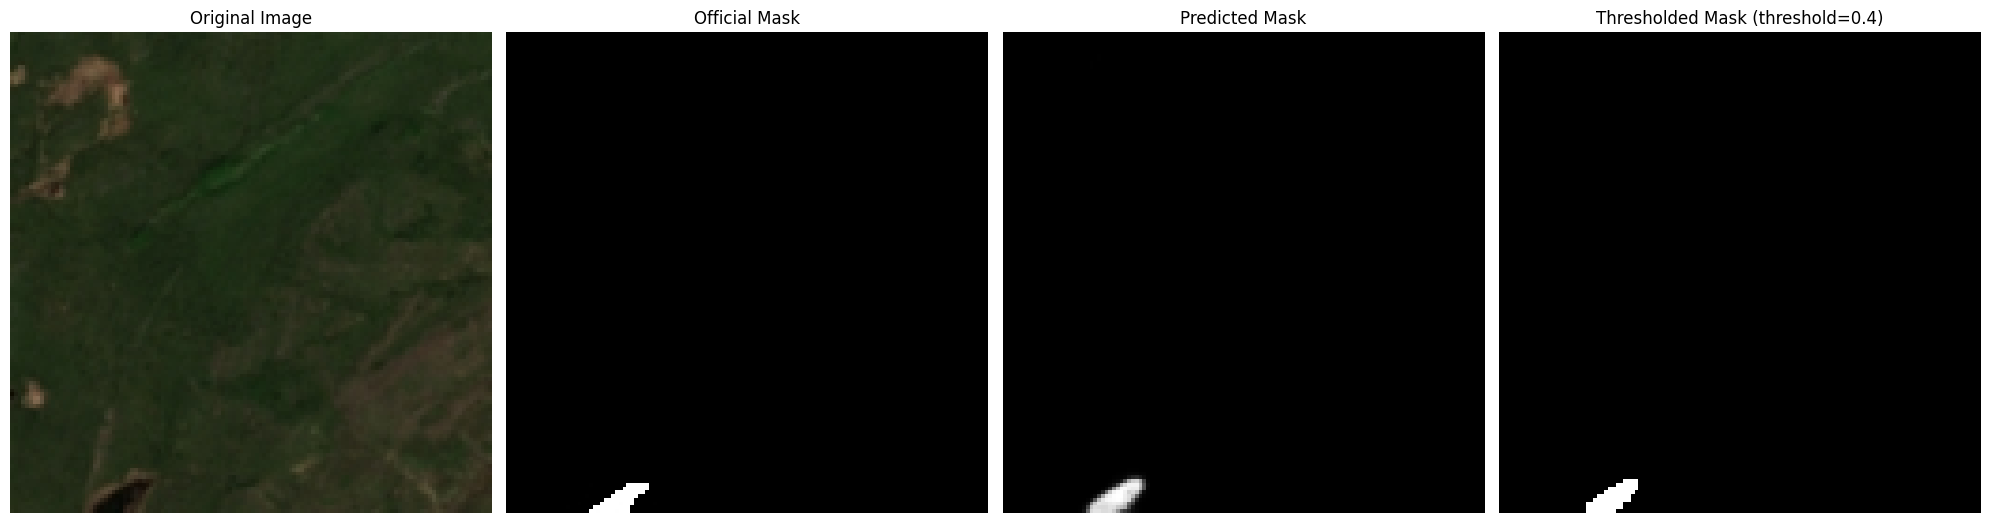

1379_2432_2048.jpg


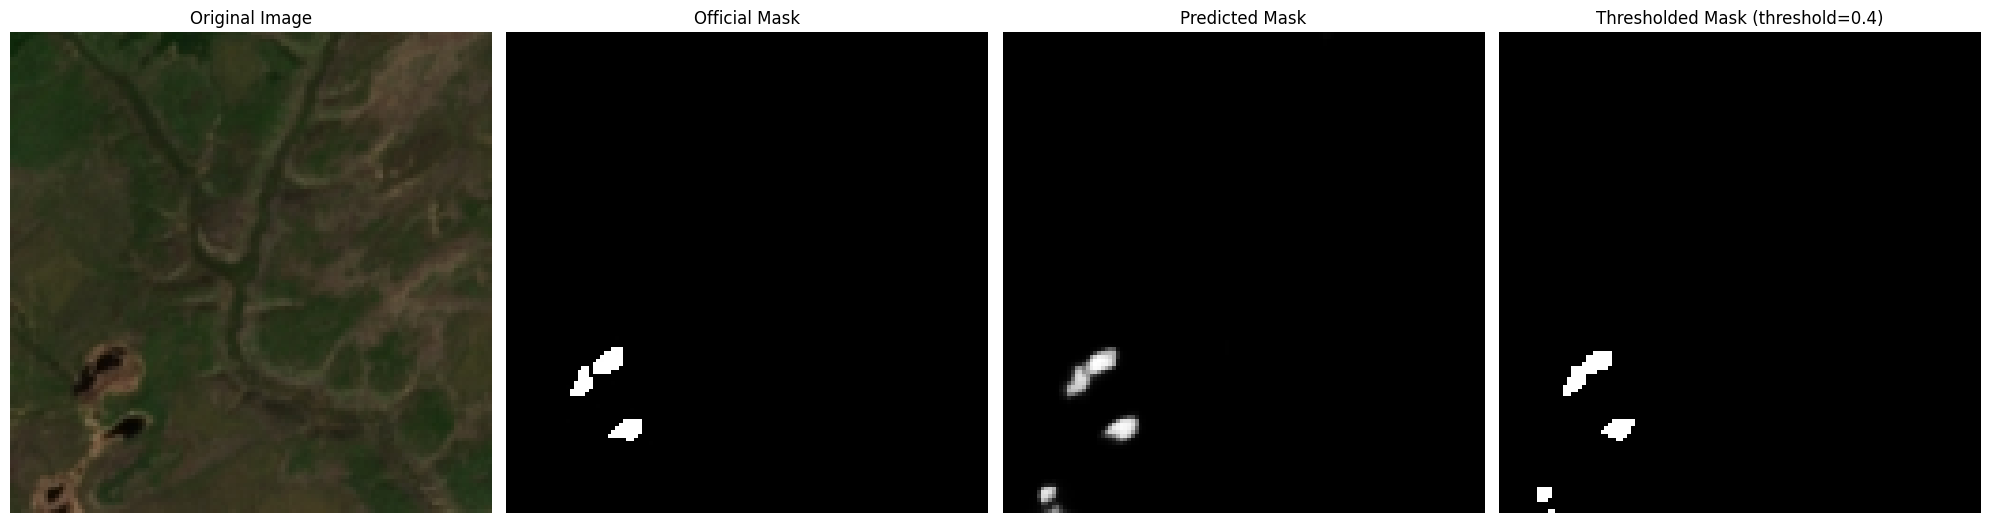

1388_3584_2048.jpg


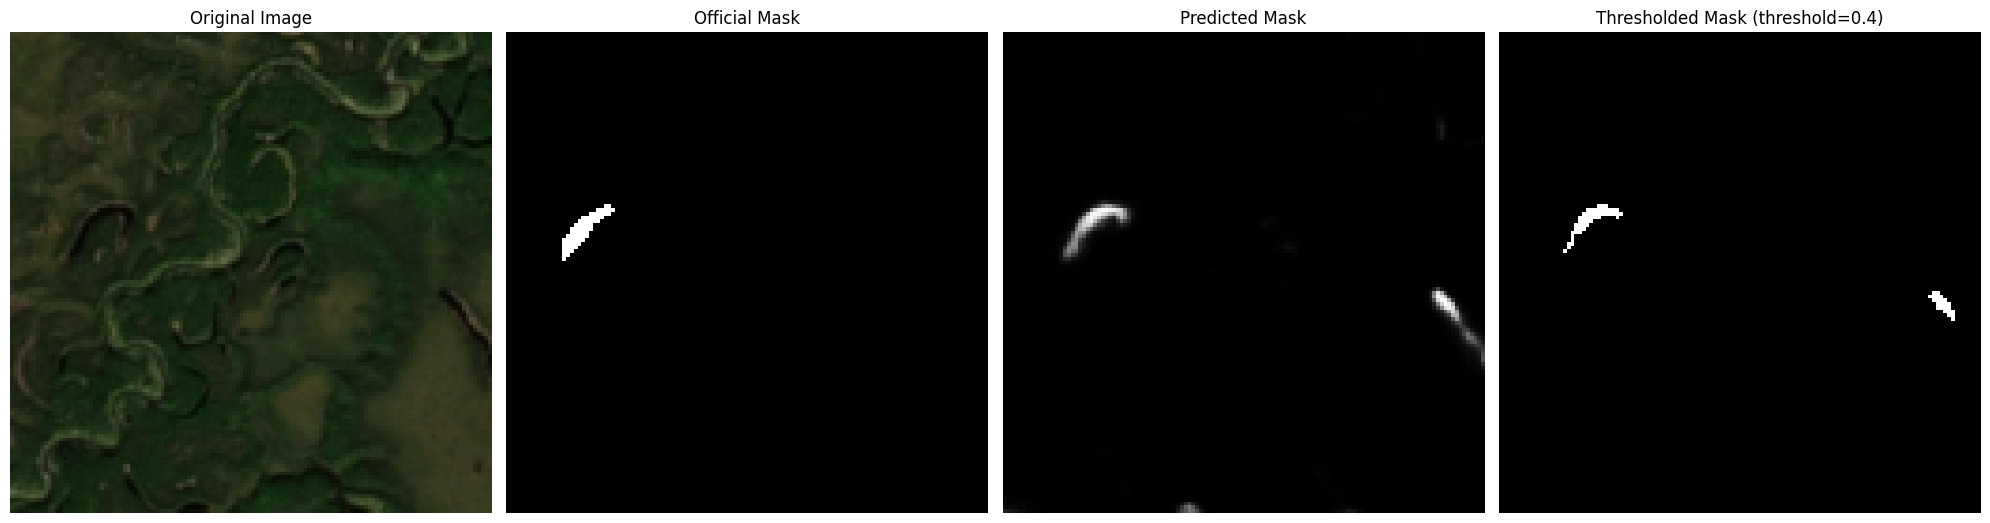

1390_3840_2048.jpg


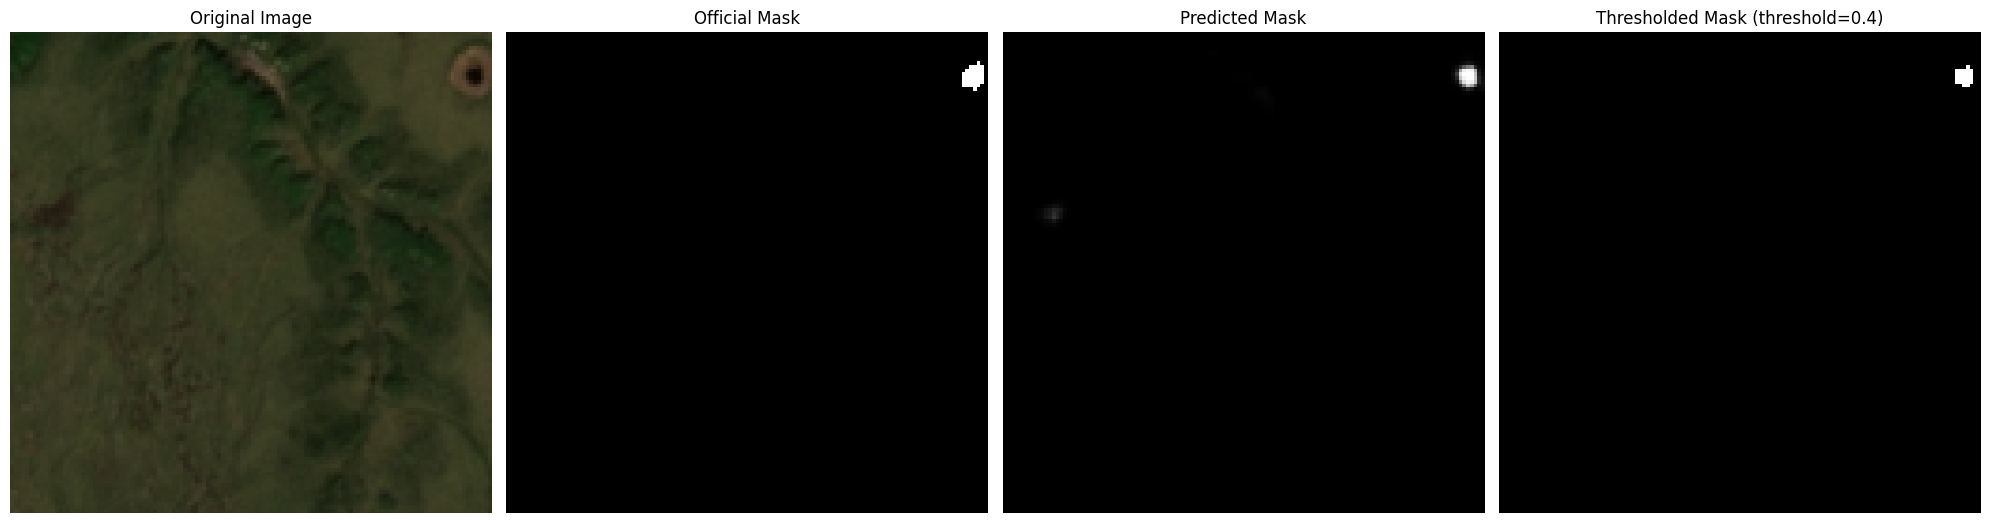

1435_9600_2048.jpg


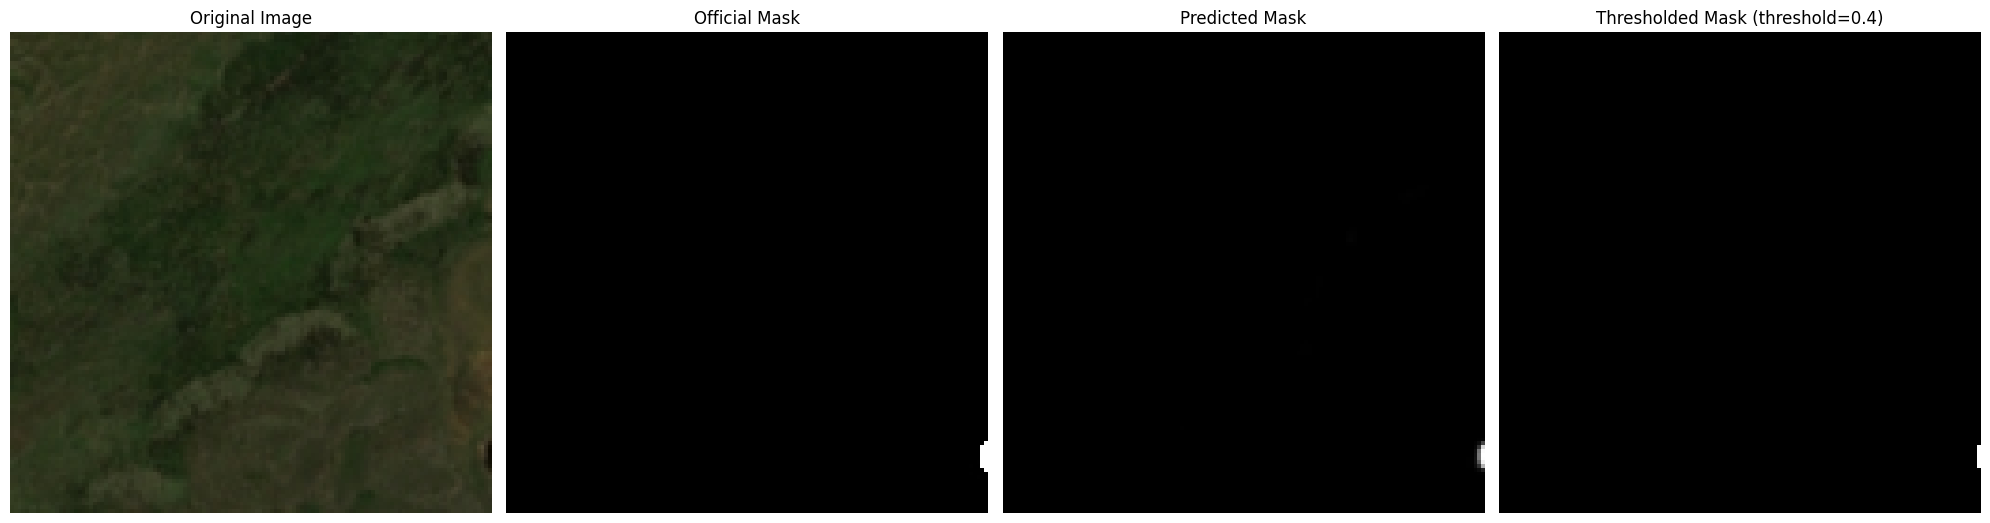

1464_2432_2176.jpg


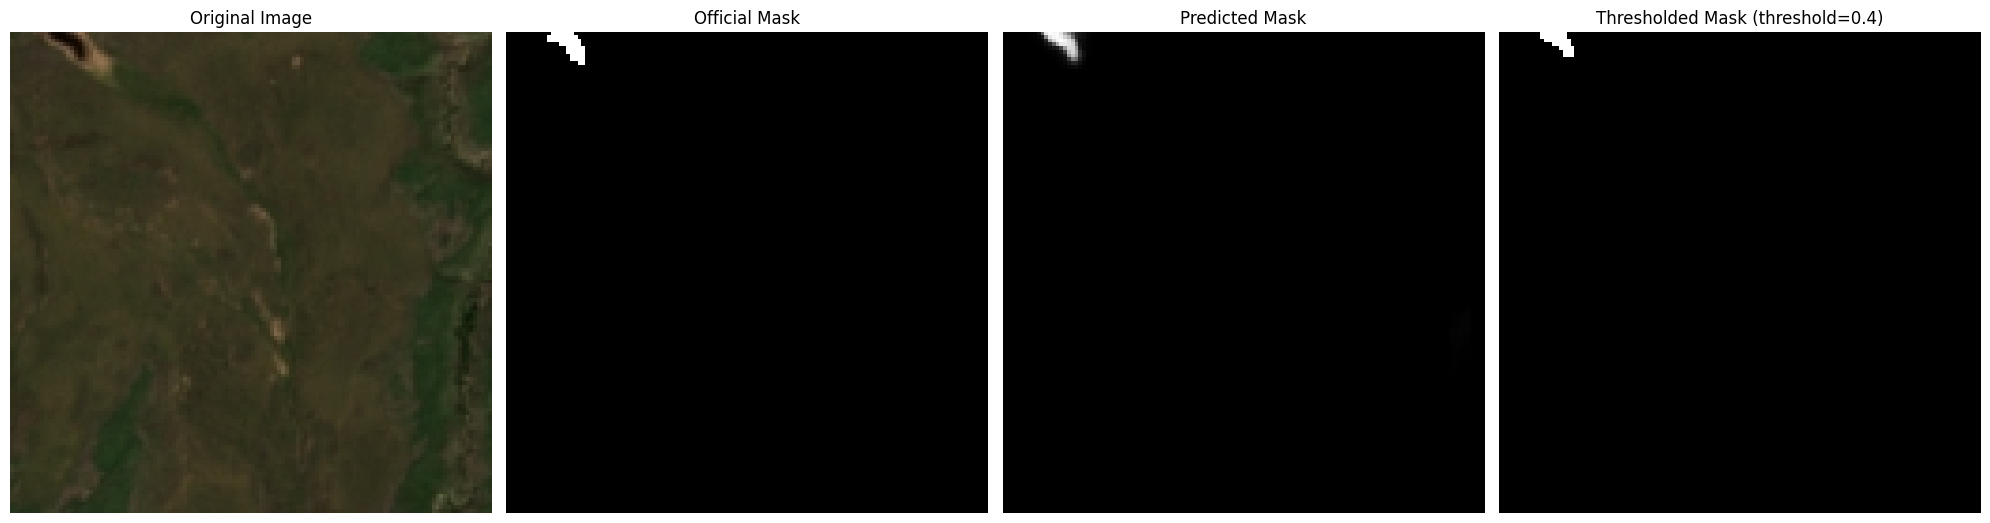

1495_6400_2176.jpg


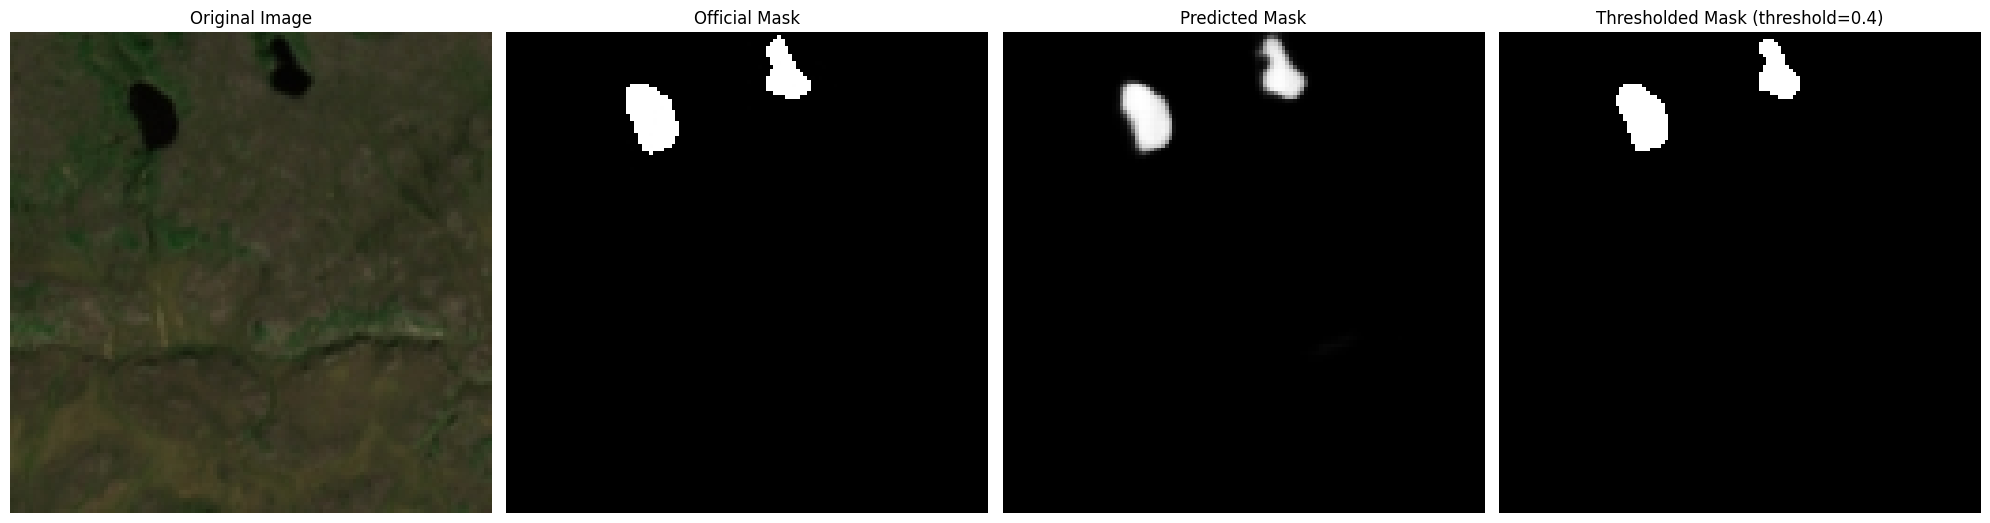

153_8704_128.jpg


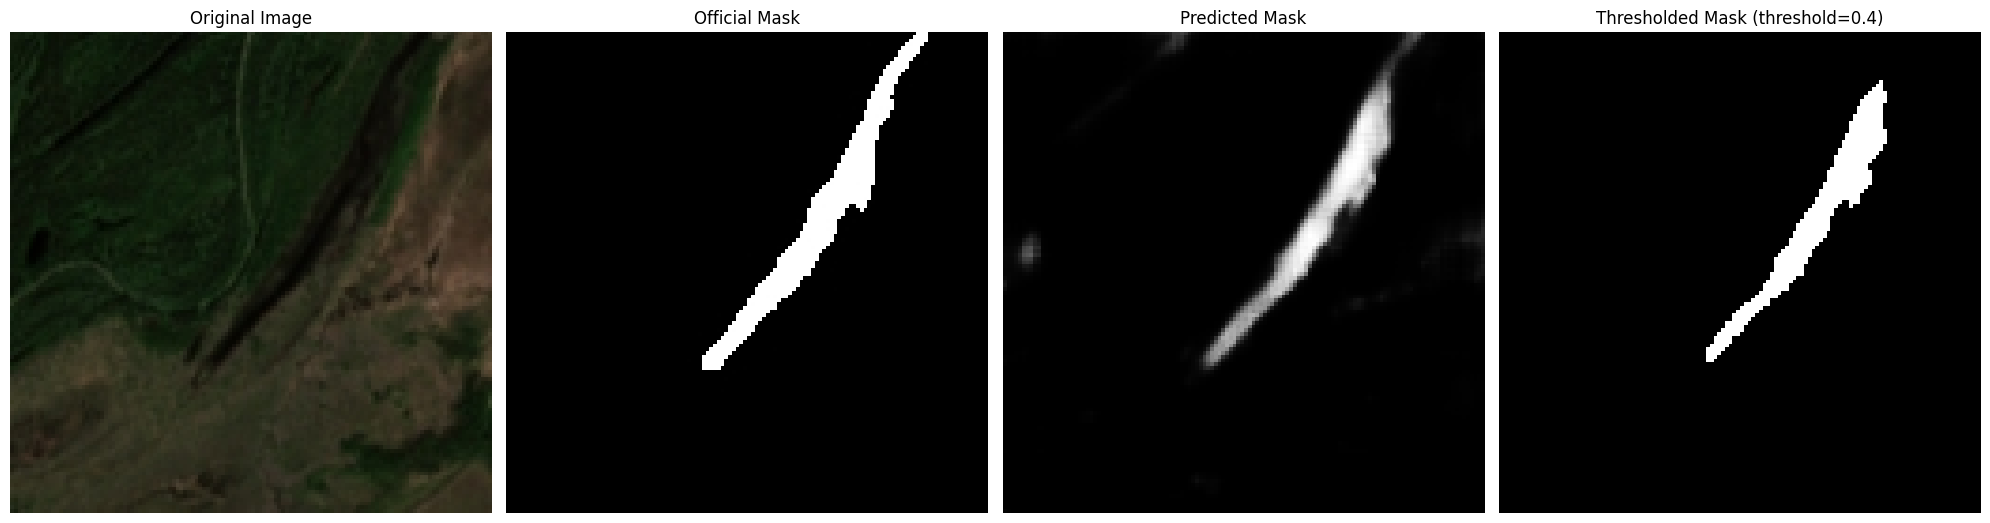

1272_10496_1792.jpg


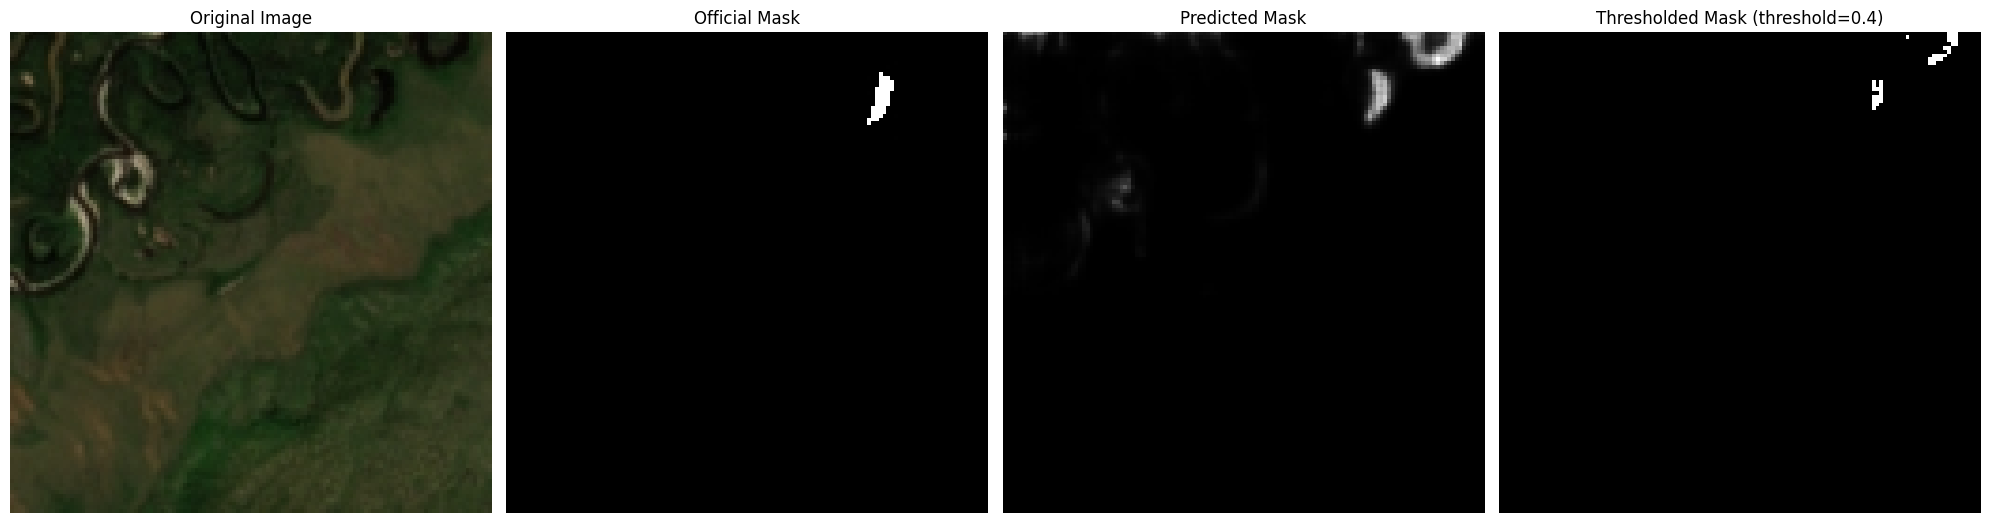

1593_8064_2304.jpg


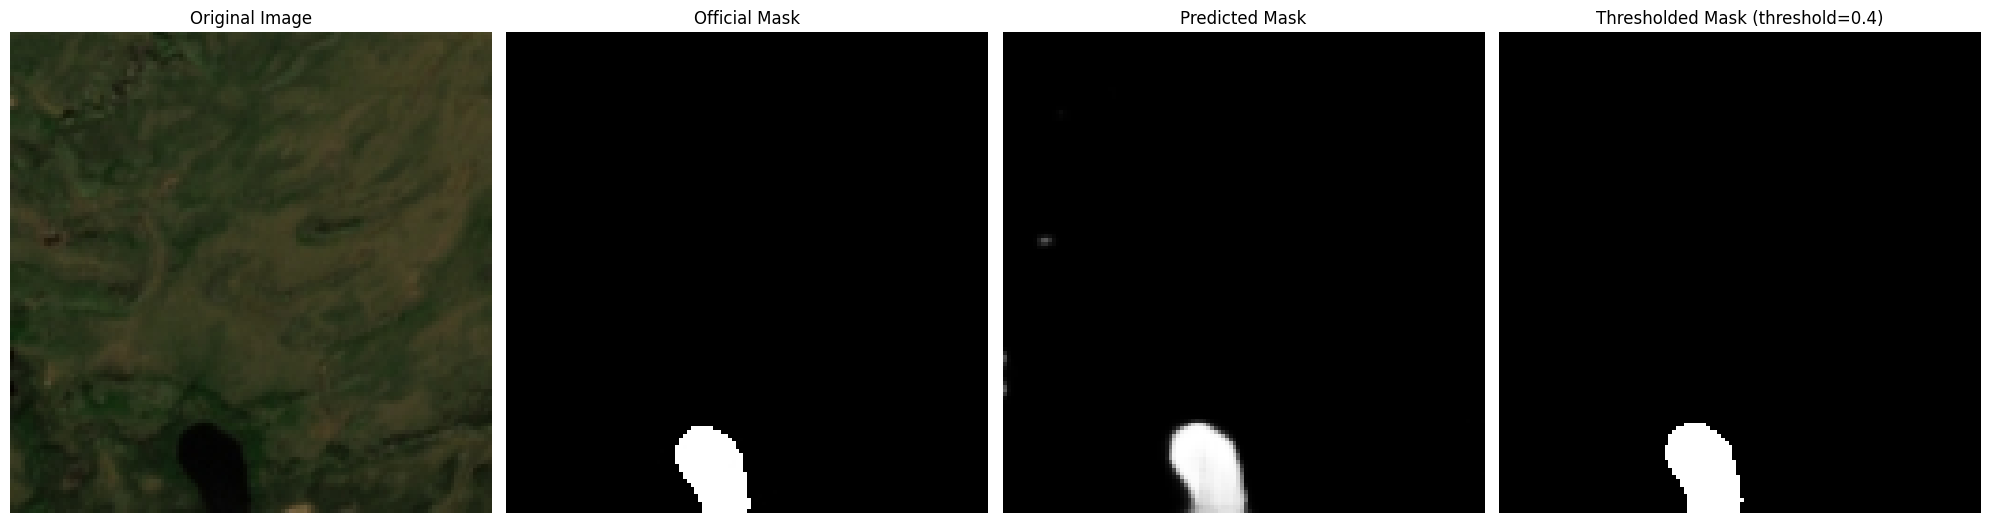

42_5376_0.jpg


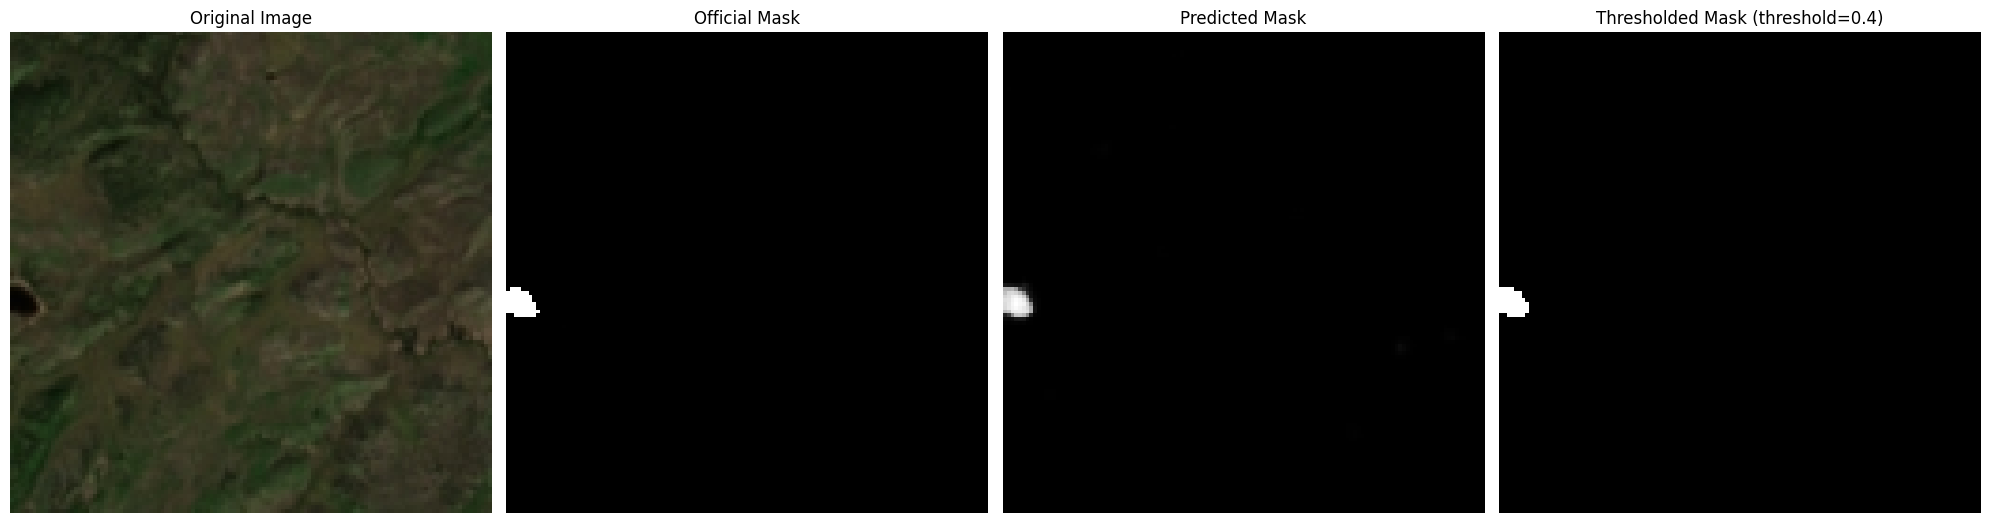

606_1408_896.jpg


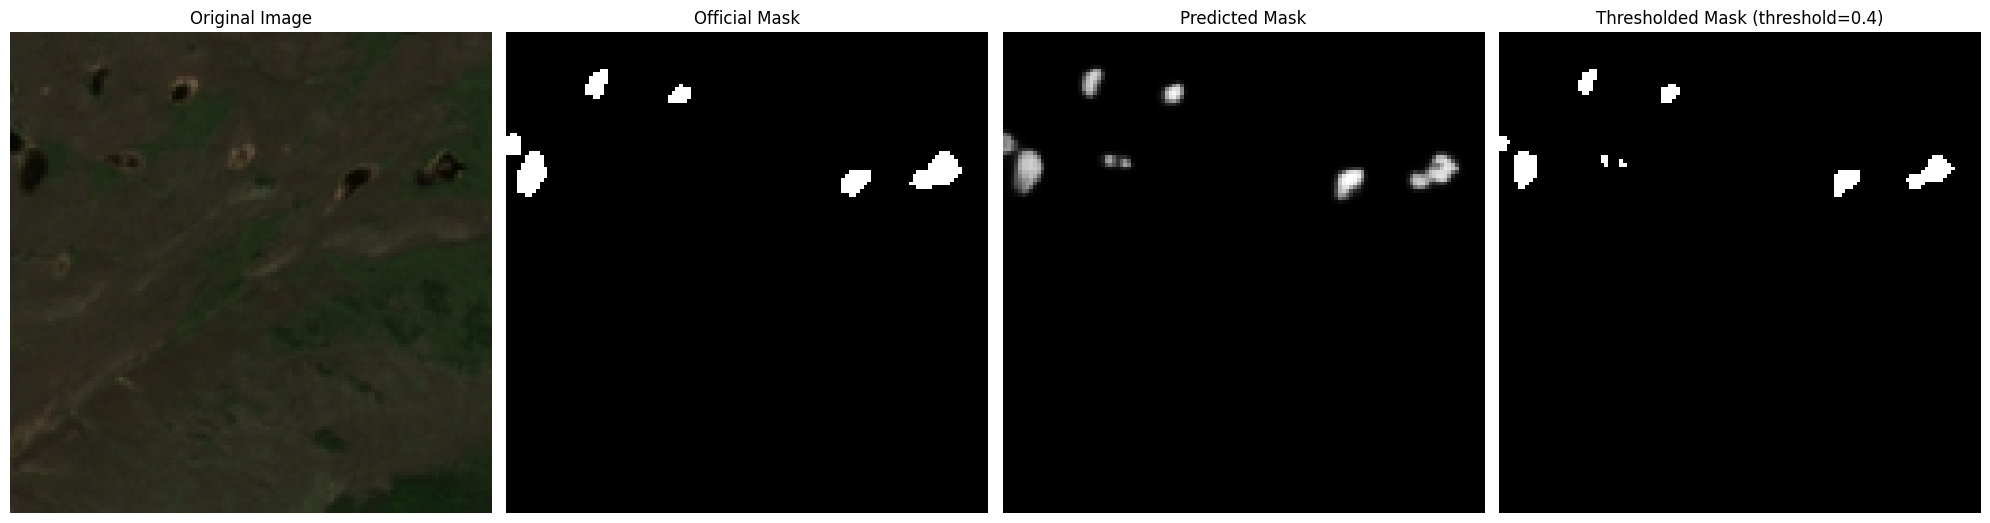

15_1920_0.jpg


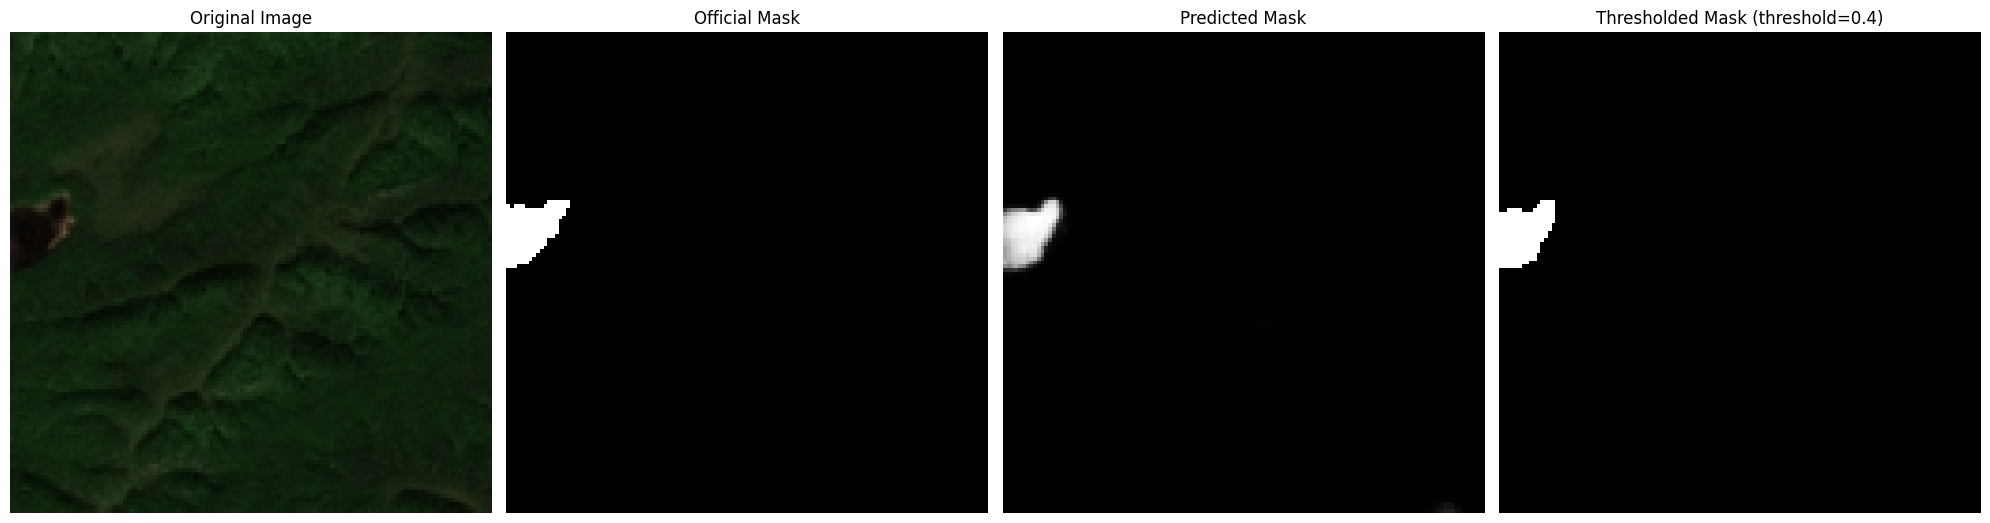

1663_6144_2432.jpg


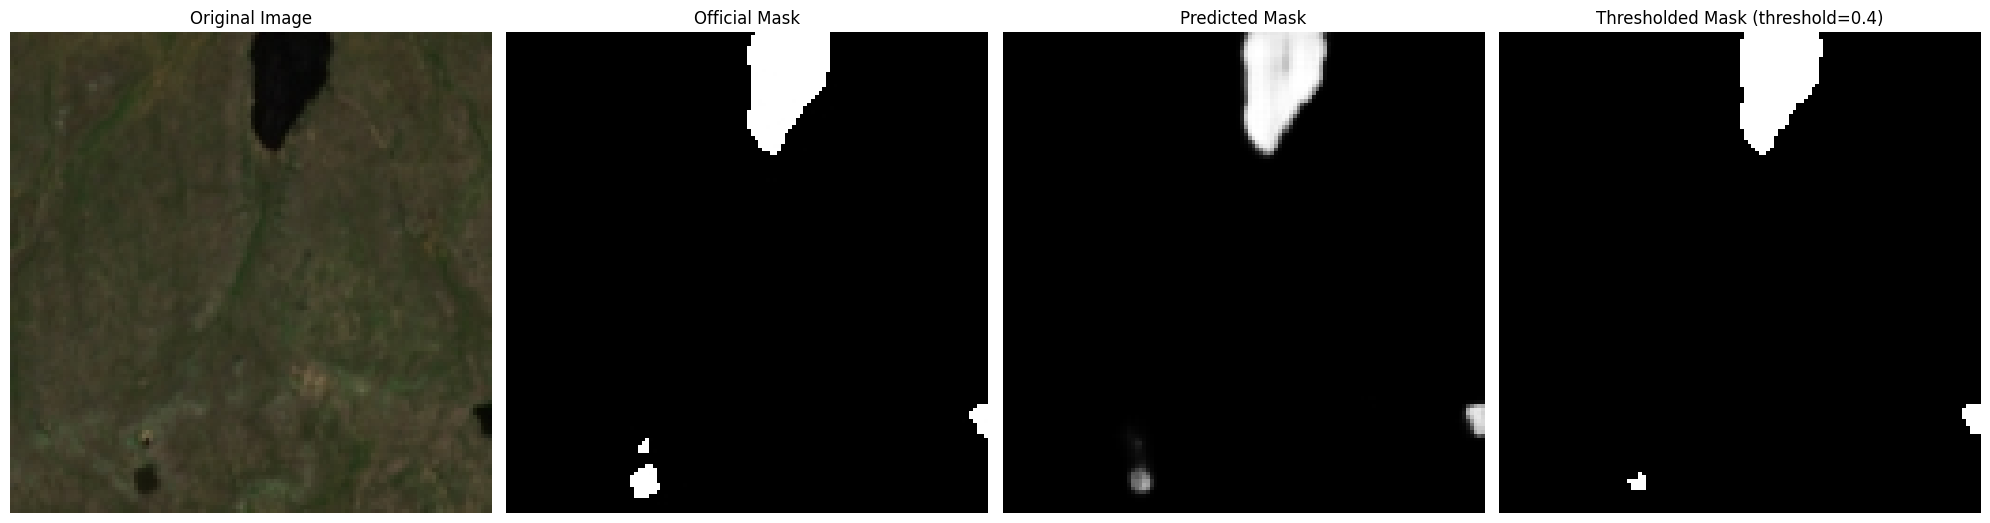

1691_9728_2432.jpg


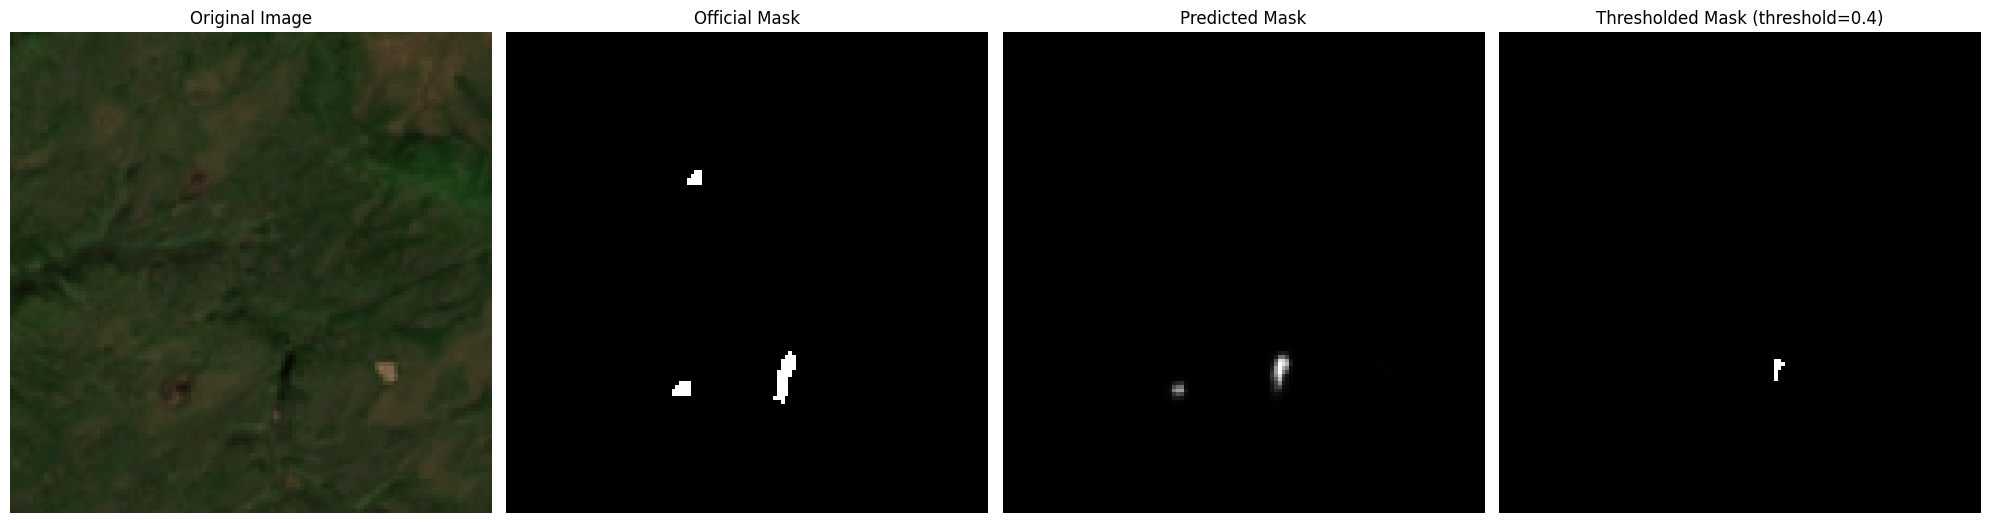

1694_10112_2432.jpg


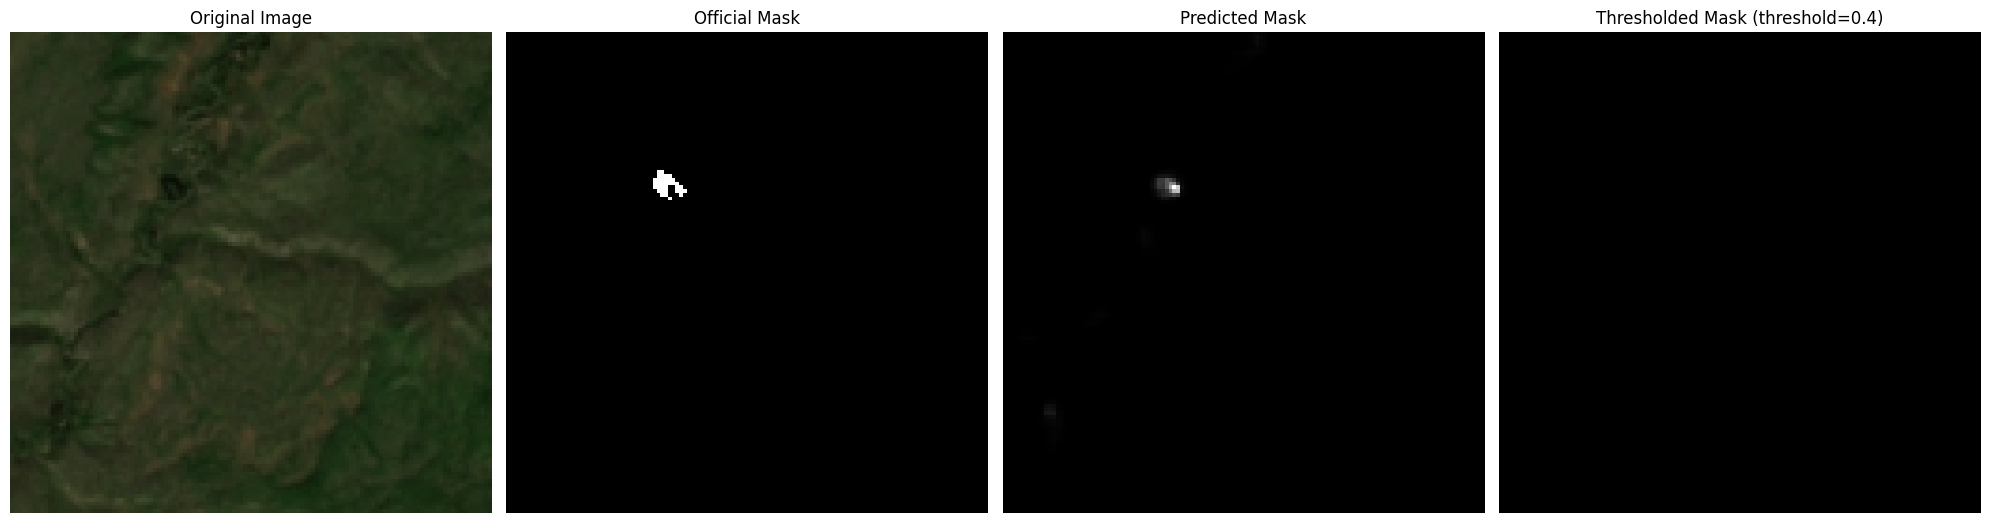

1705_640_2560.jpg


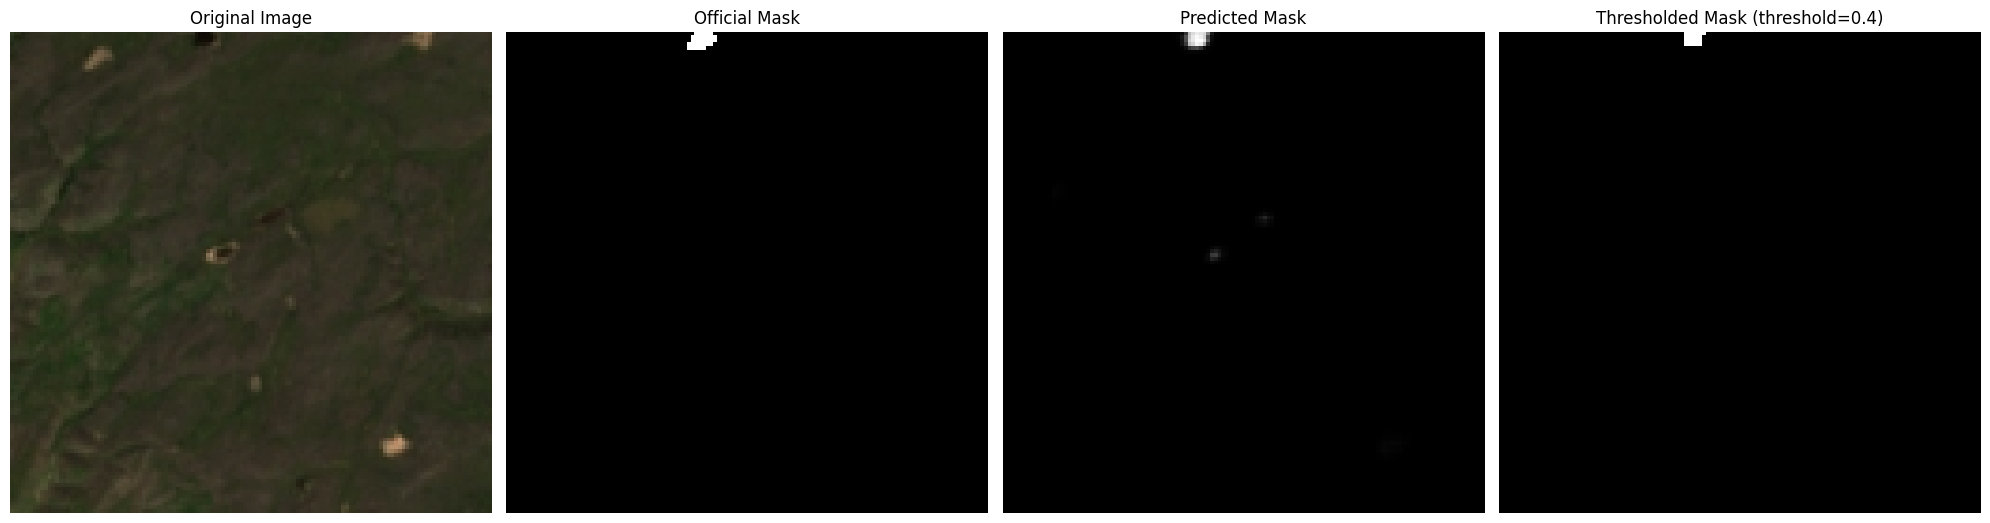

170_0_256.jpg


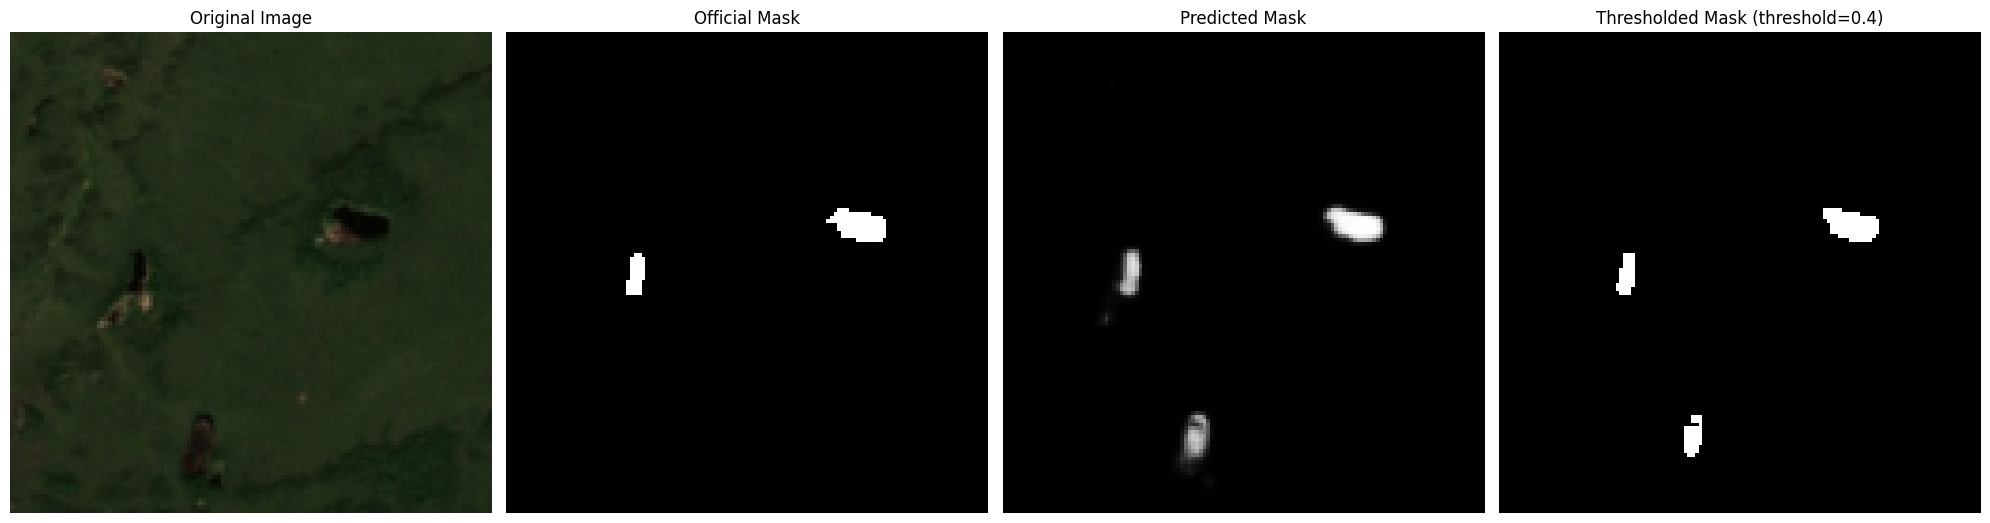

172_256_256.jpg


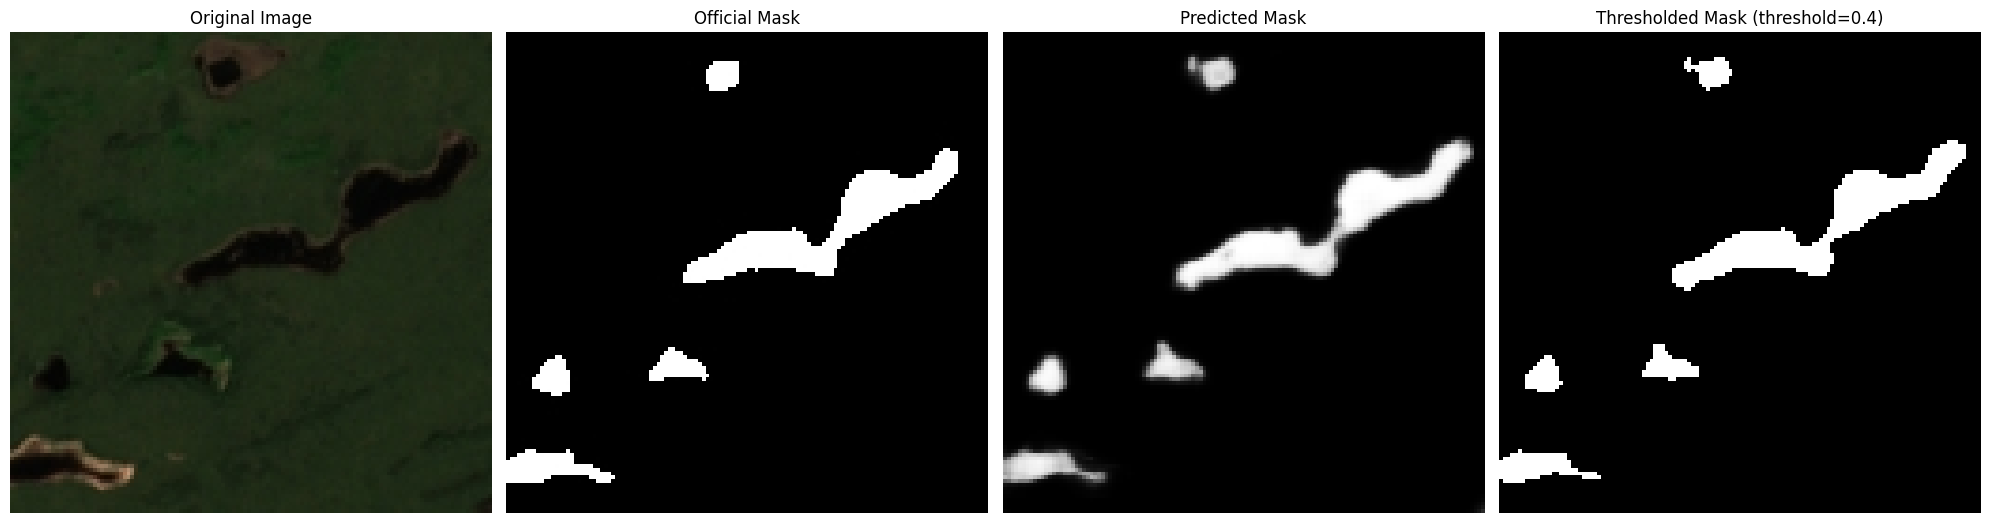

1762_7936_2560.jpg


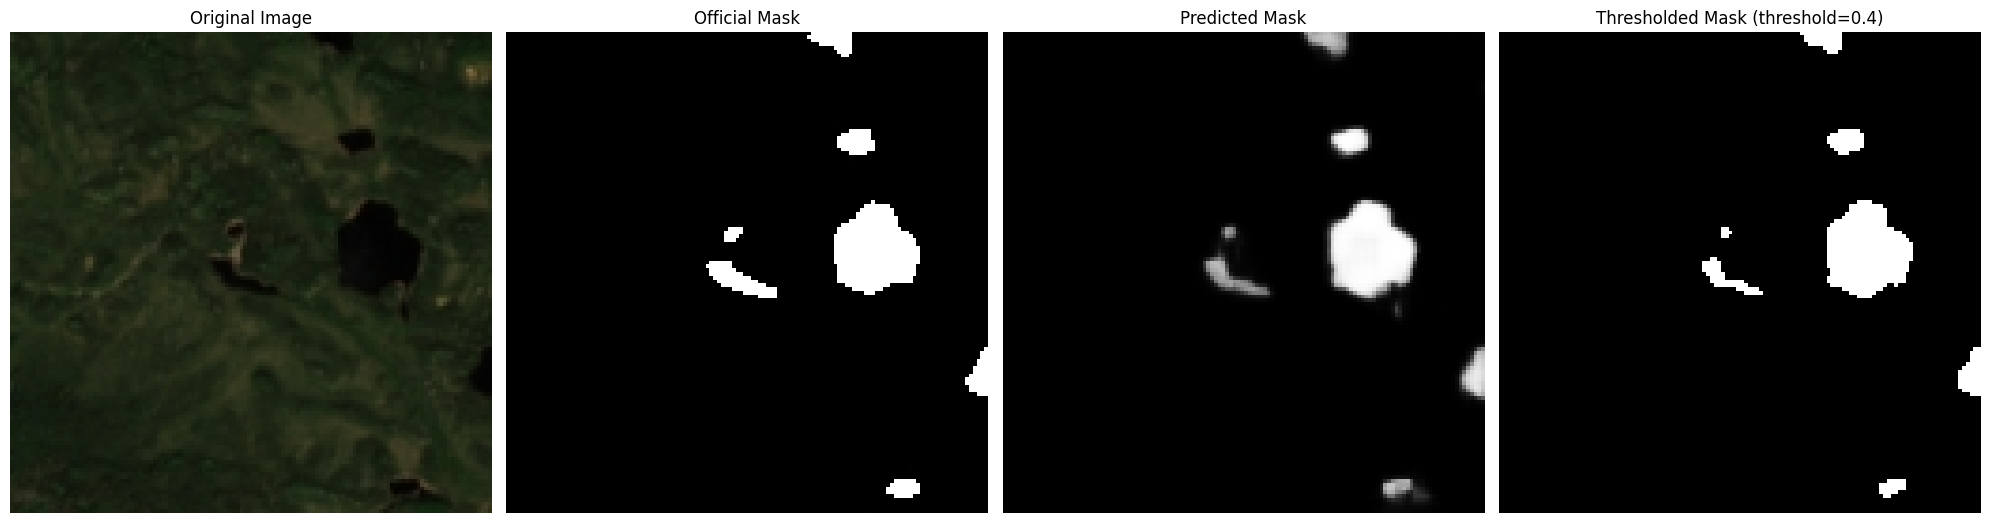

1793_1024_2688.jpg


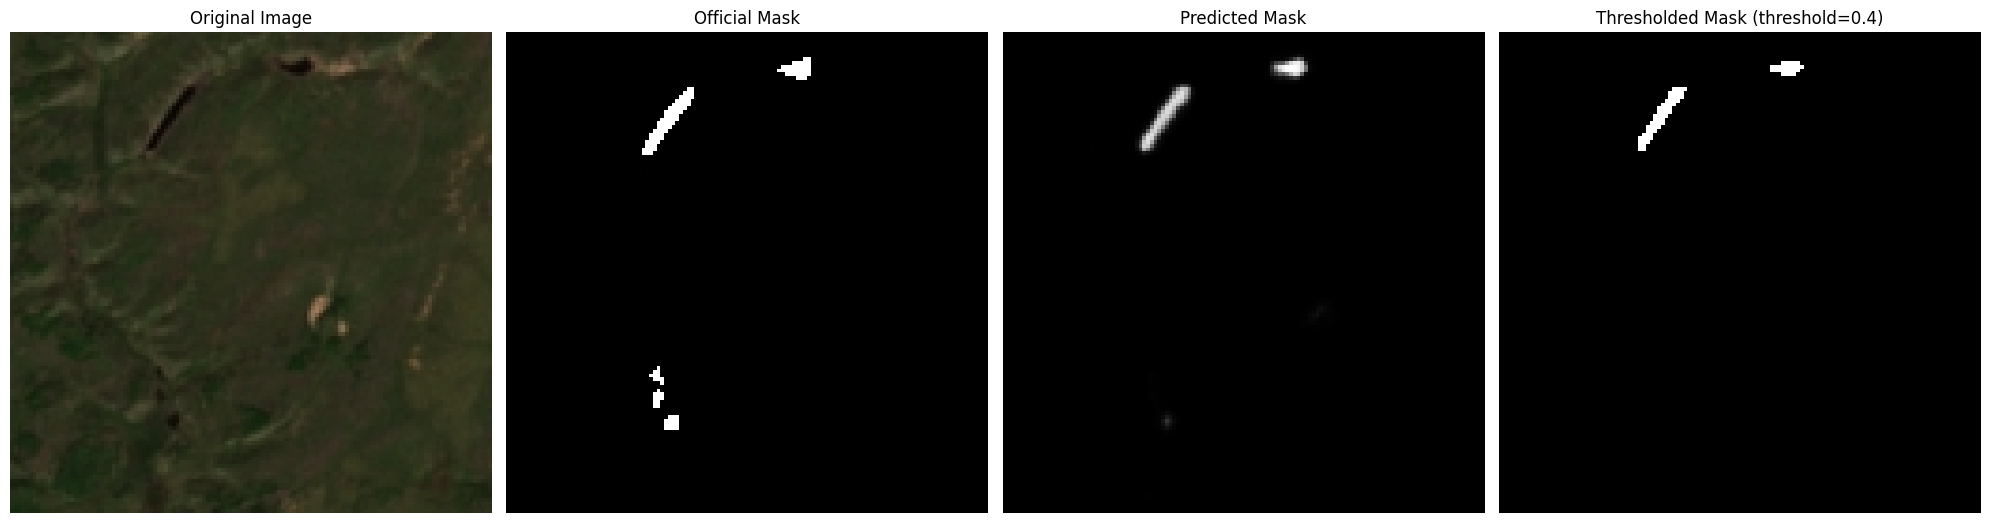

198_3584_256.jpg


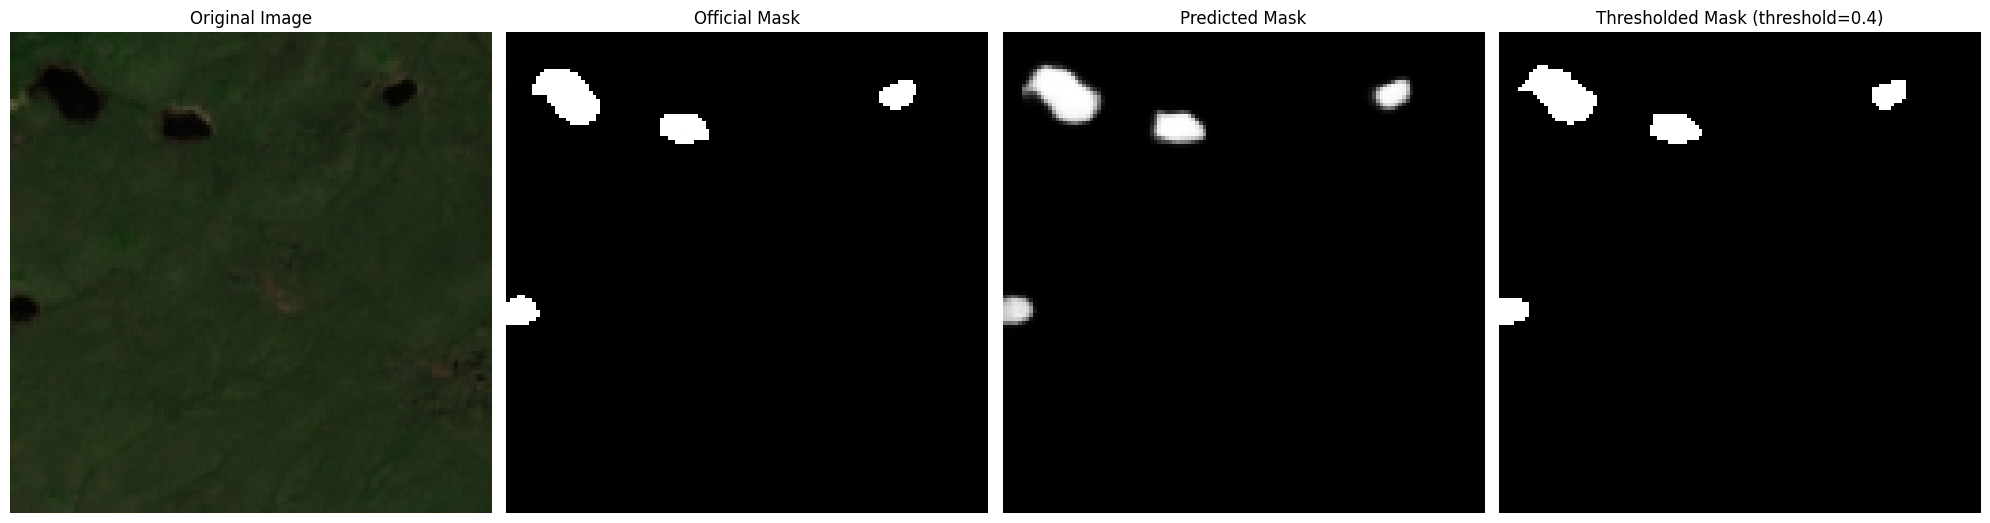

200_3840_256.jpg


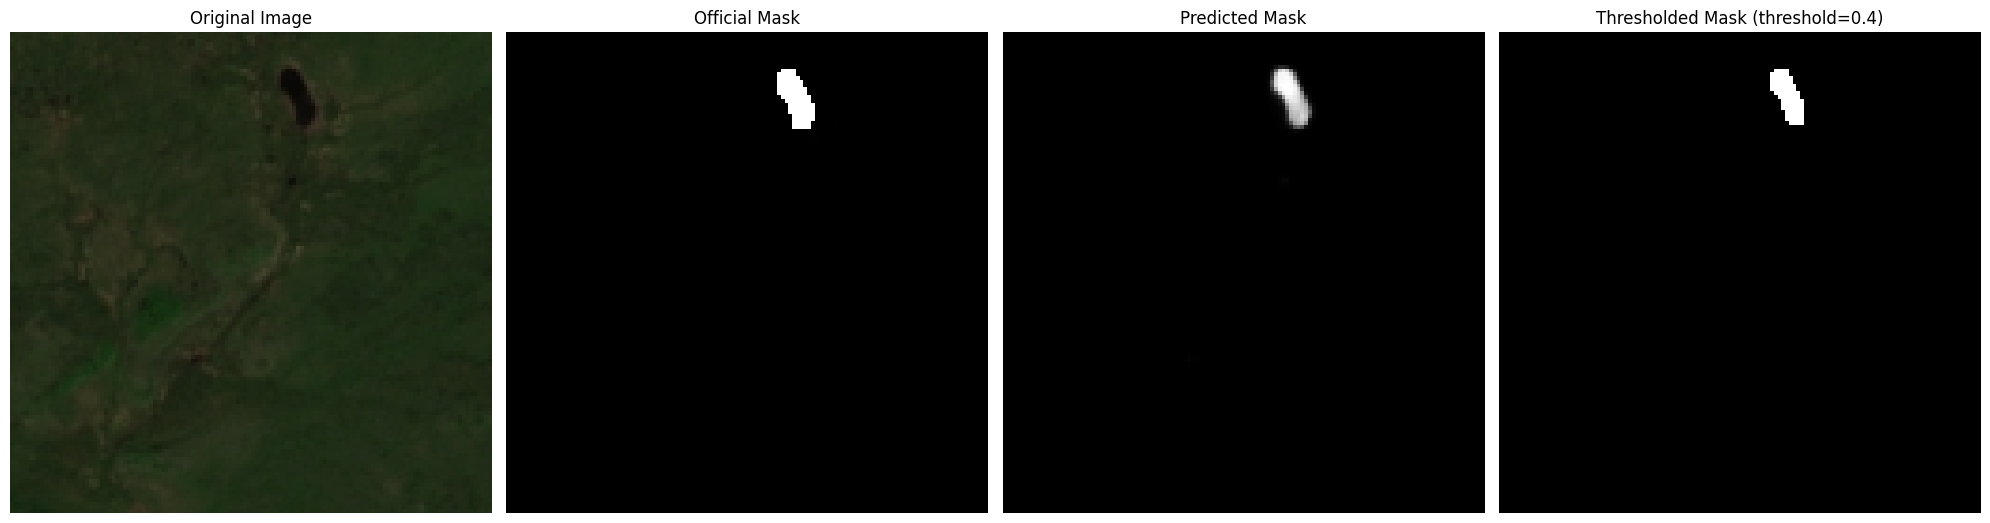

2_256_0.jpg


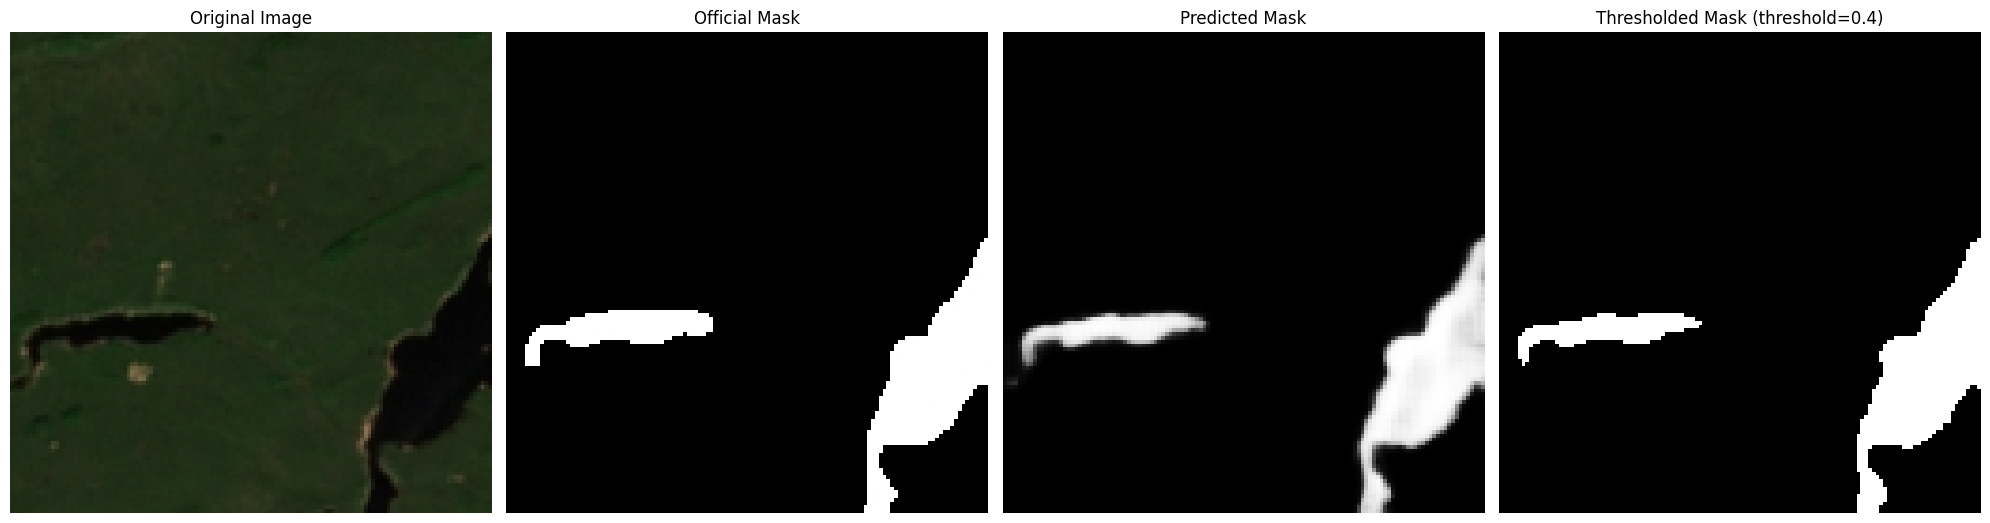

31_3968_0.jpg


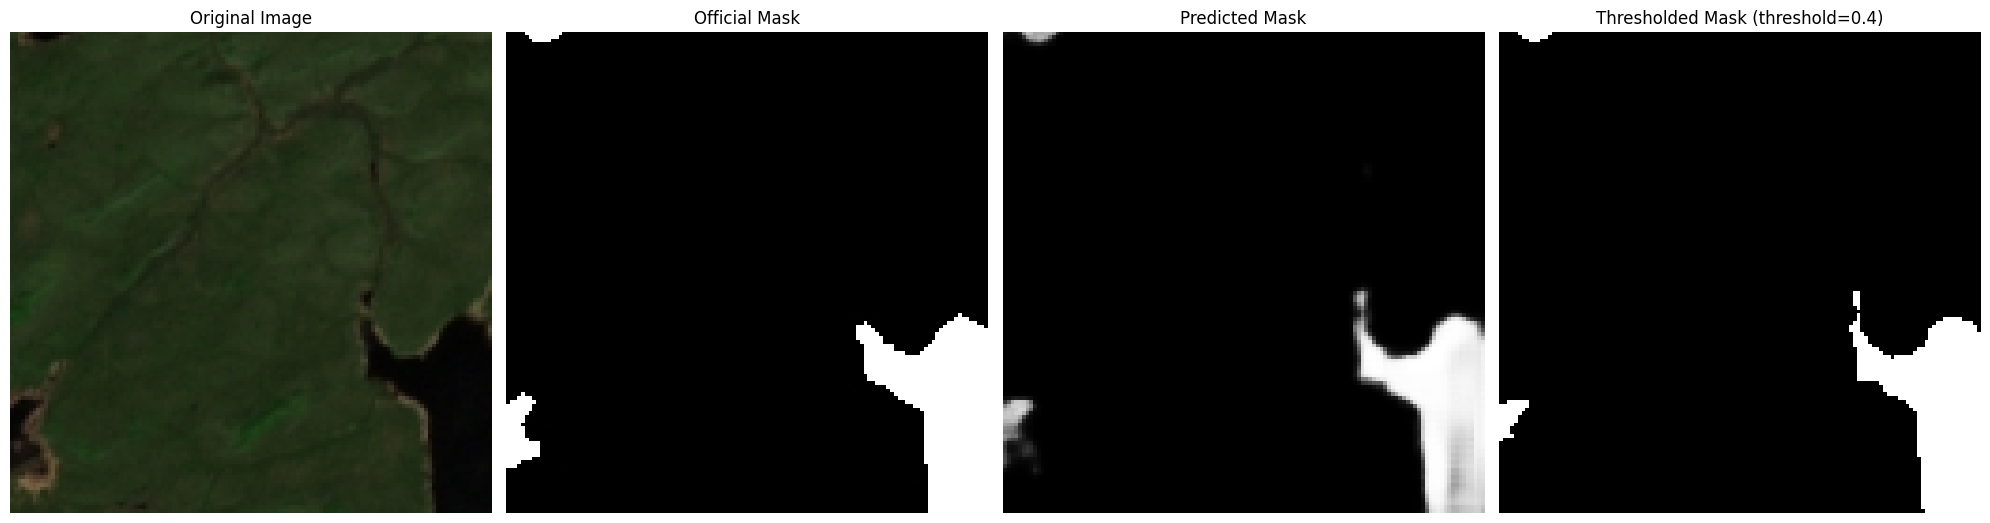

349_1152_512.jpg


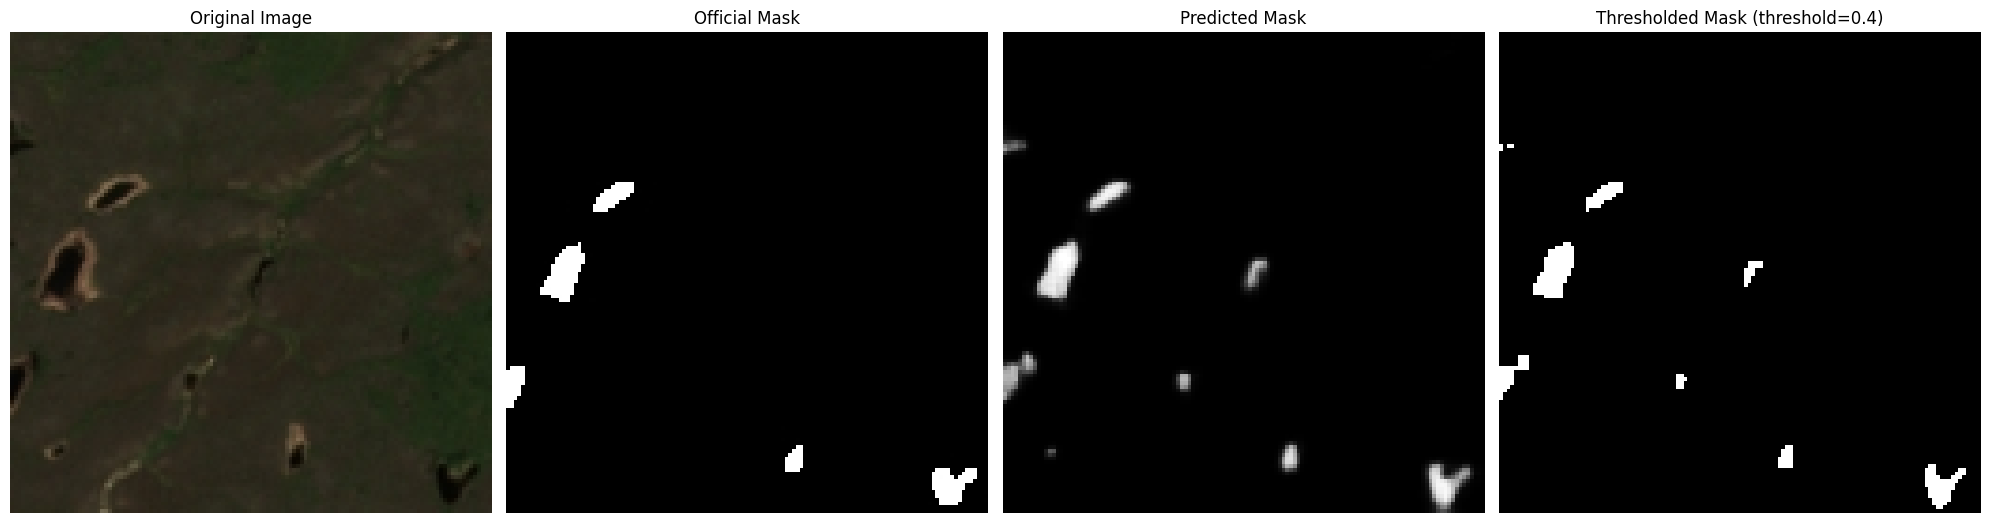

355_1920_512.jpg


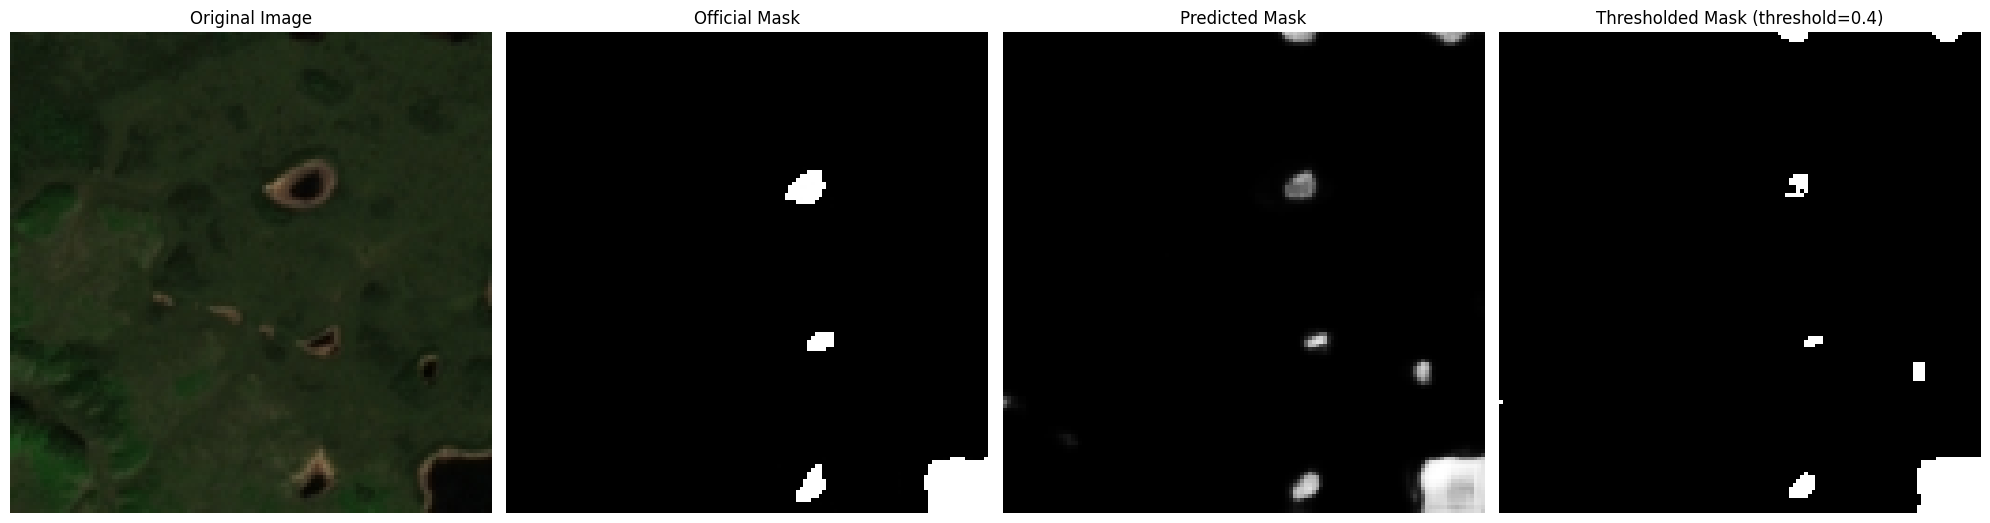

363_2944_512.jpg


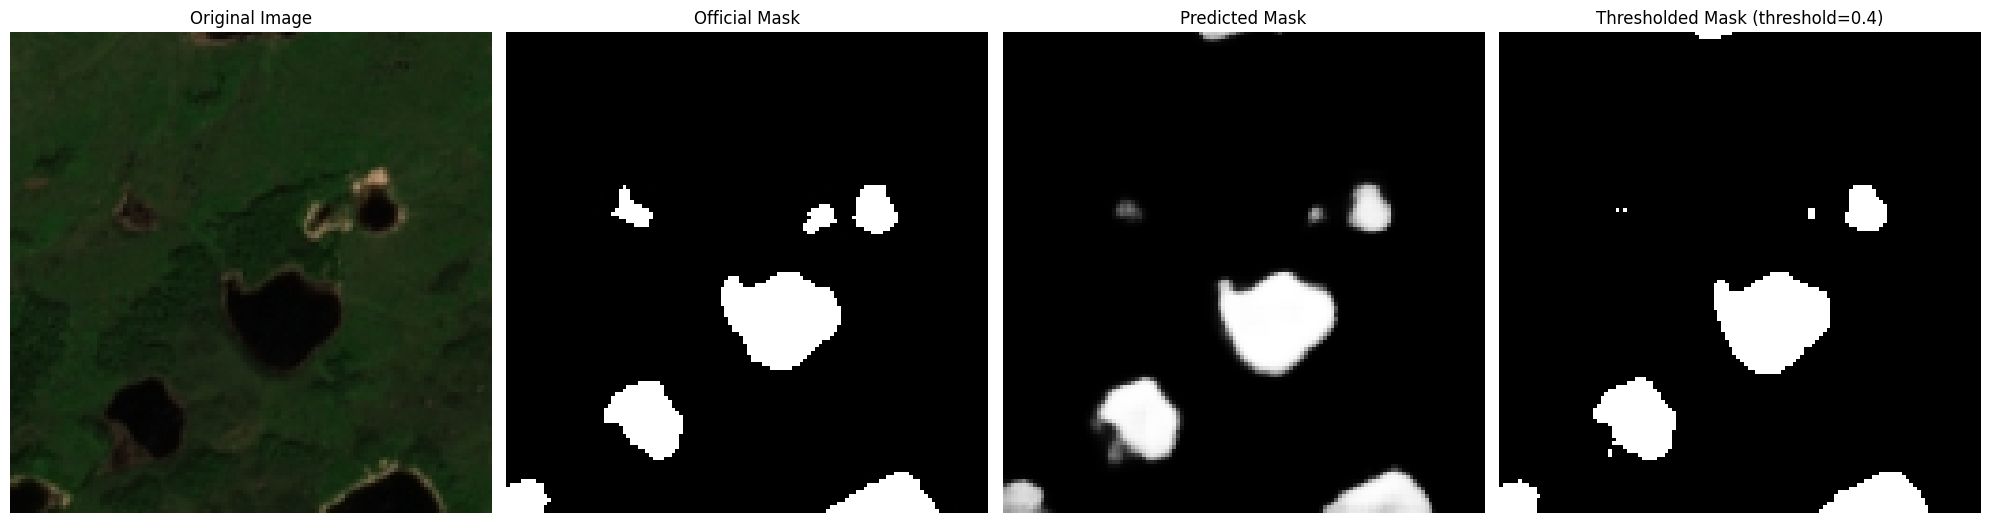

367_3456_512.jpg


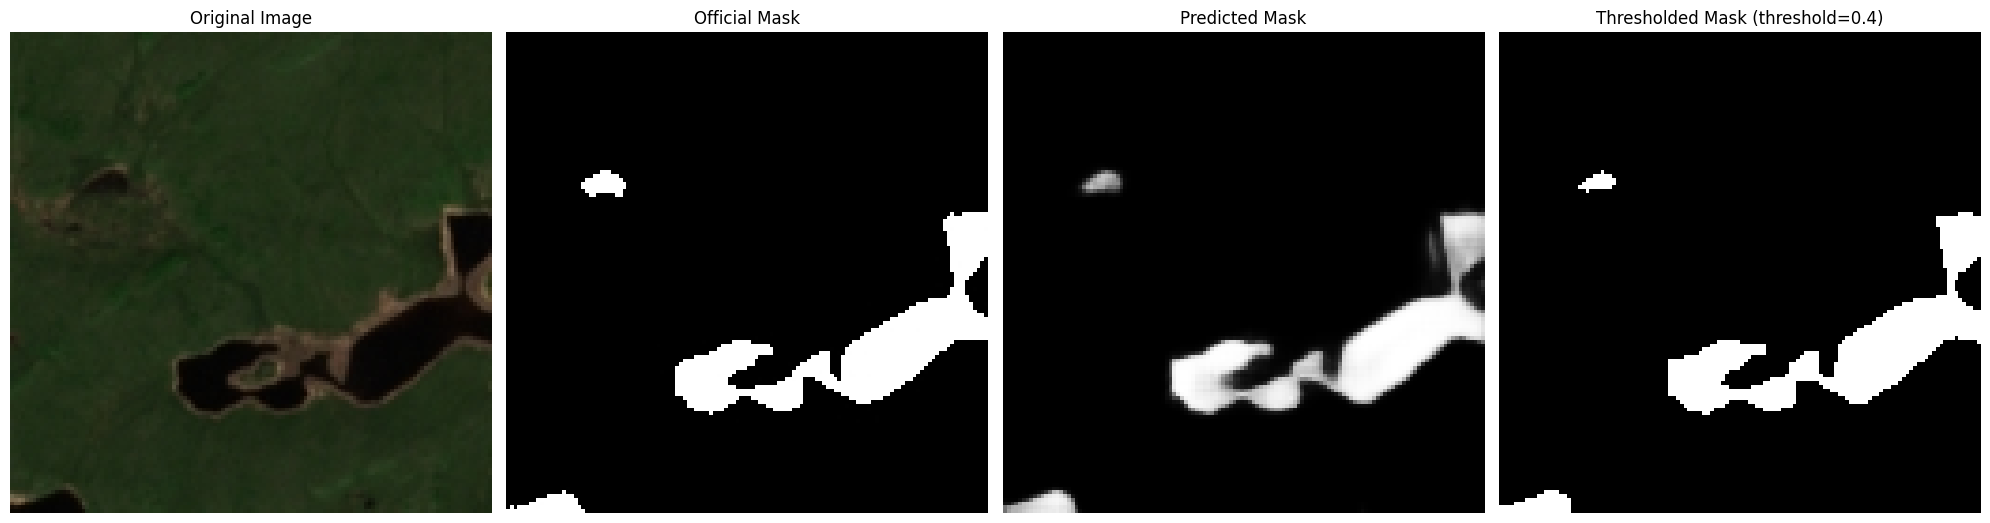

36_4608_0.jpg


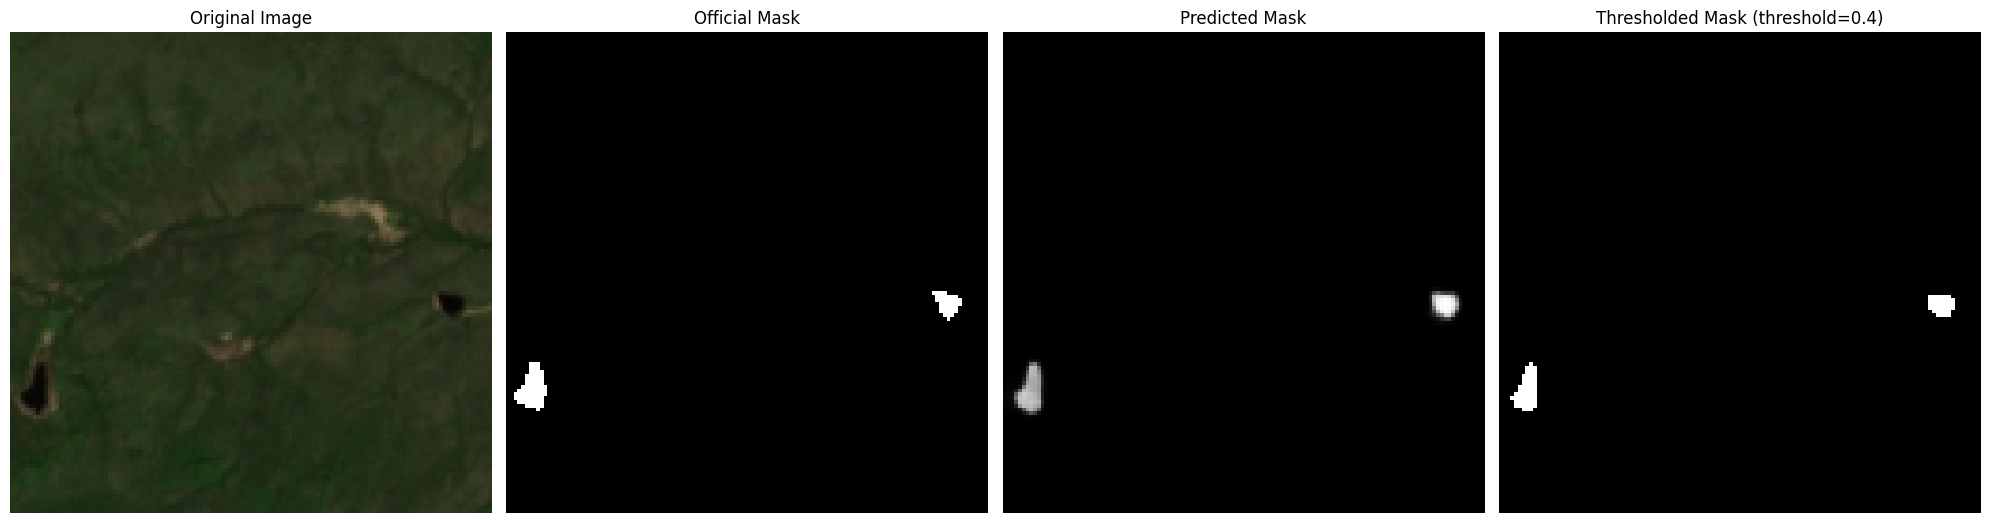

386_5888_512.jpg


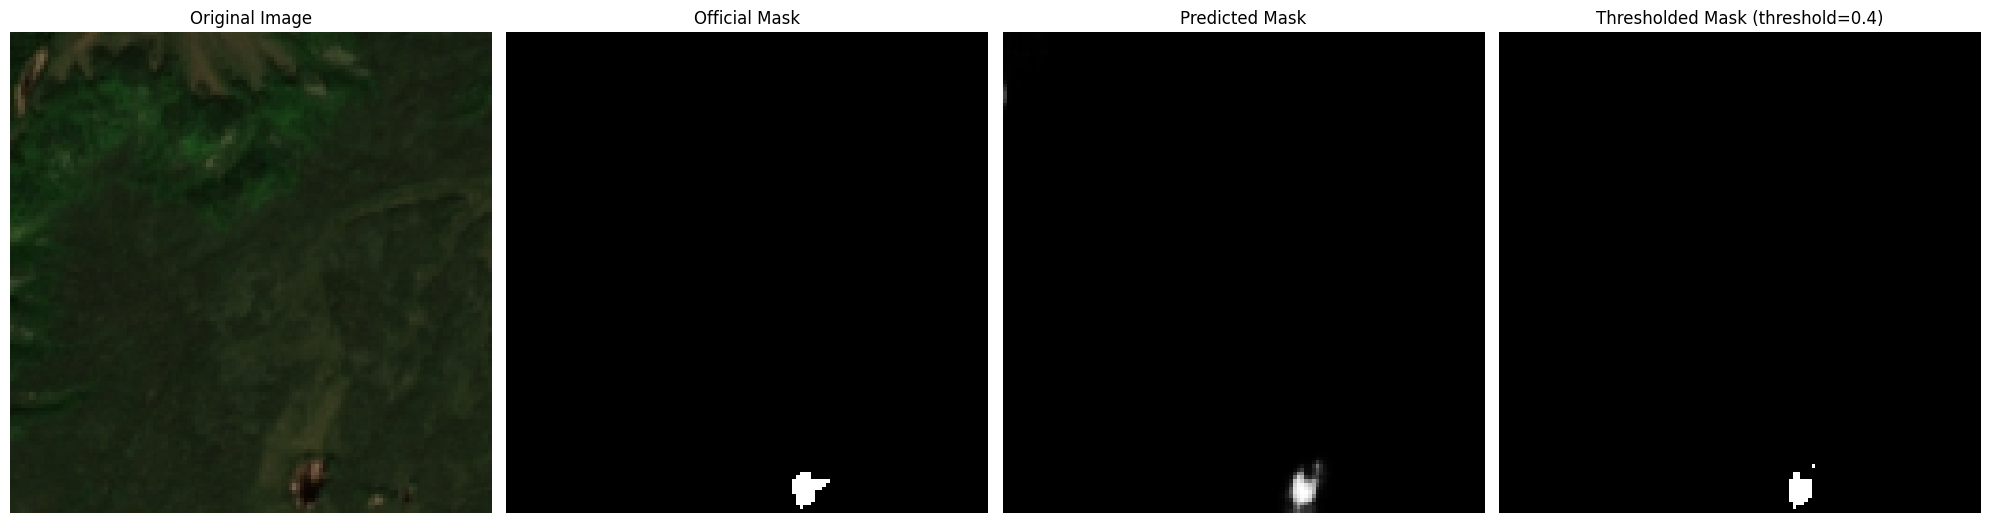

429_512_640.jpg


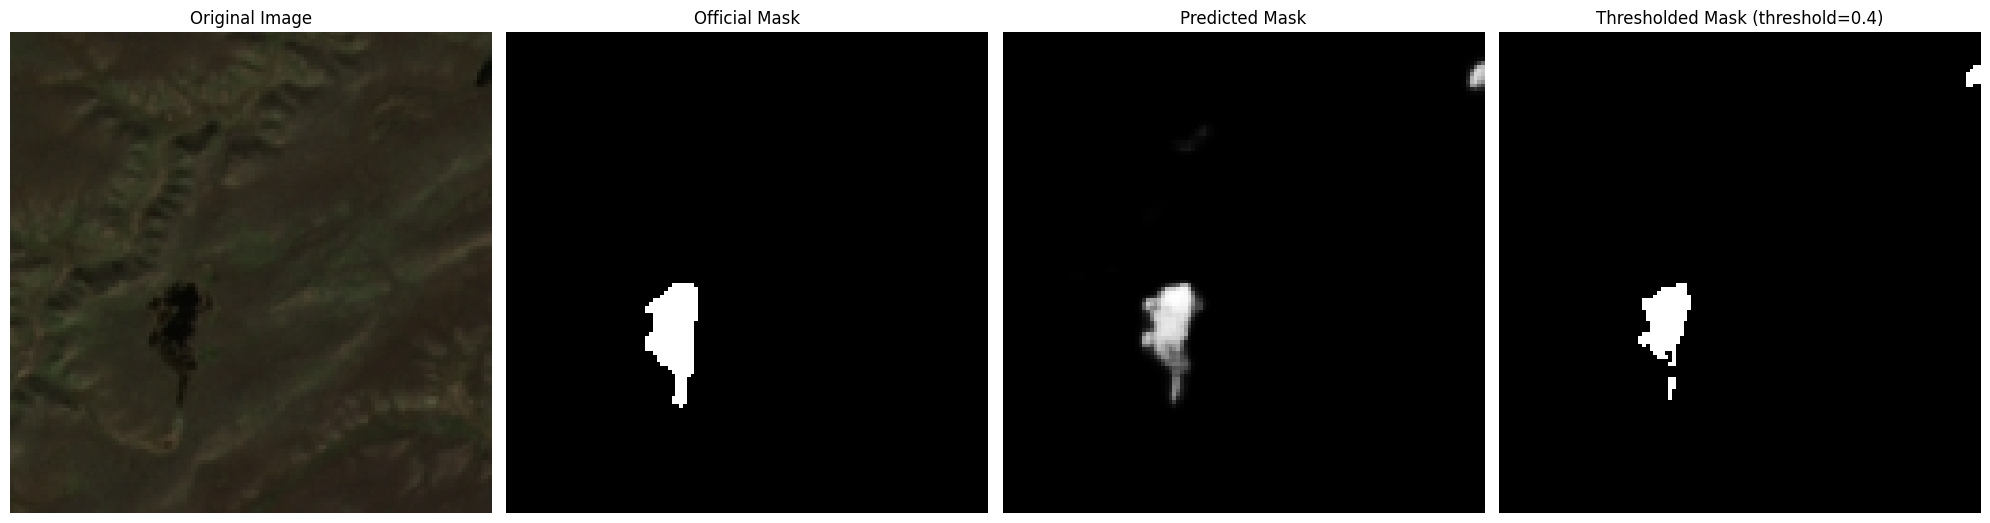

Average accuracy: 0.9938


In [18]:

# Load the model
model = load_model(model_path)

# Get list of images
image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]

# Initialize lists to store accuracy scores
accuracies = []

# Loop through images and masks
for image_file in image_files:
    print(image_file)
    # Load image and mask
    image_path = os.path.join(image_dir, image_file)
    mask_path = os.path.join(mask_dir, image_file)
    
    image = np.asarray(Image.open(image_path).convert('RGB')).astype('float') / 255.
    mask = np.asarray(Image.open(mask_path).convert('L')).astype('float') / 255.
    
    # Predict mask
    tile_batch = np.expand_dims(image, axis=0)
    pred = model.predict(tile_batch, verbose=0)[0]
    
    # Threshold the predicted mask
    threshold_mask = pred > THRESHOLD
    
    # Threshold the official mask
    threshold_official_mask = mask > THRESHOLD
    
    # Calculate accuracy
    accuracy = accuracy_score(threshold_official_mask.flatten(), threshold_mask.flatten())
    accuracies.append(accuracy)
    
    # Plot the results
    plt.figure(figsize=(20, 6))
    
    plt.subplot(1, 4, 1)
    plt.imshow(image)
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(1, 4, 2)
    plt.imshow(mask, cmap='gray')
    plt.title('Official Mask')
    plt.axis('off')
    
    plt.subplot(1, 4, 3)
    plt.imshow(pred, cmap='gray')
    plt.title('Predicted Mask')
    plt.axis('off')
    
    plt.subplot(1, 4, 4)
    plt.imshow(threshold_mask, cmap='gray')
    plt.title(f'Thresholded Mask (threshold={THRESHOLD})')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Print average accuracy
print(f'Average accuracy: {np.mean(accuracies):.4f}')